# PFAS Toolbox

### 1) Libraries Import (REQUIRED)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet
import seaborn as sns
import openpyxl 

### 2) Data Import and Export (REQUIRED)

In [6]:
def read_excel_sheet(excel_file, sheet_name):
    """
    Read a specific sheet from an Excel file into a DataFrame.

    Args:
        excel_file (str): The path to the Excel file.
        sheet_name (str): The name of the sheet to read.

    Returns:
        pd.DataFrame or None: A DataFrame containing the sheet data or None if the sheet is not found.
    """
    try:
        # Load the specified sheet from the Excel file into a DataFrame
        df = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)
        return df
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


#### 2.1) Read Macro

In [54]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Old Databases and Spreadsheets/Database as of 11-27-2023 w Plots for ACWA Toxics.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()


,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.2) Read Excel Workbook without analysis tabs

In [5]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics-copy.xlsx'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()


An error occurred: [Errno 2] No such file or directory: 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics-copy.xlsx'


AttributeError: 'NoneType' object has no attribute 'head'

#### 2.3) Read csv

In [28]:
# Example usage:

# Detect the encoding of the file
with open('U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics-Database.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Print the detected encoding
print(result['encoding'])

# Read the file with the detected encoding
data_df = pd.read_csv('U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 11-27-2023 w Plots for ACWA Toxics-Database.csv', encoding=result['encoding'],skiprows=1)
data_df.head()


KeyboardInterrupt: 

#### 2.4) Export Dataframe as Excel File

In [5]:
def dfs_to_excel(dfs, filename):
    """
    Write an array of dataframes to separate tabs in an Excel file.
    
    Parameters:
    - dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
    - filename: The name of the Excel file to write to.
    """
    # Create a Pandas Excel writer using XlsxWriter as the engine.
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        for tab_name, df in dfs.items():
            # Write each dataframe to a separate sheet
            df.to_excel(writer, sheet_name=tab_name)
    
    print(f"File '{filename}' has been written with {len(dfs)} tabs.")



### 3) Import PFAS Compounds Attributes (REQUIRED)

In [8]:
# Import PFAS Attributes

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Old Databases and Spreadsheets/Database as of 11-27-2023 w Plots for ACWA Toxics.xlsm'
#Specify sheet name
sheet_name = 'PFAS Attributes'

df_PFAS_Attributes = pd.read_excel(excel_file_path, sheet_name=sheet_name)


In [9]:
# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))

#### 3.1) Define PFAS Compound Main and TOP Assay

In [10]:
Main_Assay = ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluoroheptanoic acid','Perfluorohexanesulfonic acid','Perfluorohexanoic acid','Perfluorononanoic acid',
             'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluoropentanoic acid','Perfluorotridecanoic acid']

In [11]:
TOP_Assay = ['TOP-Perfluorobutanesulfonic acid','TOP-Perfluorobutanoic acid','TOP-Perfluoroheptanoic acid','TOP-Perfluorohexanesulfonic acid','TOP-Perfluorohexanoic acid','TOP-Perfluorononanoic acid',
             'TOP-Perfluorooctanesulfonic acid (PFOS)','TOP-Perfluoropentanoic acid','TOP-Perfluorotridecanoic acid']

In [12]:
Assay_537_1_mod_only =['10:2Fluorotelomersulfonic acid','Perfluorohexadecanoic acid','Perfluorooctadecanoic acid']
Assay_1633_only=['3:3 FTCA','5:3 FTCA','7:3 FTCA','Nonafluorodioxaheptanoic acid','PFEESA','Perfluoromethoxybutanoic acid','Perfluoromethoxypropoanoic acid']
both=['11Cl-PF3OUdS','4:2 Fluorotelomersulfonic acid','6:2 Fluorotelomersulfonic acid','8:2 Fluorotelomersulfonic acid','9Cl-PF3ONS','ADONA',
'HFPO-DA','NEtFOSA','NEtFOSAA','NEtFOSE','NMeFOSA','NMeFOSAA','NMeFOSE','Perfluorobutanesulfonic acid','Perfluorobutanoic acid',
'Perfluorodecanesulfonic acid','Perfluorodecanoic acid','Perfluorododecanesulfonic acid','Perfluorododecanoic acid','Perfluoroheptanesulfonic acid',
'Perfluoroheptanoic acid','Perfluorohexanesulfonic acid','Perfluorohexanoic acid','Perfluorononanesulfonic acid','Perfluorononanoic acid',
'Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluoropentanesulfonic acid',
'Perfluoropentanoic acid','Perfluorotetradecanoic acid','Perfluorotridecanoic acid','Perfluoroundecanoic acid']
Assay_737_1_mod=Assay_537_1_mod_only+both
Assay_1633=Assay_1633_only+both

### 4) Bar Chart - Compare PFAS Compound Concentrations

##### 4.1) Functions

In [56]:
def create_grouped_bar_chart(data_df, PFAS_Attributes, value_column, sub_group_column=None,
                             title=None, ylabel=None, figsize=None, xlabel=None):
    """
    Create a grouped bar chart with customizable title, y-axis label, figure size, and horizontal lines using data from a DataFrame.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        PFAS_Attributes (pd.DataFrame): The DataFrame containing PFAS attributes including 'Database', 'PFAS Compound', and 'Abbrev'.
        value_column (str): The column to use for values on the y-axis.
        sub_group_column (str, optional): The column to use for grouping the data into subcategories.
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        xlabel (str, optional): The label for the x-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.

    Returns:
        None: Displays the grouped bar chart.

        Note: The value will be returned as the average value for the given category (PFAS compound) and 
        subcategory (either a sampling location or before/after sampling). Eg. it will return the mean value
        for all samples in the category. 
    """
    try:
        # Merge data_df with PFAS_Attributes to add the 'Abbrev' column
        merged_data = data_df.merge(PFAS_Attributes[['Database', 'Abbrev']], left_on='PFAS Compound', right_on='Database', how='left')

        # Check if the sub_group_column exists in the DataFrame
        if sub_group_column in merged_data.columns:
            # Group data by 'Abbrev' and sub_group_column, and calculate the mean value for each group
            grouped_data = merged_data.groupby(['Abbrev', sub_group_column])[value_column].mean().unstack(fill_value=0)
            
            # Create a grouped bar chart with custom figure size
            fig, ax = plt.subplots(figsize=figsize or (12, 6))  # Use custom figsize if provided, otherwise use default size
            grouped_data.plot(kind='bar', rot=0, ax=ax)
            plt.xlabel(xlabel or 'Abbreviation')
            plt.ylabel(ylabel or value_column)
            plt.title(title or f'Grouped Bar Chart of {value_column} by Abbreviation and {sub_group_column}')
            plt.legend(title=sub_group_column)
        else:
            # If no sub_group_column is provided, use only 'Abbreviation' for grouping
            grouped_data = merged_data.groupby('Abbrev')[value_column].mean()

            # Create a regular bar chart with custom figure size
            fig, ax = plt.subplots(figsize=figsize or (10, 6))  # Use custom figsize if provided, otherwise use default size
            grouped_data.plot(kind='bar', rot=45, ax=ax)
            plt.xlabel(xlabel or 'Abbreviation')
            plt.ylabel(ylabel or value_column)
            plt.title(title or f'Bar Chart of {value_column} by Abbreviation')

        ax.yaxis.grid(True, linestyle='--', alpha=0.7)  # Add horizontal gridlines
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")



#### 4.2) Define Filters and Settings

In [61]:
#sub_group_column (str, optional): The column to use for grouping the data into subcategories.
#Note: You may create sub groups by creating a new column in the Excel file and providing the column name below. For example, you may have sample 'Before outfall'/'After outfall'
sub_group_column=None

#value_column (str): The column to use for values on the y-axis.
value_column ='All (w BDL= MDL/2) Incl Qual Flags'

#title (str, optional): The title for the chart.
title = 'PFAS Concentrations'

#ylabel (str, optional): The label for the y-axis.
ylabel = 'PFAS Concentrations (ng/L)'

#xlabel (str, optional): The label for the x-axis.
xlabel='PFAS Compounds'

#figsize (tuple, optional): A tuple (width, height) specifying the figure size.
figsize = (20,10)

#### 4.2) Create Bar Chart for Avg PFAS Compounds

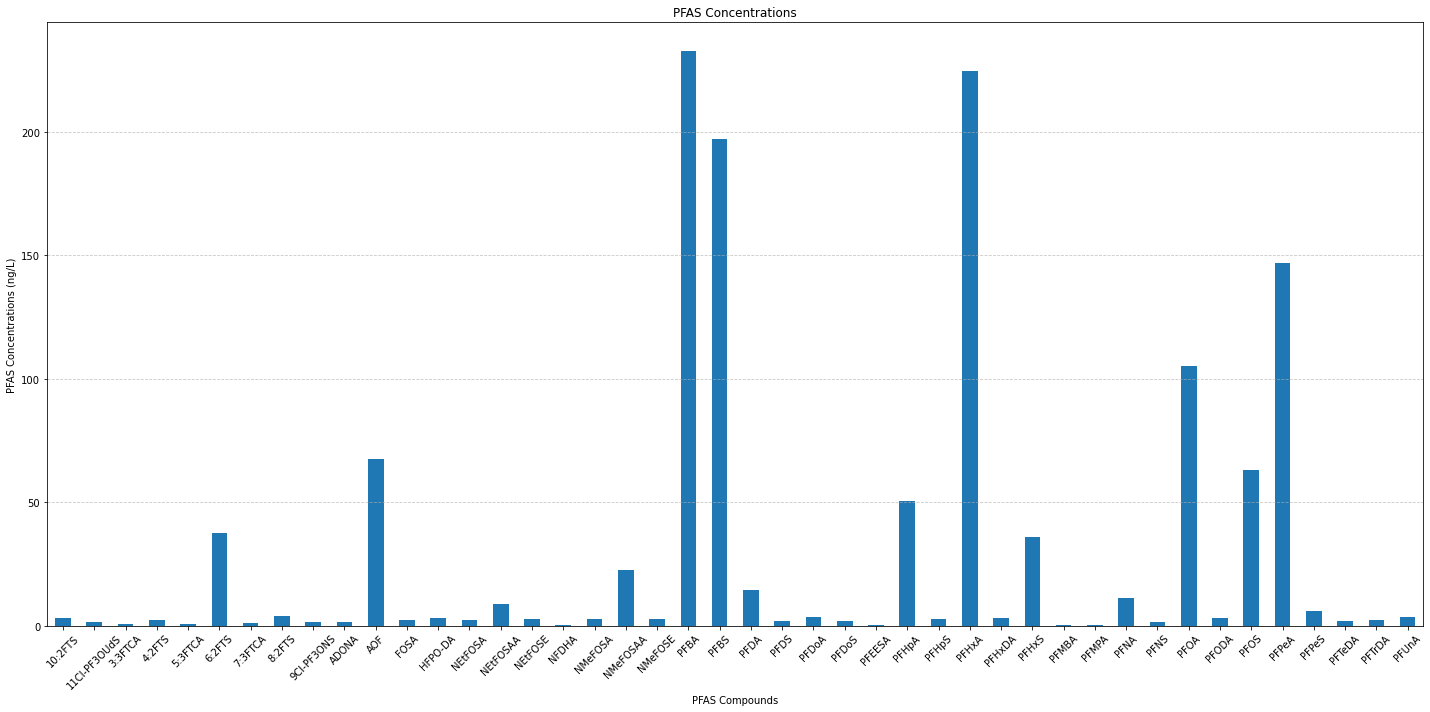

In [62]:
# Example usage:

# Create a bar chart using 'PFAS Compound' as categories and 'All (w BDL= MDL/2) Incl Qual Flags' as values
create_grouped_bar_chart(data_df, PFAS_Attributes=df_PFAS_Attributes,value_column=value_column, title=title, ylabel=ylabel,
                        xlabel=xlabel, figsize=figsize)

### 5) Number of Samples per Year 

#### 5.1) Functions

In [63]:
def create_pivot_table(data_df, filter_pfas_compound=None):
    """
    Create a pivot table with customizable PFAS Compound filter using data from a DataFrame.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_pfas_compound (list of str, optional): List of PFAS Compound values to filter the data (default is None).

    Returns:
        pd.DataFrame: The pivot table.
    """
    try:
        # Filter the data based on the provided PFAS Compound values if filter_pfas_compound is not None
        if filter_pfas_compound:
            filtered_data = data_df[data_df['PFAS Compound'].isin(filter_pfas_compound)]
        else:
            filtered_data = data_df

        # Extract the year from 'Sampled Date' column and create a new 'Year' column
        filtered_data['Year'] = pd.to_datetime(filtered_data['Sampled Date']).dt.year

        # Create a pivot table with 'Year' as index, 'Type' as columns, and sum of values as values
        pivot_table = pd.pivot_table(filtered_data, values='All (w BDL= MDL/2) Incl Qual Flags', index='Year', columns='Type', aggfunc='count', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



In [64]:
def create_stacked_bar_chart(pivot_table, title=None, ylabel=None, figsize=(10, 6), legend_bbox=(1.05, 1)):
    """
    Create a stacked bar chart using a pivot table with years as x-labels and counts for each Type as stacked bars.

    Args:
        pivot_table (pd.DataFrame): The pivot table containing counts for each year and Type.
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        figsize (tuple, optional): The size of the figure (width, height).
        legend_bbox (tuple, optional): The position of the legend using bbox_to_anchor (x, y).

    Returns:
        None: Displays the stacked bar chart.
    """
    try:
        # Create a stacked bar chart
        plt.figure(figsize=figsize)
        ax = pivot_table.plot(kind='bar', stacked=True, rot=0,figsize=figsize)
        plt.xlabel('Year')
        plt.ylabel(ylabel or 'Sample Count')
        plt.title(title or 'Stacked Bar Chart of Sample Counts by Year and Type')
        plt.legend(title='Type', bbox_to_anchor=legend_bbox)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")



#### 5.2) Define Settings

In [65]:
#Specify filter_pfas_compound (list of str, optional): List of PFAS Compound values to filter the data (default is None).
filter_pfas_compound = ['Perfluorohexadecanoic acid','Perfluorohexanesulfonic acid','Perfluorohexanoic acid']

#For the bar chart:
#Specify a title (str, optional): The title for the chart.
title='Number of Samples per Year'
#Specify a ylabel (str, optional): The label for the y-axis.
ylabel='Number of Samples'
#figsize (tuple, optional): The size of the figure (width, height).
figsize=(10, 8)

#### 5.3) Create Pivot Table

In [66]:
# Example - How to create a pivot table for number of sampler each year

# Create a pivot table with or without the PFAS Compound filter
pivot_table = create_pivot_table(data_df, filter_pfas_compound)
pivot_table

<ipython-input-63-be9639f461c0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = pd.to_datetime(filtered_data['Sampled Date']).dt.year


Type,Ambient,Biosolids,Blank,Effluent,Groundwater,Influent,Manhole,Outfall of Industry,Porewater,Soils
Year,,,,,,,,,,
2019,0,6,24,12,0,15,30,45,0,24
2020,0,12,39,24,0,42,258,12,0,0
2021,0,6,9,6,0,12,108,39,0,0
2022,0,12,84,21,0,24,0,153,3,114
2023,42,24,214,40,36,40,54,114,0,227


#### 5.3) Create Bar Chart for Number of Samples per Year

<Figure size 720x576 with 0 Axes>

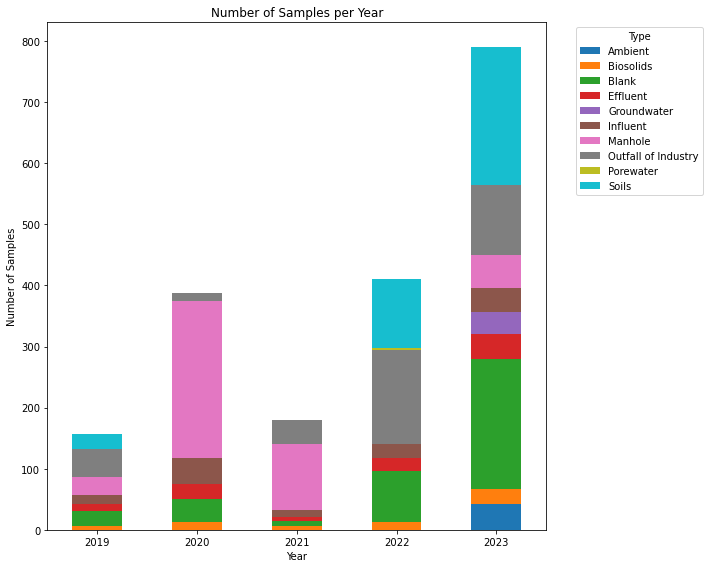

In [67]:
# Example usage: Create a stack bar shart for number of samples per year

#Please adjust the plot size as necessary.
#figsize (tuple, optional): The size of the figure (width, height).
figsize=(10, 8)

# Create a stacked bar chart with custom title and y-axis label
create_stacked_bar_chart(pivot_table, title=title, ylabel=ylabel,figsize=figsize)


#### 5.4) Export Table as an Excel File

In [71]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'Samples per Year': pivot_table}

#filename: The name of the Excel file to write to.
filename= 'output.xlsx'
dfs_to_excel(dfs, filename)

File 'output.xlsx' has been written with 1 tabs.


### 6) Compare PFAS Concentrations and Composition at Various Sites

#### 6.1) Functions

In [72]:
def PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Location', columns='PFAS Compound', aggfunc='mean', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [73]:
def PivotTable_CountPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Location', columns='PFAS Compound', aggfunc='count', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [74]:
def create_std_dev_pivot_table_with_filters(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                                            filter_sample_location=None, start_date=None, end_date=None):
    """
    Create a custom pivot table with multiple filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'. Calculates the standard deviation of the average.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom standard deviation pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and standard deviation of the average as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Location', columns='PFAS Compound',
                                     aggfunc=lambda x: np.std(x, ddof=1), fill_value=None)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [75]:
def create_stacked_bar_chart(avg_pivot_table, std_dev_pivot_table=None, figsize=(10, 6)):
    """
    Create a stacked bar chart based on average PFAS concentrations pivot table with one bar per sample location.

    Args:
        avg_pivot_table (pd.DataFrame): The average PFAS concentrations pivot table.
        std_dev_pivot_table (pd.DataFrame, optional): The standard deviation pivot table (default is None).
        figsize (tuple, optional): Figure size (width, height) in inches (default is (10, 6)).

    Returns:
        None (displays the chart).
    """
    try:
        # Align the rows of avg_pivot_table and std_dev_pivot_table based on Sample Locations
        if std_dev_pivot_table is not None:
            merged_tables = avg_pivot_table.join(std_dev_pivot_table, how='left', rsuffix='_std_dev')
        else:
            merged_tables = avg_pivot_table

        categories = merged_tables.index
        compounds = avg_pivot_table.columns
        num_categories = len(categories)

        # Create the stacked bar chart with specified figsize
        fig, ax = plt.subplots(figsize=figsize)

        width = 0.35
        x = np.arange(num_categories)

        bottom = np.zeros(num_categories)

        for i, compound in enumerate(compounds):
            avg_values = merged_tables[compound]
            error_bars = merged_tables[f"{compound}_std_dev"] if std_dev_pivot_table is not None else None

            if error_bars is not None and not error_bars.isnull().all():
                ax.bar(x, avg_values, width, label=compound, bottom=bottom, yerr=error_bars, capsize=5)
            else:
                ax.bar(x, avg_values, width, label=compound, bottom=bottom)

            bottom += avg_values

        ax.set_xlabel('Sample Location')
        ax.set_ylabel('Average Concentration (ng/L)')
        ax.set_title('Average PFAS Concentrations by Sample Location')
        ax.set_xticks(x)
        ax.set_xticklabels(categories)
        ax.legend(title='PFAS Compound')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")


#### 6.2) Define Filters and Settings

In [76]:
# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound=['HFPO-DA','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid',
                      'Perfluoroheptanesulfonic acid','Perfluoroheptanoic acid','Perfluorohexanesulfonic acid',
                      'Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)',
                      'Perfluorooctanoic acid (PFOA)','Perfluoropentanesulfonic acid','Perfluoropentanoic acid']

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Durham Effluent','Fanno at Durham Rd','Rock @ Brookwood','Thomas Dairy B-2 Pore Water','Thomas Dairy Control Site Well',
                        'Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Well']

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2022-01-01'

#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-12-30'

#### 6.3) Create Pivot Table for Average PFAS Compound Concentrations at Various Sites

In [ ]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date)
avg_pivot_table

PFAS Compound,HFPO-DA,Perfluorobutanesulfonic acid,Perfluorobutanoic acid,Perfluorodecanoic acid,Perfluoroheptanesulfonic acid,Perfluoroheptanoic acid,Perfluorohexanesulfonic acid,Perfluorohexanoic acid,Perfluorononanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid
Sample Location,,,,,,,,,,,,,,
Durham Effluent,0.000000,5.625000,4.000000,0.182500,0.000000,0.500000,0.900000,10.950000,0.225000,0.000000,4.450000,6.650000,0.000000,8.650000
Fanno at Durham Rd,0.000000,5.600000,4.100000,1.300000,0.000000,2.900000,5.000000,5.900000,1.100000,0.380000,14.000000,7.300000,0.580000,6.200000
Rock @ Brookwood,0.000000,4.900000,4.400000,0.960000,0.000000,2.100000,3.300000,5.000000,0.940000,0.370000,9.700000,5.000000,0.380000,5.900000
Thomas Dairy B-2 Pore Water,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,5.300000,16.000000,0.000000,15.000000,21.000000,9.400000,0.000000,9.700000
Thomas Dairy Control Site Well,0.000000,5.766667,5.300000,0.000000,0.083333,1.320000,9.933333,5.133333,0.216667,0.096667,4.466667,5.600000,0.960000,4.630000
Thomas Dairy Site 1 Well,0.223333,3.550000,4.700000,0.133333,0.000000,0.693333,5.233333,1.766667,0.283333,0.203333,5.900000,3.766667,0.600000,1.800000
Thomas Dairy Site 2 Well,0.000000,3.866667,5.133333,0.000000,0.000000,0.000000,6.266667,0.433333,0.146667,0.120000,4.933333,2.400000,0.733333,0.426667
Thomas Dairy Site 3 Well,0.000000,4.433333,4.766667,0.000000,0.000000,1.633333,6.566667,4.966667,0.143333,0.000000,3.400000,6.433333,0.720000,6.233333


PFAS Compound,HFPO-DA,Perfluorobutanesulfonic acid,Perfluorobutanoic acid,Perfluorodecanoic acid,Perfluoroheptanesulfonic acid,Perfluoroheptanoic acid,Perfluorohexanesulfonic acid,Perfluorohexanoic acid,Perfluorononanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid
Sample Location,,,,,,,,,,,,,,
Durham Effluent,0.000000,5.625000,4.000000,0.182500,0.000000,0.500000,0.900000,10.950000,0.225000,0.000000,4.450000,6.650000,0.000000,8.650000
Fanno at Durham Rd,0.000000,5.600000,4.100000,1.300000,0.000000,2.900000,5.000000,5.900000,1.100000,0.380000,14.000000,7.300000,0.580000,6.200000
Rock @ Brookwood,0.000000,4.900000,4.400000,0.960000,0.000000,2.100000,3.300000,5.000000,0.940000,0.370000,9.700000,5.000000,0.380000,5.900000
Thomas Dairy B-2 Pore Water,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,5.300000,16.000000,0.000000,15.000000,21.000000,9.400000,0.000000,9.700000
Thomas Dairy Control Site Well,0.000000,5.766667,5.300000,0.000000,0.083333,1.320000,9.933333,5.133333,0.216667,0.096667,4.466667,5.600000,0.960000,4.630000
Thomas Dairy Site 1 Well,0.223333,3.550000,4.700000,0.133333,0.000000,0.693333,5.233333,1.766667,0.283333,0.203333,5.900000,3.766667,0.600000,1.800000
Thomas Dairy Site 2 Well,0.000000,3.866667,5.133333,0.000000,0.000000,0.000000,6.266667,0.433333,0.146667,0.120000,4.933333,2.400000,0.733333,0.426667
Thomas Dairy Site 3 Well,0.000000,4.433333,4.766667,0.000000,0.000000,1.633333,6.566667,4.966667,0.143333,0.000000,3.400000,6.433333,0.720000,6.233333


#### 6.4) Create Pivot Table for Count of PFAS Compound Concentrations at Various Sites

In [78]:
# Example usage with filters: Create pivot table for count of PFAS Compound values at various locations, 

count_pivot_table = PivotTable_CountPFASCompound_FilterByCompoundSamplingDatesLocation(data_df,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date)
count_pivot_table

PFAS Compound,HFPO-DA,Perfluorobutanesulfonic acid,Perfluorobutanoic acid,Perfluorodecanoic acid,Perfluoroheptanesulfonic acid,Perfluoroheptanoic acid,Perfluorohexanesulfonic acid,Perfluorohexanoic acid,Perfluorononanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid
Sample Location,,,,,,,,,,,,,,
Durham Effluent,4,5,5,5,5,5,5,5,5,5,5,5,5,5
Fanno at Durham Rd,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Rock @ Brookwood,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Thomas Dairy B-2 Pore Water,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Thomas Dairy Control Site Well,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Site 1 Well,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Site 2 Well,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Site 3 Well,3,3,3,3,3,3,3,3,3,3,3,3,3,3


#### 6.5) Create Pivot Table with Sampling Standard Deviation for Each Compount at Each Site

In [79]:
# Create a custom standard deviation pivot table with multiple filters
std_dev_pivot_table = create_std_dev_pivot_table_with_filters(data_df,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date)
std_dev_pivot_table


PFAS Compound,HFPO-DA,Perfluorobutanesulfonic acid,Perfluorobutanoic acid,Perfluorodecanoic acid,Perfluoroheptanesulfonic acid,Perfluoroheptanoic acid,Perfluorohexanesulfonic acid,Perfluorohexanoic acid,Perfluorononanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid
Sample Location,,,,,,,,,,,,,,
Durham Effluent,0.000000,2.904307,4.604346,0.326466,0.000000,0.894427,1.103177,5.443620,0.402492,0.000000,3.461647,3.183080,0.000000,4.535085
Thomas Dairy Control Site Well,0.000000,3.106981,3.477068,0.000000,0.144338,0.919348,1.847521,4.579665,0.192959,0.167432,1.234234,3.983717,0.069282,3.252799
Thomas Dairy Site 1 Well,0.386825,0.665833,1.732051,0.230940,0.000000,0.160728,0.808290,0.585947,0.136504,0.176730,1.819341,1.266228,0.040000,0.346410
Thomas Dairy Site 2 Well,0.000000,1.350309,1.250333,0.000000,0.000000,0.000000,0.808290,0.750555,0.127410,0.207846,1.011599,0.529150,0.151438,0.127410
Thomas Dairy Site 3 Well,0.000000,0.862168,0.665833,0.000000,0.000000,0.288675,1.001665,0.832666,0.125033,0.692820,0.871780,0.665833,0.141774,0.907377


#### 6.6) Stacked Bar Chart with Error Bars

c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\

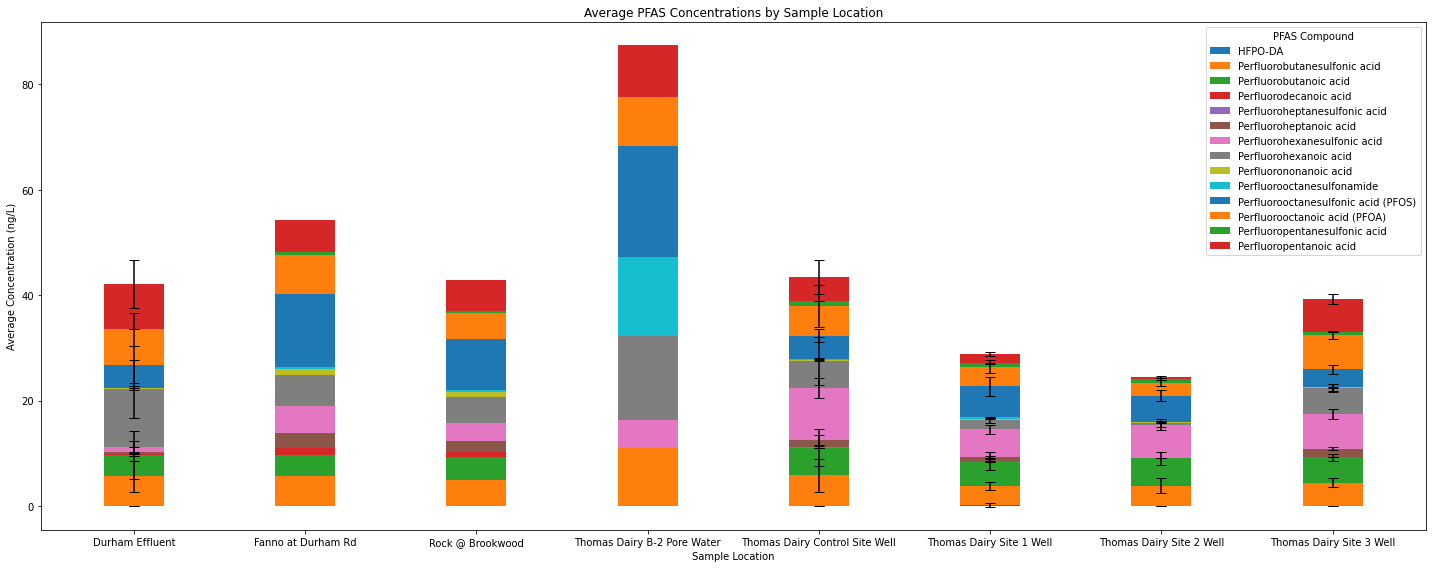

c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\

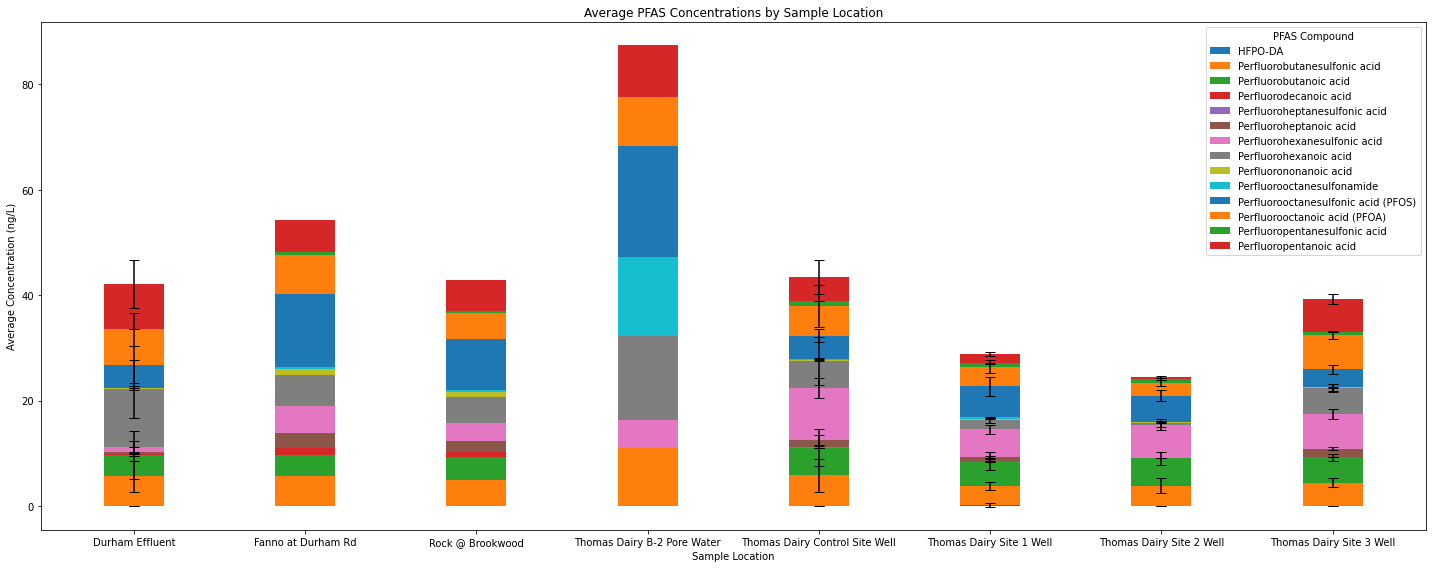

In [ ]:
# Example: Create the stacked bar chart with custom figsize and error bars

#figsize (tuple, optional): Figure size (width, height) in inches (default is (10, 6)).
#Please adjust the plot size as necessart
figsize=(20, 8)

create_stacked_bar_chart(avg_pivot_table, std_dev_pivot_table, figsize=figsize)  


#### 6.7) Export Pivot Tables as an Excel File

In [ ]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'AvgPFASCompoundByLocation': avg_pivot_table,
        'CountPFASSamplePerLocation' : count_pivot_table,
        'StdDevPFASCompoundByLocation': std_dev_pivot_table}

#filename: The name of the Excel file to write to.
filename= 'output.xlsx'
dfs_to_excel(dfs, filename)

File 'output.xlsx' has been written with 3 tabs.


### 7) Create Pivot Table for Average Concentration of each PFAS Compounds Samples Taken Each Day

#### 7.1) Create Function

In [86]:
def create_custom_pivot_table(data_df, filter_qual_summary=None, start_date=None, end_date=None, filter_pfas_compounds=None, filter_sample_location=None):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'Sample Location',
    'Sample Date', 'PFAS Compounds', and 'Sample Location'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).
        filter_pfas_compounds (list of str, optional): List of 'PFAS Compounds' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).

    Returns:
        pd.DataFrame: The custom pivot table with average values.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Apply filters based on 'PFAS Compounds'
        if filter_pfas_compounds:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compounds)]

        # Apply filter based on 'Sample Location'
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Create a pivot table with 'Sample Date' as columns, 'PFAS Compound' as rows, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='PFAS Compound', columns='Sample Date',
                                     aggfunc='mean', fill_value='N/A')

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

#### 7.2) Filters and Settings

In [87]:
# Filter criteria
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
#start_date (str, optional): Start date for the date range filter (default is None).
start_date ='2019-01-01'
#end_date (str, optional): End date for the date range filter (default is None).
end_date ='2020-12-30'
#filter_pfas_compounds (list of str, optional): List of 'PFAS Compounds' values to filter the data (default is None).
#filter_pfas_compounds =
# filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Durham Influent']

#### 7.3) Usage Example: Create Pivot Table Averaging PFAS Concentrations for PFAS Compound, Grouping by Sampling Date

In [88]:
# Usage example

# Create the custom pivot table
custom_pivot_table = create_custom_pivot_table(data_df, filter_qual_summary, start_date=start_date, end_date=end_date,filter_sample_location=filter_sample_location)

# Display the custom pivot table
custom_pivot_table

Sample Date,2019-08-22,2019-11-04,2020-01-23,2020-04-23,2020-06-12,2020-09-23,2020-12-10
PFAS Compound,,,,,,,
10:2Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11Cl-PF3OUdS,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4:2 Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6:2 Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8:2 Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9Cl-PF3ONS,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADONA,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HFPO-DA,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEtFOSA,N/A,N/A,0.0,0.0,0.0,0.0,0.0


#### 7.4) Export Tables

In [89]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'AvgPFASCompoundBySampleDate': custom_pivot_table}

#filename: The name of the Excel file to write to.
filename= 'output.xlsx'
dfs_to_excel(dfs, filename)

File 'output.xlsx' has been written with 1 tabs.


### 8) TOP Assay Results Pivot Table and Bar Chart for PFAS Compounds Pre and Post at Various Locations

#### 8.1) Define Functions

In [90]:
def create_custom_pivot_table_with_filters(data_df, filter_qual_summary=None, start_date=None, end_date=None, filter_type=None, filter_sample_location=None, filter_pfas_compound=None, column_name='All (w BDL= MDL/2) Incl Qual Flags'):
    """
    Create a custom pivot table with filters based on multiple columns and calculate the average specified column
    for each PFAS Compound at each Sample Location.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        column_name (str, optional): Name of the column to calculate the average (default is 'All (w BDL= MDL/2) Incl Qual Flags').

    Returns:
        pd.DataFrame: The custom pivot table with average specified column values.
    """
    try:
        # Apply filters based on multiple columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Sample Location' as columns, 'PFAS Compound' as rows, and average specified column as values
        pivot_table = pd.pivot_table(filtered_data, values=column_name,
                                     index='PFAS Compound', columns='Sample Location',
                                     aggfunc='mean', fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

   


In [91]:
def find_fluorine_equivalents(PFAS_List, df_PFAS_Attributes):
    """
    Find the '% Fluorine Equivalents' value for each PFAS Compound in PFAS_List.

    Args:
        PFAS_List (list of str): List of PFAS Compounds to find '% Fluorine Equivalents' for.
        df_PFAS_Attributes (pd.DataFrame): DataFrame containing PFAS attributes including 'Database', 'Longest Carbon Chain Length', and '% Fluorine Equivalents'.

    Returns:
        dict: A dictionary mapping PFAS Compounds to their '% Fluorine Equivalents' values.
    """
    fluorine_equivalents_dict = {}

    for compound_name in PFAS_List:
        # Find the row where 'Database' matches the compound_name
        row = df_PFAS_Attributes[df_PFAS_Attributes['Database'] == compound_name]

        if not row.empty:
            # Access the 18th column (position 17) using .iloc[]
            fluorine_equivalents_value = row.iloc[0, 17]
            fluorine_equivalents_dict[compound_name] = fluorine_equivalents_value
        else:
            # If no match is found, set the value to None
            fluorine_equivalents_dict[compound_name] = None

    return fluorine_equivalents_dict


In [92]:
def create_pfas_compound_table_with_sample_location(PFAS_List, sample_locations, df_PFAS_Attributes, pivot_table):
    """
    Create a table with PFAS Compounds as rows, lookup 'Longest Carbon Chain Length' and 'Abbreviation' values from df_PFAS_attributes,
    and populate 'Sample Location Pre-TOP' and 'Sample Location Post-TOP' columns based on pivot_table.

    Args:
        PFAS_List (list of str): List of PFAS Compounds to include in the table.
        sample_locations (list of str): List of Sample Locations.
        df_PFAS_Attributes (pd.DataFrame): DataFrame containing PFAS attributes including 'Database', 'Longest Carbon Chain Length', and 'Abbrev'.
        pivot_table (pd.DataFrame): The pivot table containing values for PFAS Compounds and Sample Locations.

    Returns:
        pd.DataFrame: The table with PFAS Compounds as rows, 'Longest Carbon Chain Length', 'Abbreviation',
        and columns for Sample Locations with suffixes "Pre-TOP" and "Post-TOP" populated.
    """
    try:
        # Filter df_PFAS_attributes based on PFAS_List
        filtered_attributes = df_PFAS_Attributes[df_PFAS_Attributes['Database'].isin(PFAS_List)]

        # Create the table with PFAS Compounds as rows, 'Longest Carbon Chain Length', 'Abbreviation', and columns for Sample Locations
        compound_table = pd.DataFrame({
            'PFAS Compound': filtered_attributes['Database'],
            'Longest Carbon Chain Length': filtered_attributes['Longest Carbon Chain Length'],
            'Abbreviation': filtered_attributes['Abbrev']
        })

        # Iterate through Sample Locations and fill 'Sample Location Pre-TOP' columns based on pivot_table
        for location in sample_locations:
            # Modify this line to include the multiplication and division for Pre-TOP
            compound_table[f'{location} Pre-TOP'] = compound_table['PFAS Compound'].apply(
                lambda x: (pivot_table.at[x, location] if x in pivot_table.index else None) *
                           find_fluorine_equivalents([x], df_PFAS_Attributes)[x] / 19
            )

            # Modify this line to include the multiplication and division for Post-TOP
            compound_table[f'{location} Post-TOP'] = compound_table['PFAS Compound'].apply(
                lambda x: (pivot_table.at[f'TOP-{x}', location] if f'TOP-{x}' in pivot_table.index else None) *
                           find_fluorine_equivalents([x], df_PFAS_Attributes)[x] / 19
            )

        return compound_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



In [93]:
def create_stacked_bar_chart(compound_table, sample_locations, figsize=(10, 6)):
    """
    Create a stacked bar chart from the compound_table DataFrame.

    Args:
        compound_table (pd.DataFrame): DataFrame containing PFAS compound data.
        sample_locations (list of str): List of sample locations without suffixes.
        figsize (tuple, optional): Figure size (width, height) in inches (default is (10, 6))

    Returns:
        None (displays the plot).
    """
    # Initialize an empty DataFrame to store the data for plotting
    plot_data = pd.DataFrame()

    # Set the 'Abbreviation' column as the index for the legend
    compound_table.set_index('Abbreviation', inplace=True)
    
    # Iterate through sample locations and create stacked bars
    for location in sample_locations:
        # Select columns ending with ' Pre-TOP' and ' Post-TOP' for the current location
        pre_top_column = f'{location} Pre-TOP'
        post_top_column = f'{location} Post-TOP'

        # Combine ' Pre-TOP' and ' Post-TOP' columns into one DataFrame
        location_data = compound_table[[pre_top_column, post_top_column]]

        # Transpose and rename columns to remove suffixes
        location_data = location_data.transpose()
        location_data.columns = [str(col).replace(' Pre-TOP', '').replace(' Post-TOP', '') for col in location_data.columns]

        # Append the data for the current location to the plot_data DataFrame
        plot_data = pd.concat([plot_data, location_data])


    # Create a stacked bar chart
    plot_data.plot(kind='bar', stacked=True, figsize=figsize)

    # Set plot labels and title
    plt.xlabel('Sample Locations')
    plt.ylabel('Flourine Concentrations (mol/L)')
    plt.title('Flourine Concentrations at Sample Pre and Post Sample Locations')

    # Show the plot with the 'Abbreviation' column as the legend
    plt.legend(title='Abbreviation', bbox_to_anchor=(1.02, 1))
    plt.tight_layout()
    plt.show()


    

#### 8.2) Filters and Settings

In [94]:
# Filter criteria
        
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
#start_date (str, optional): Start date for the date range filter (default is None).
start_date = '2023-04-06'
#end_date (str, optional): End date for the date range filter (default is None).
end_date = '2023-06-07'
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Effluent','Influent']
#filter_pfas_compounds (list of str, optional): List of 'PFAS Compounds' values to filter the data (default is None).
filter_pfas_compounds = None
#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location = None
#column_name (str, optional): Name of the column to calculate the average (default is 'All (w BDL= MDL/2) Incl Qual Flags' other options are 
# 'Average of Quant Incl Estimates Incl Qual Flags','Average of Quant Only Incl Qual Flags').
column_name='All (w BDL= MDL/2) Incl Qual Flags'
#PFAS_List (list of str): List of PFAS Compounds to include in the table.
PFAS_List= ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluoropentanoic acid','Perfluorohexanoic acid','Perfluoroheptanoic acid',
            'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluorononanoic acid']

#### 8.2) Flourine Concentrations at Various Sites (using Average of All (w BDL= MDL/2) Incl Qual Flags)

##### 8.2.2) Example usage: Create Pivot Table for Average Concentrations of Various PFAS Compounds and Different Sites

In [95]:
# Create the custom pivot table with sample location filter
custom_pivot_table = create_custom_pivot_table_with_filters(data_df, filter_qual_summary, start_date, end_date,filter_type, filter_pfas_compounds, filter_sample_location,column_name)

# Display the custom pivot table
custom_pivot_table


Sample Location,Durham Effluent,Durham Influent,Forest Grove Effluent,Forest Grove Influent,Hillsboro Effluent,Hillsboro Influent,Rock Creek Effluent,Rock Creek Influent
PFAS Compound,,,,,,,,
10:2Fluorotelomersulfonic acid,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
11Cl-PF3OUdS,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50
4:2 Fluorotelomersulfonic acid,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50
8:2 Fluorotelomersulfonic acid,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
9Cl-PF3ONS,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50
...,...,...,...,...,...,...,...,...
TOP-Perfluoropentanesulfonic acid,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25
TOP-Perfluoropentanoic acid,11.00,18.00,12.00,28.00,10.00,23.00,12.00,30.00
TOP-Perfluorotetradecanoic acid,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25


##### 8.2.3) Create Functions for Table for Getting Flourine Equivalents and Concentrations in  mol/L

##### 8.2.4) Example Usage: Create Flourine Concentrations Table

In [96]:
sample_locations = custom_pivot_table.columns
pivot_table_pre_top=custom_pivot_table

FlourineEquiv_molL=create_pfas_compound_table_with_sample_location(PFAS_List, sample_locations, df_PFAS_Attributes, pivot_table_pre_top)
FlourineEquiv_molL

,PFAS Compound,Longest Carbon Chain Length,Abbreviation,Durham Effluent Pre-TOP,Durham Effluent Post-TOP,Durham Influent Pre-TOP,Durham Influent Post-TOP,Forest Grove Effluent Pre-TOP,Forest Grove Effluent Post-TOP,Forest Grove Influent Pre-TOP,Forest Grove Influent Post-TOP,Hillsboro Effluent Pre-TOP,Hillsboro Effluent Post-TOP,Hillsboro Influent Pre-TOP,Hillsboro Influent Post-TOP,Rock Creek Effluent Pre-TOP,Rock Creek Effluent Post-TOP,Rock Creek Influent Pre-TOP,Rock Creek Influent Post-TOP
19,Perfluorobutanesulfonic acid,4.0,PFBS,0.218927,0.143952,0.227924,0.188937,0.218927,0.146951,0.230923,0.185938,0.209930,0.101966,0.203932,0.128957,0.155948,0.101966,0.206931,0.143952
20,Perfluorobutanoic acid,4.0,PFBA,0.327057,0.588703,0.327057,0.588703,0.327057,0.425174,0.327057,0.621408,0.327057,0.163528,0.327057,0.588703,0.327057,1.046582,0.327057,0.883054
26,Perfluoroheptanoic acid,7.0,PFHpA,0.089271,0.114267,0.089271,0.214250,0.089271,0.089271,0.089271,0.349942,0.089271,0.092842,0.089271,0.499918,0.089271,0.124979,0.089271,0.335659
29,Perfluorohexanoic acid,6.0,PFHxA,0.346760,0.490368,0.157618,0.420315,0.595447,0.560420,0.157618,0.560420,0.157618,0.276708,0.157618,0.525394,0.350263,0.385289,0.157618,0.455342
31,Perfluorononanoic acid,9.0,PFNA,0.091579,0.045790,0.091579,0.098905,0.091579,0.045790,0.091579,0.098905,0.091579,0.045790,0.091579,0.139200,0.091579,0.045790,0.091579,0.106232
34,Perfluorooctanesulfonic acid (PFOS),8.0,PFOS,0.169956,0.268530,0.373903,0.883770,0.169956,0.084978,0.169956,0.207346,0.169956,0.084978,0.169956,0.084978,0.407894,0.275328,0.169956,0.237938
35,Perfluorooctanoic acid (PFOA),8.0,PFOA,0.282561,NaN,0.293429,NaN,0.090564,0.228222,0.090564,0.307919,0.090564,0.246335,0.090564,0.398483,0.210109,NaN,0.188374,NaN
37,Perfluoropentanoic acid,5.0,PFPeA,0.228366,0.374929,0.238591,0.613520,0.184056,0.409013,0.085211,0.954365,0.085211,0.340845,0.085211,0.783942,0.259042,0.409013,0.221549,1.022534


##### 8.2.5) Example: Create Flourince Concentrations at Various Location Bar Chart

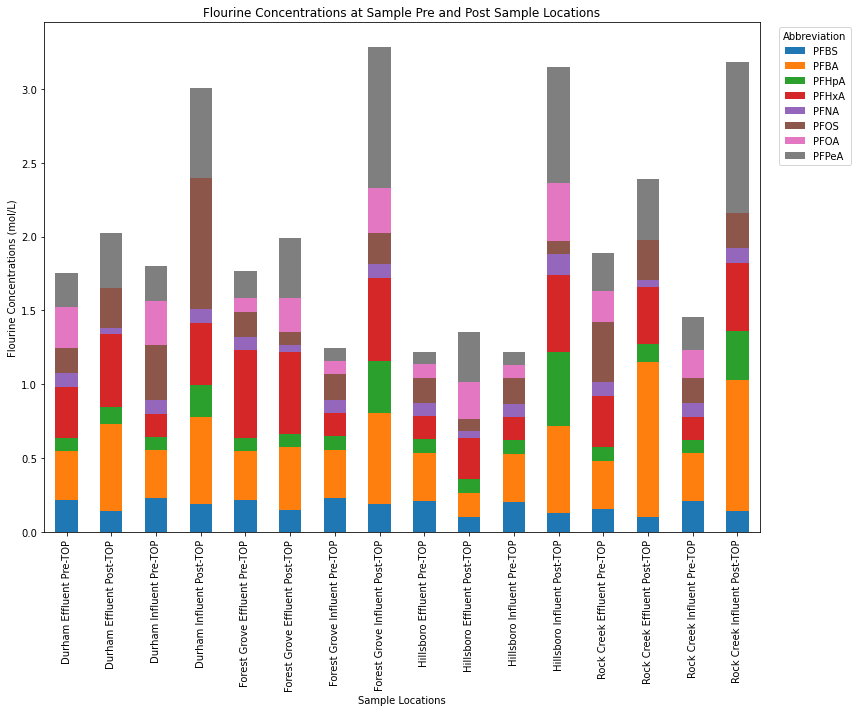

In [97]:
# Note: you may need to recreate the FlourineEquiv_molL table  from the last section if running into an error. 
#This will happen if you try to run this function twice.
compound_table=FlourineEquiv_molL


figsize=(12,10)

create_stacked_bar_chart(compound_table, sample_locations, figsize=figsize)

##### 8.2.6) Export Tables to Excel

In [100]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'AvgPFASCompoundByLocation': custom_pivot_table,
       'EquivFlorineConcentrationByLocation': FlourineEquiv_molL}

#filename: The name of the Excel file to write to.
filename= 'output.xlsx'
dfs_to_excel(dfs, filename)

c:\Users\rodriguezc\Anaconda3\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


File 'output.xlsx' has been written with 2 tabs.


#### 8.3) PFAS Concentrations (ng/L) at Various Sites

##### 8.3.1) Create function for Avg PFAS Concentrations at Various Sites

In [101]:
def create_custom_pivot_table_with_filters(data_df, filter_qual_summary=None, start_date=None, end_date=None, filter_type=None, filter_sample_location=None, filter_pfas_compound=None, column_name='All (w BDL= MDL/2) Incl Qual Flags'):
    """
    Create a custom pivot table with filters based on multiple columns and calculate the average specified column
    for each PFAS Compound at each Sample Location.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        column_name (str, optional): Name of the column to calculate the average (default is 'All (w BDL= MDL/2) Incl Qual Flags').

    Returns:
        pd.DataFrame: The custom pivot table with average specified column values.
    """
    try:
        # Apply filters based on multiple columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Sample Location' as columns, 'PFAS Compound' as rows, and average specified column as values
        pivot_table = pd.pivot_table(filtered_data, values=column_name,
                                     index='PFAS Compound', columns='Sample Location',
                                     aggfunc='mean', fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

   

##### 8.3.2) Example: Create table for Avg PFAS Concentrations at Various Sites

In [102]:
# Filter criteria
        
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
#start_date (str, optional): Start date for the date range filter (default is None).
start_date = '2023-04-06'
#end_date (str, optional): End date for the date range filter (default is None).
end_date = '2023-06-07'
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Effluent','Influent']
#filter_pfas_compounds (list of str, optional): List of 'PFAS Compounds' values to filter the data (default is None).
filter_pfas_compounds = None
#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location = None

# Create the custom pivot table with sample location filter
custom_pivot_table = create_custom_pivot_table_with_filters(data_df, filter_qual_summary, start_date, end_date,filter_type, filter_pfas_compounds, filter_sample_location)

# Display the custom pivot table
custom_pivot_table

Sample Location,Durham Effluent,Durham Influent,Forest Grove Effluent,Forest Grove Influent,Hillsboro Effluent,Hillsboro Influent,Rock Creek Effluent,Rock Creek Influent
PFAS Compound,,,,,,,,
10:2Fluorotelomersulfonic acid,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
11Cl-PF3OUdS,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50
4:2 Fluorotelomersulfonic acid,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50
8:2 Fluorotelomersulfonic acid,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
9Cl-PF3ONS,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50
...,...,...,...,...,...,...,...,...
TOP-Perfluoropentanesulfonic acid,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25
TOP-Perfluoropentanoic acid,11.00,18.00,12.00,28.00,10.00,23.00,12.00,30.00
TOP-Perfluorotetradecanoic acid,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25


##### 8.3.3) Create Function for Avg PFAS Concentrations at Various Sites Pre and Post Table

In [103]:
def create_pfas_compound_table_with_sample_location(PFAS_List, sample_locations, df_PFAS_Attributes, pivot_table):
    """
    Create a table with PFAS Compounds as rows, lookup 'Longest Carbon Chain Length' and 'Abbreviation' values from df_PFAS_attributes,
    and populate 'Sample Location Pre-TOP' and 'Sample Location Post-TOP' columns based on pivot_table.

    Args:
        PFAS_List (list of str): List of PFAS Compounds to include in the table.
        sample_locations (list of str): List of Sample Locations.
        df_PFAS_Attributes (pd.DataFrame): DataFrame containing PFAS attributes including 'Database', 'Longest Carbon Chain Length', and 'Abbrev'.
        pivot_table (pd.DataFrame): The pivot table containing values for PFAS Compounds and Sample Locations.

    Returns:
        pd.DataFrame: The table with PFAS Compounds as rows, 'Longest Carbon Chain Length', 'Abbreviation',
        and columns for Sample Locations with suffixes "Pre-TOP" and "Post-TOP" populated.
    """
    try:
        # Filter df_PFAS_attributes based on PFAS_List
        filtered_attributes = df_PFAS_Attributes[df_PFAS_Attributes['Database'].isin(PFAS_List)]

        # Create the table with PFAS Compounds as rows, 'Longest Carbon Chain Length', 'Abbreviation', and columns for Sample Locations
        compound_table = pd.DataFrame({
            'PFAS Compound': filtered_attributes['Database'],
            'Longest Carbon Chain Length': filtered_attributes['Longest Carbon Chain Length'],
            'Abbreviation': filtered_attributes['Abbrev']
        })

        # Iterate through Sample Locations and fill 'Sample Location Pre-TOP' columns based on pivot_table
        for location in sample_locations:
            # Modify this line to include the multiplication and division for Pre-TOP
            compound_table[f'{location} Pre-TOP'] = compound_table['PFAS Compound'].apply(
                lambda x: (pivot_table.at[x, location] if x in pivot_table.index else None) 
            )

            # Modify this line to include the multiplication and division for Post-TOP
            compound_table[f'{location} Post-TOP'] = compound_table['PFAS Compound'].apply(
                lambda x: (pivot_table.at[f'TOP-{x}', location] if f'TOP-{x}' in pivot_table.index else None)
            )

        return compound_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


##### 8.3.4) Example: Create Function for Avg PFAS Concentrations at Various Sites Pre and Post Table

In [106]:
PFAS_List= ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluoropentanoic acid','Perfluorohexanoic acid','Perfluoroheptanoic acid',
            'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluorononanoic acid']

sample_locations = ['Forest Grove Influent','Forest Grove Effluent','Rock Creek Influent','Rock Creek Influent','Rock Creek Effluent',
                    'Durham Influent','Durham Effluent']
pivot_table_pre_top=custom_pivot_table

pre_post_PivotTable=create_pfas_compound_table_with_sample_location(PFAS_List, sample_locations, df_PFAS_Attributes, pivot_table_pre_top)
pre_post_PivotTable


,PFAS Compound,Longest Carbon Chain Length,Abbreviation,Forest Grove Influent Pre-TOP,Forest Grove Influent Post-TOP,Forest Grove Effluent Pre-TOP,Forest Grove Effluent Post-TOP,Rock Creek Influent Pre-TOP,Rock Creek Influent Post-TOP,Rock Creek Effluent Pre-TOP,Rock Creek Effluent Post-TOP,Durham Influent Pre-TOP,Durham Influent Post-TOP,Durham Effluent Pre-TOP,Durham Effluent Post-TOP
19,Perfluorobutanesulfonic acid,4.0,PFBS,7.7,6.2,7.3,4.90,6.9,4.8,5.2,3.40,7.6,6.3,7.3,4.80
20,Perfluorobutanoic acid,4.0,PFBA,10.0,19.0,10.0,13.00,10.0,27.0,10.0,32.00,10.0,18.0,10.0,18.00
26,Perfluoroheptanoic acid,7.0,PFHpA,2.5,9.8,2.5,2.50,2.5,9.4,2.5,3.50,2.5,6.0,2.5,3.20
29,Perfluorohexanoic acid,6.0,PFHxA,4.5,16.0,17.0,16.00,4.5,13.0,10.0,11.00,4.5,12.0,9.9,14.00
31,Perfluorononanoic acid,9.0,PFNA,2.5,2.7,2.5,1.25,2.5,2.9,2.5,1.25,2.5,2.7,2.5,1.25
34,Perfluorooctanesulfonic acid (PFOS),8.0,PFOS,5.0,6.1,5.0,2.50,5.0,7.0,12.0,8.10,11.0,26.0,5.0,7.90
35,Perfluorooctanoic acid (PFOA),8.0,PFOA,2.5,8.5,2.5,6.30,5.2,NaN,5.8,NaN,8.1,NaN,7.8,NaN
37,Perfluoropentanoic acid,5.0,PFPeA,2.5,28.0,5.4,12.00,6.5,30.0,7.6,12.00,7.0,18.0,6.7,11.00


##### 8.3.5) Create function for Creating Bar Chart of PFAS Concentrations Pre and Post Sites

In [44]:
def create_stacked_bar_chart(compound_table, sample_locations):
    """
    Create a stacked bar chart from the compound_table DataFrame.

    Args:
        compound_table (pd.DataFrame): DataFrame containing PFAS compound data.
        sample_locations (list of str): List of sample locations without suffixes.

    Returns:
        None (displays the plot).
    """
    # Initialize an empty DataFrame to store the data for plotting
    plot_data = pd.DataFrame()

    # Set the 'Abbreviation' column as the index for the legend
    compound_table.set_index('Abbreviation', inplace=True)
    
    # Iterate through sample locations and create stacked bars
    for location in sample_locations:
        # Select columns ending with ' Pre-TOP' and ' Post-TOP' for the current location
        pre_top_column = f'{location} Pre-TOP'
        post_top_column = f'{location} Post-TOP'

        # Combine ' Pre-TOP' and ' Post-TOP' columns into one DataFrame
        location_data = compound_table[[pre_top_column, post_top_column]]

        # Transpose and rename columns to remove suffixes
        location_data = location_data.transpose()
        location_data.columns = [str(col).replace(' Pre-TOP', '').replace(' Post-TOP', '') for col in location_data.columns]

        # Append the data for the current location to the plot_data DataFrame
        plot_data = pd.concat([plot_data, location_data])


    # Create a stacked bar chart
    plot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Set plot labels and title
    plt.xlabel('Sample Locations')
    plt.ylabel('PFAS Concentrations (ng/L)')
    plt.title('PFAS Concentrations at Sample Pre and Post Sample Locations')

    # Show the plot with the 'Abbreviation' column as the legend
    plt.legend(title='Abbreviation', loc='best')
    plt.tight_layout()
    plt.show()

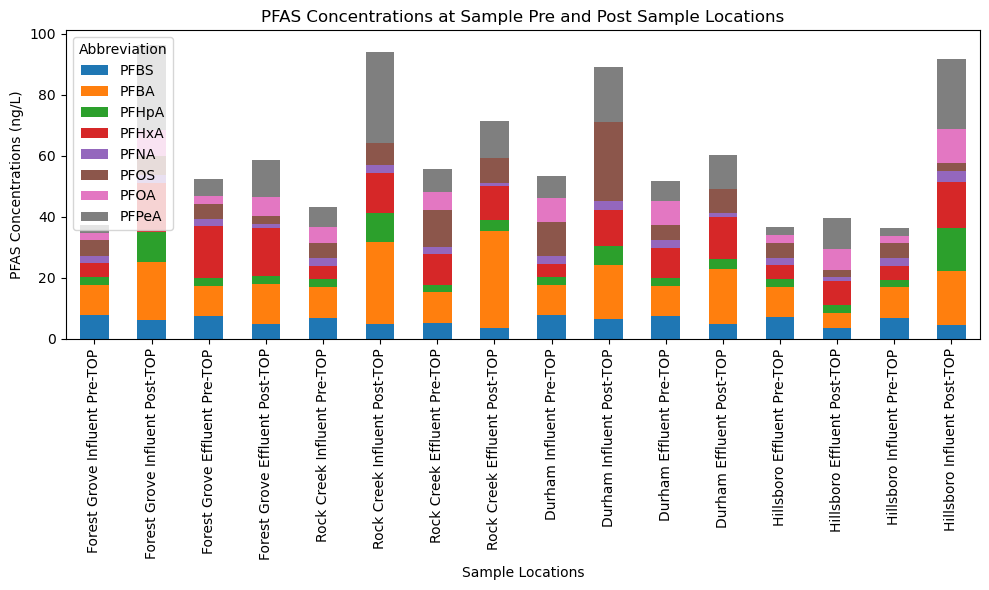

In [45]:

sample_locations = ['Forest Grove Influent','Forest Grove Effluent','Rock Creek Influent','Rock Creek Influent','Rock Creek Effluent',
                    'Durham Influent','Durham Effluent']

PFAS_List= ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluoropentanoic acid','Perfluorohexanoic acid','Perfluoroheptanoic acid',
            'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluorononanoic acid']

sample_locations = ['Forest Grove Influent','Forest Grove Effluent','Rock Creek Influent','Rock Creek Effluent',
                    'Durham Influent','Durham Effluent', 'Hillsboro Effluent', 'Hillsboro Influent']

pivot_table_pre_top=custom_pivot_table

compound_table=create_pfas_compound_table_with_sample_location(PFAS_List, sample_locations, df_PFAS_Attributes, pivot_table_pre_top)

create_stacked_bar_chart(compound_table, sample_locations)

##### 8.3.6) Export Tables

In [109]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'AvgPFASCompoundByLocation': custom_pivot_table,
       'PrePostAvgPFASCompoundByLocation': pre_post_PivotTable}

#filename: The name of the Excel file to write to.
filename= 'output.xlsx'
dfs_to_excel(dfs, filename)

c:\Users\rodriguezc\Anaconda3\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


File 'output.xlsx' has been written with 2 tabs.


### 9) Avg PFAS Concentrations at Various Sites on Multiple Sampling Dates

#### 9.1) Functions

In [110]:
def create_filtered_pivot_table(data_df, sample_location=None, qual_summary=None, type=None, pfas_compound=None):
    """
    Create a filtered pivot table with customizable filters and aggregation.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        type (list of str, optional): List of 'Type' values to filter the data (default is None).
        pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).

    Returns:
        pd.DataFrame: The pivot table with 'PFAS Compound' as columns, 'Sample Date' as rows, and average 'Quant Incl Estimates Incl Qual Flags' as values.
    """
    try:
        # Apply filters based on specified conditions
        filtered_data = data_df
        if sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(sample_location)]

        if qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(qual_summary)]

        if type:
            filtered_data = filtered_data[filtered_data['Type'].isin(type)]
        
        if pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(pfas_compound)]

        # Create a pivot table with 'Sample Date' as rows, 'PFAS Compound' as columns, and average 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Date', columns='PFAS Compound',
                                     aggfunc='mean', fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [111]:
def create_stacked_bar_chart(pivot_table, title=None, figsize=(12, 6), legend_height=-0.4, pfas_attributes=None):
    """
    Create a stacked bar chart from a pivot table.

    Args:
        pivot_table (pd.DataFrame): The pivot table with 'Sample Date' as rows and PFAS compounds as columns.
        title (str, optional): The title for the chart.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.
        legend_height (float, optional): The second bbox_to_anchor value for adjusting the legend height.
        pfas_attributes (pd.DataFrame, optional): The DataFrame containing PFAS attributes with 'Database' and 'Abbrev' columns.

    Returns:
        None (displays the plot).
    """
    try:
        # Change the datetime format of the index (Sample Date) to MM/DD/YYYY
        pivot_table.index = pivot_table.index.strftime('%m/%d/%Y')

        # Replace column names with abbreviated names from PFAS_Attributes
        if pfas_attributes is not None:
            # Create a dictionary mapping 'Database' values to 'Abbrev' values
            pfas_mapping = dict(zip(pfas_attributes['Database'], pfas_attributes['Abbrev']))
            pivot_table.rename(columns=pfas_mapping, inplace=True)

        # Create a stacked bar chart with custom figure size
        ax = pivot_table.plot(kind='bar', stacked=True, figsize=figsize)

        # Set plot labels and title
        plt.xlabel('Sample Date')
        plt.ylabel('PFAS Concentration (ng/L)')
        plt.title(title or 'Stacked Bar Chart of PFAS Compounds by Sample Date')

        # Show the legend outside the plot at the bottom center with adjustable height
        plt.legend(title='PFAS Compound', loc='upper center', bbox_to_anchor=(0.5, legend_height), ncol=5)

        # Show the plot
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")


#### 9.2) Filters and Settings

In [112]:
# sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
sample_location = ['Hillsboro Landfill']#Please modify as needed.
# qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
qual_summary = ['Good','Probably Ok','']
# type (list of str, optional): List of 'Type' values to filter the data (default is None).
type = ['Outfall of Industry']
# pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
pfas_compound = ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorobutanoic acid','Perfluoroheptanoic acid','Perfluorohexanoic acid',
                 'Perfluorononanoic acid','Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluoropentanoic acid']

#title (str, optional): The title for the bar chart.
title='PFAS Concentrations at Hillsboro Landfill'


#Please note that the sample_location variable is defined below.

#### 9.2) Create Pivot Table for PFAS Concentrations (avg) at various sites on multiple sampling dates

In [113]:
pivot_table= create_filtered_pivot_table(data_df, sample_location=sample_location, qual_summary=qual_summary, type=type,pfas_compound=pfas_compound)
pivot_table

PFAS Compound,Perfluorobutanesulfonic acid,Perfluorobutanoic acid,Perfluoroheptanoic acid,Perfluorohexanoic acid,Perfluorononanoic acid,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanoic acid
Sample Date,,,,,,,,
2019-08-15,5200,2600,750,5100,50.0,240,1300,1700
2022-04-13,4000,2800,590,4700,NaN,150,1200,3800
2022-08-04,3400,3100,750,4500,100.0,1900,1400,2700
2023-01-26,3400,2100,820,4000,180.0,350,2000,2300
2023-04-07,870,2600,680,2200,73.0,1900,1400,1100
2023-09-11,930,2300,760,2000,75.0,1100,1300,1200


#### 9.3) Create Stacked Bar Chart for Avg PFAS Concentrations for a Single Location Over Various Sampling Dates

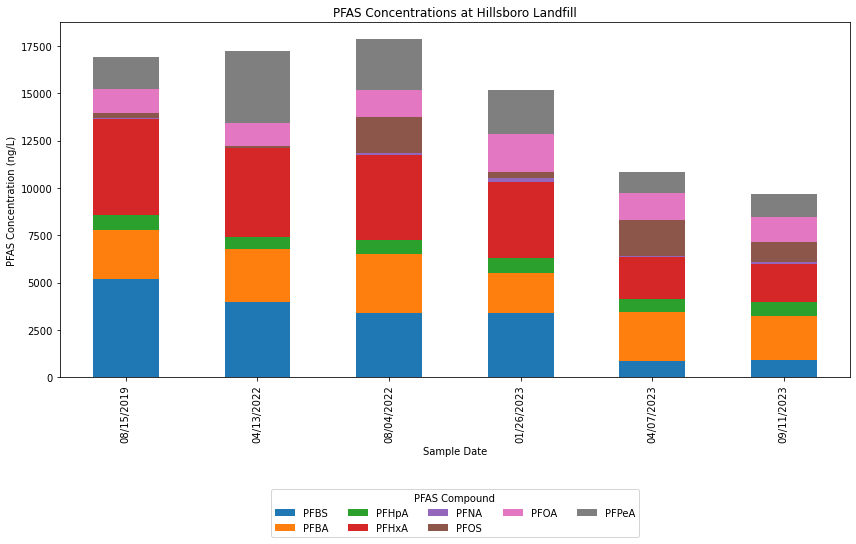

In [114]:
#figsize (tuple, optional): A tuple (width, height) specifying the figure size.
figsize=(12, 8) #Modify plot size as needed.
#legend_height (float, optional): The second bbox_to_anchor value for adjusting the legend height.
legend_height=-0.3 #Modify the legend location as needed.
create_stacked_bar_chart(pivot_table, title = title,figsize=figsize,legend_height=legend_height,pfas_attributes=df_PFAS_Attributes)

#### 9.4) Export Tables

In [115]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'AvgPFASCompoundByDate': pivot_table}

#filename: The name of the Excel file to write to.
filename= 'output.xlsx'
dfs_to_excel(dfs, filename)

File 'output.xlsx' has been written with 1 tabs.


### 10) Effects of TOP Assay on Influent vs EFfluent

#### 10.1) Functions

In [116]:
def create_custom_pivot_table_with_filters(data_df, filter_qual_summary=None, start_date=None, end_date=None, filter_type=None, filter_sample_location=None, filter_pfas_compound=None, column_name='All (w BDL= MDL/2)', column_prefix=None):
    """
    Create a custom pivot table with filters based on multiple columns and calculate the average specified column
    for each PFAS Compound at each Sample Location.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        column_name (str, optional): Name of the column to calculate the average (default is 'All (w BDL= MDL/2)').
        column_prefix (str, optional): Prefix to add to the pivot table column names (default is None).

    Returns:
        pd.DataFrame: The custom pivot table with average specified column values.
    """
    try:
        # Apply filters based on multiple columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Sample Location' as columns, 'PFAS Compound' as rows, and average specified column as values
        pivot_table = pd.pivot_table(filtered_data, values=column_name,
                                     index='PFAS Compound', columns='Sample Location',
                                     aggfunc='mean', fill_value=np.nan)

        # Add prefix to column names if specified
        if column_prefix:
            pivot_table.columns = [f"{column_prefix}{col}" for col in pivot_table.columns]

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [117]:
def merge_pivot_tables(table1, table2):
    """
    Merge two pivot tables based on row names, considering the 'TOP-' part in the second table.

    Args:
        table1 (pd.DataFrame): The first pivot table to be merged.
        table2 (pd.DataFrame): The second pivot table to be merged.

    Returns:
        pd.DataFrame: The merged pivot table.
    """
    # Create copies of the input tables to avoid modifying the originals
    merged_table1 = table1.copy()
    merged_table2 = table2.copy()

    # Remove 'TOP-' from the row names in the second table
    merged_table2.index = merged_table2.index.str.replace('TOP-', '')

    # Merge the two tables based on row names
    merged_table = pd.concat([merged_table1, merged_table2], axis=1)

    return merged_table


In [118]:
def calculate_increase_from_precursors(pivot_table, filter_sample_location):
    """
    Calculate the increase from precursors for each Sample Location in a pivot table.

    Args:
        pivot_table (pd.DataFrame): The pivot table containing PFAS data.
        filter_sample_location (list of str): List of Sample Locations to calculate increases for.

    Returns:
        pd.DataFrame: The pivot table with columns for increase from precursors.
    """
    try:
        result_table = pivot_table.copy()

        for location in filter_sample_location:
            original_column = location
            digested_column = f"Digested {location}"
            increase_column = f"Increase from Precursor for {location}"

            # Calculate the increase from precursors by subtracting digested values from original values
            result_table[increase_column] = result_table[original_column] - result_table[digested_column]

        return result_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



In [119]:
def create_stacked_bar_chart(table, title=None, ylabel=None, figsize=None):
    """
    Create a stacked bar chart from a DataFrame with values stacked for each column.

    Args:
        data_df (pd.DataFrame): The DataFrame containing data for the chart.
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.

    Returns:
        None: Displays the stacked bar chart.
    """
    try:
        # Filter columns to keep only those that do not start with 'Increase from Precursors'
        filtered_df = table.loc[:, ~table.columns.str.startswith('Increase from Precursor')]

        # Transpose the DataFrame to have columns as categories on the x-axis
        transposed_df = filtered_df.T

        # Create a stacked bar chart
        fig, ax = plt.subplots(figsize=figsize or (10, 6))
        transposed_df.plot(kind='bar', stacked=True, ax=ax)
        plt.xlabel('Sample Location')
        plt.ylabel(ylabel or 'PFAS Concentration (ng/L)')
        plt.title(title or 'Stacked Bar Chart of PFAS Compounds')

        # Set the legend outside the plot to the right
        ax.legend(title='PFAS Compound', bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")





#### 10.2) Define Filters and Settings

In [120]:
# filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']

#start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-04-06'

#end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-04-07'

#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).

#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Durham Effluent','Durham Influent']

#column_name (str, optional): Name of the column to calculate the average (default is 'All (w BDL= MDL/2) Incl Qual Flags').
column_name='Quant Incl Estimates Incl Qual Flags'

#column_prefix (str, optional): Prefix to add to the pivot table column names (default is None).
# No need to change.
column_prefix = 'Digested '

#### 10.2) Create Pivot Table for Main and TOP Assay of PFAS Concentrations (Avg) at Influent and Effluent

In [121]:
AvgPFAS = create_custom_pivot_table_with_filters(data_df, filter_qual_summary=filter_qual_summary, start_date=start_date, end_date=end_date, filter_type=None, 
                                       filter_sample_location=filter_sample_location, filter_pfas_compound=Main_Assay, column_name=column_name)

AvgPFAS

Sample Location,Durham Effluent,Durham Influent
PFAS Compound,,
Perfluorobutanesulfonic acid,7.3,7.6
Perfluorobutanoic acid,0.0,0.0
Perfluoroheptanoic acid,0.0,0.0
Perfluorohexanesulfonic acid,0.0,0.0
Perfluorohexanoic acid,9.9,0.0
Perfluorononanoic acid,0.0,0.0
Perfluorooctanesulfonic acid (PFOS),0.0,11.0
Perfluorooctanoic acid (PFOA),7.8,8.1
Perfluoropentanoic acid,6.7,7.0


In [122]:
Digested_AvgPFAS = create_custom_pivot_table_with_filters(data_df, filter_qual_summary=filter_qual_summary, start_date=start_date, end_date=end_date, filter_type=None, 
                                       filter_sample_location=filter_sample_location, filter_pfas_compound=TOP_Assay, column_name=column_name,column_prefix=column_prefix)
Digested_AvgPFAS

,Digested Durham Effluent,Digested Durham Influent
PFAS Compound,,
TOP-Perfluorobutanesulfonic acid,4.8,6.3
TOP-Perfluorobutanoic acid,18.0,18.0
TOP-Perfluoroheptanoic acid,3.2,6.0
TOP-Perfluorohexanesulfonic acid,0.0,3.7
TOP-Perfluorohexanoic acid,14.0,12.0
TOP-Perfluorononanoic acid,0.0,2.7
TOP-Perfluorooctanesulfonic acid (PFOS),7.9,26.0
TOP-Perfluoropentanoic acid,11.0,18.0
TOP-Perfluorotridecanoic acid,0.0,2.6


#### 10.3) Merge Avg PFAS Concentration and Digested Concentrations Tables & Calculate Increase from Precursor

In [123]:
#Input the two tables to be merged together
pivot_table=merge_pivot_tables(AvgPFAS, Digested_AvgPFAS)
table = calculate_increase_from_precursors(pivot_table=pivot_table, filter_sample_location=filter_sample_location)
table

,Durham Effluent,Durham Influent,Digested Durham Effluent,Digested Durham Influent,Increase from Precursor for Durham Effluent,Increase from Precursor for Durham Influent
PFAS Compound,,,,,,
Perfluorobutanesulfonic acid,7.3,7.6,4.8,6.3,2.5,1.3
Perfluorobutanoic acid,0.0,0.0,18.0,18.0,-18.0,-18.0
Perfluoroheptanoic acid,0.0,0.0,3.2,6.0,-3.2,-6.0
Perfluorohexanesulfonic acid,0.0,0.0,0.0,3.7,0.0,-3.7
Perfluorohexanoic acid,9.9,0.0,14.0,12.0,-4.1,-12.0
Perfluorononanoic acid,0.0,0.0,0.0,2.7,0.0,-2.7
Perfluorooctanesulfonic acid (PFOS),0.0,11.0,7.9,26.0,-7.9,-15.0
Perfluorooctanoic acid (PFOA),7.8,8.1,NaN,NaN,NaN,NaN
Perfluoropentanoic acid,6.7,7.0,11.0,18.0,-4.3,-11.0


#### 10.4) Create Stacked Bar Chart for Avg PFAS Concentrations

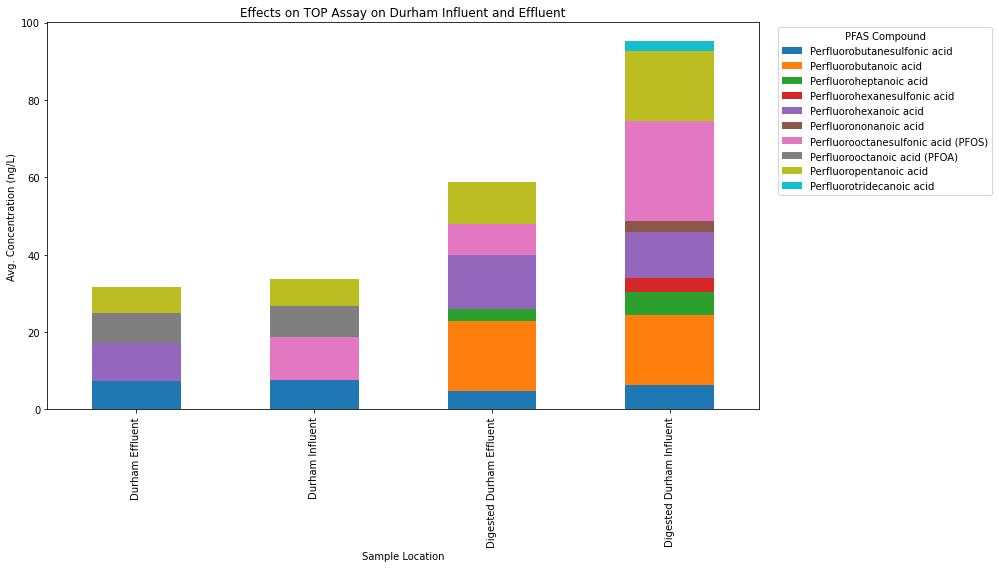

In [124]:
# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
data_df.index = data_df.index.map(pfas_mapping)

#title (str, optional): The title for the chart.
title='Effects on TOP Assay on Durham Influent and Effluent'

#ylabel (str, optional): The label for the y-axis.
ylabel='Avg. Concentration (ng/L)'

#figsize (tuple, optional): A tuple (width, height) specifying the figure size.
figsize=(14,8)

create_stacked_bar_chart(table, title=title, ylabel='Avg. Concentration (ng/L)', figsize=figsize)

#### 10.5) Export Tables 

In [125]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'AvgConInflvsEff': AvgPFAS,
       'DigestedInfvsEff':Digested_AvgPFAS,
       'AllMerged':table}

#filename: The name of the Excel file to write to.
filename= 'output.xlsx'
dfs_to_excel(dfs, filename)

File 'output.xlsx' has been written with 3 tabs.


### 11)Avg PFAS Concentration over Time 


#### 11.1) Functions

In [126]:
def create_pivot_table(data_df, filter_type=None, filter_sample_location=None, filter_pfas_compound=None):
    """
    Create a pivot table with filtering options based on 'Type,' 'Sample Location,' and 'PFAS Compound.'

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).

    Returns:
        pd.DataFrame: The pivot table with rows as 'Sample Date,' columns as 'Sample Location,' and values as
        the average 'Quant Incl Estimates Incl Qual Flags.'
    """
    try:
        # Apply filters based on multiple columns
        filtered_data = data_df
        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Sample Date' as rows, 'Sample Location' as columns, and average 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Date', columns='Sample Location',
                                     aggfunc='mean', fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



In [127]:
def create_line_chart_from_pivot(pivot_table, ylabel=None):
    """
    Create a line chart with data markers for each column in the pivot table against the 'Sample Date.'

    Args:
        pivot_table (pd.DataFrame): The pivot table containing data to plot.
        ylabel (str, optional): The label for the y-axis (default is None).

    Returns:
        None: Displays the line chart with data markers and legends.
    """
    try:
        # Create a line chart with data markers for each column in the pivot table
        fig, ax = plt.subplots(figsize=(12, 6))
        for col in pivot_table.columns:
            plt.plot(pivot_table.index, pivot_table[col], label=col, marker='o', markersize=5)

        # Set labels and title
        plt.xlabel('Sample Date')
        plt.ylabel(ylabel or 'Avg PFAS Concentration (ng/L)')
        plt.title('Line Chart of PFAS Concentrations Over Time')

        # Add a legend
        plt.legend()

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")


#### 11.2) Filters and Settings

In [128]:
# filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Durham Influent','MH#10840','MH#16149','MH#17032','MH#52519','MH#52520','MH#52521','MH#87535']
# qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
#qual_summary=

#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Influent','Manhole','Outfall of Industry']
# 
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound = ['Perfluorooctanoic acid (PFOA)']

#### 11.3) Create Pivot Table Average Single PFAS Compound Concentration at Multiple Sites

In [129]:
pivot_table = create_pivot_table(data_df, filter_type=filter_type, filter_sample_location=filter_sample_location, filter_pfas_compound=filter_pfas_compound)
pivot_table

Sample Location,Durham Influent,MH#10840,MH#16149,MH#17032,MH#52519,MH#52520,MH#52521,MH#87535
Sample Date,,,,,,,,
2019-08-22,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-04,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-07,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,20.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-23,280.0,310.0,NaN,320.0,NaN,NaN,NaN,NaN
2020-06-12,110.0,74.0,NaN,1000.0,24.0,NaN,870.0,1200.0
2020-08-07,NaN,NaN,NaN,420.0,NaN,1100.0,NaN,1100.0
2020-09-23,11.0,13.0,NaN,NaN,NaN,NaN,NaN,470.0
2020-12-10,7.6,8.8,29.0,NaN,NaN,NaN,70.0,17.0


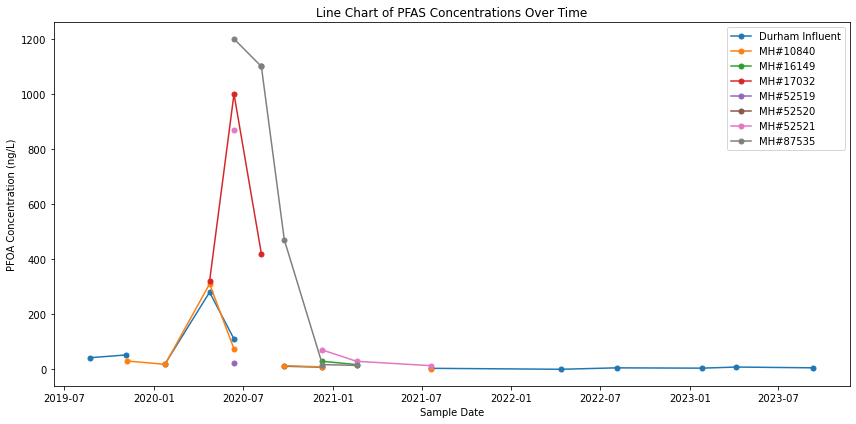

In [130]:
ylabel='PFOA Concentration (ng/L)' #Please change the y-axis label as needed
create_line_chart_from_pivot(pivot_table, ylabel=ylabel)

#### 11.3) Export Tables

In [131]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'ConcAtMHbyDate': pivot_table}

#filename: The name of the Excel file to write to.
filename= 'output.xlsx'
dfs_to_excel(dfs, filename)

File 'output.xlsx' has been written with 1 tabs.


### 12) Average PFAS Compounds Concentrations for Various Sample Types and Error

#### 12.1) Functions

In [132]:
def create_pivot_table_from_dataframe(data_df, filter_qual_summary=None, filter_sample_location=None, filter_type=None, filter_pfas_compound=None, aggfunc='mean'):
    """
    Create a pivot table from a given DataFrame with specified filters and calculate the specified aggregation function
    for each PFAS Compound and Type.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
            Supported values: 'mean', 'count', 'std' (standard deviation), 'sum', 'min', 'max', 'median'.

    Returns:
        pd.DataFrame: The pivot table with specified aggregation function applied to the values.
    """
    try:
        # Apply filters based on specified columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Type' as columns, 'PFAS Compound' as rows, and specified aggregation function as values
        pivot_table = pd.pivot_table(filtered_data, values='All (w BDL= MDL/2) Incl Qual Flags',
                                     index='PFAS Compound', columns='Type',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



In [133]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



In [134]:
def create_grouped_bar_chart_with_errors(avg_pivot_table, error_pivot_table, title=None, ylabel=None, figsize=None):
    """
    Create a grouped bar chart from a pivot table with rows as groups and columns as subgroups, including error bars.

    Args:
        avg_pivot_table (pd.DataFrame): The pivot table containing average data.
        error_pivot_table (pd.DataFrame): The pivot table containing error data (standard deviations).
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.

    Returns:
        None: Displays the grouped bar chart with error bars.
    """
    try:
        # Create a grouped bar chart with error bars
        fig, ax = plt.subplots(figsize=figsize or (10, 6))
        subgroups = avg_pivot_table.columns
        group_indices = range(len(avg_pivot_table))
        bar_width = 0.2  # Width of each bar within a group

        for i, subgroup in enumerate(subgroups):
            x = [index + i * bar_width for index in group_indices]
            avg_values = avg_pivot_table[subgroup]
            error_values = error_pivot_table[subgroup]

            plt.bar(x, avg_values, width=bar_width, label=subgroup, yerr=error_values, capsize=5)

        # Customize the chart labels and legend
        plt.xlabel('PFAS Compounds')
        plt.ylabel(ylabel or 'Average Concentration')
        plt.title(title or 'Grouped Bar Chart of Average Concentrations with Error Bars')

        # Set the legend outside the plot to the right
        ax.legend(title='Sample Type', bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.xticks([index + (len(subgroups) - 1) * bar_width / 2 for index in group_indices], avg_pivot_table.index)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

#### 12.2) Filters and Settings

In [135]:
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok',' ']
#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Biosolids','Effluent','Influent']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound = ['Perfluorobutanoic acid','Perfluorobutanesulfonic acid','Perfluoropentanoic acid','HFPO-DA','Perfluoropentanesulfonic acid']


#### 12.2) Create Pivot Table for Avg Concentrations

In [136]:
Avg_Pivot =create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=None, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='mean')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
Avg_Pivot.index = Avg_Pivot.index.map(pfas_mapping)

Avg_Pivot

Type,Biosolids,Effluent,Influent
PFAS Compound,,,
HFPO-DA,1.845294,1.602258,2.584634
PFBS,1.096842,7.860152,8.344186
PFBA,2.147368,13.123529,13.411364
PFPeS,0.601579,0.952794,1.932727
PFPeA,0.551053,11.120588,9.478409


#### 12.3) Create Pivot Table for Standard Deviation

In [137]:
std_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=None, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='std')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
std_Pivot.index = std_Pivot.index.map(pfas_mapping)

std_Pivot

Type,Biosolids,Effluent,Influent
PFAS Compound,,,
HFPO-DA,1.308769,1.852173,1.382543
PFBS,1.217703,8.065459,10.145884
PFBA,2.460774,12.155808,12.208084
PFPeS,0.598886,0.941339,0.745413
PFPeA,0.602236,7.345367,6.891454


#### 12.4) Create Pivot Table for Count of Samples

In [138]:
count_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=None, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='count')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
count_Pivot.index = count_Pivot.index.map(pfas_mapping)

count_Pivot

Type,Biosolids,Effluent,Influent
PFAS Compound,,,
HFPO-DA,17,31,41
PFBS,19,33,43
PFBA,19,34,44
PFPeS,19,34,44
PFPeA,19,34,44


#### 12.5) Create Pivot Table for Sampling Error

In [139]:
average_pivot=Avg_Pivot
std_dev_pivot = std_Pivot
count_pivot=count_Pivot
error_Pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
error_Pivot.index = error_Pivot.index.map(pfas_mapping)

error_Pivot

Type,Biosolids,Effluent,Influent
PFAS Compound,,,
HFPO-DA,0.317423,0.332660,0.215917
NaN,0.279360,1.404016,1.547233
NaN,0.564540,2.084704,1.840438
NaN,0.137394,0.161438,0.112375
NaN,0.138162,1.259720,1.038926


#### 12.6) Create Bar Chart for Avg PFAS Concentrations Using Type as Subgroup

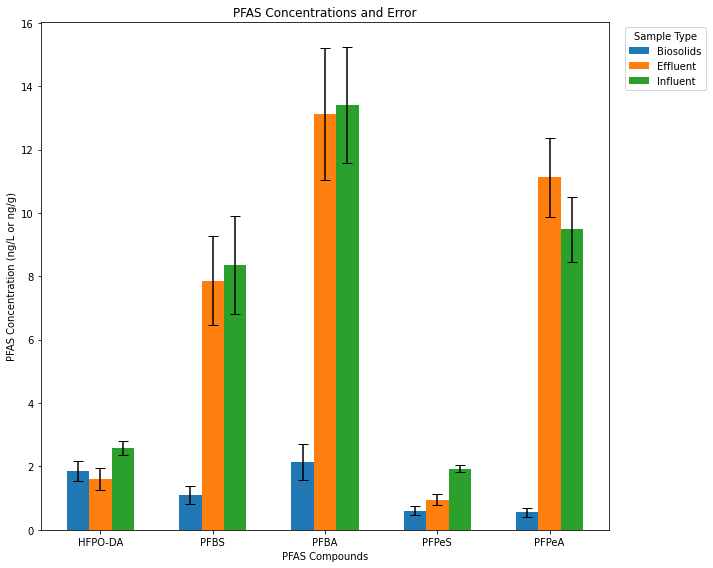

In [140]:
avg_pivot_table=Avg_Pivot
error_pivot_table=error_Pivot

#title (str, optional): The title for the chart.
title='PFAS Concentrations and Error'
#ylabel (str, optional): The label for the y-axis.
ylabel='PFAS Concentration (ng/L or ng/g)'
#figsize (tuple, optional): A tuple (width, height) specifying the figure size.figsize
figsize=(10,8) #Change as needed
create_grouped_bar_chart_with_errors(avg_pivot_table=avg_pivot_table, error_pivot_table=error_pivot_table, title=title, ylabel=ylabel, figsize=figsize)

#### 12.7) Export Tables

In [142]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'AvgConcent': Avg_Pivot,
       'StdConcent':std_Pivot,
       'CountConcent':count_Pivot,
       'ErrorConcent':error_Pivot}

#filename: The name of the Excel file to write to.
filename= 'output.xlsx'
dfs_to_excel(dfs, filename)

File 'output.xlsx' has been written with 4 tabs.


### 13) All Data Records for Specific Sampling Location

#### 13.1) Functions

In [143]:
def create_custom_pivot_table(data_df, value_column='Quant Incl Estimates Incl Qual Flags', filter_qual_summary=None, start_date=None, end_date=None, filter_pfas_compounds=None, filter_sample_location=None):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'Sample Location',
    'Sample Date', 'PFAS Compounds', and 'Sample Location'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        value_column (str, optional): The column to use as pivot table values (default is 'Quant Incl Estimates Incl Qual Flags').
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).
        filter_pfas_compounds (list of str, optional): List of 'PFAS Compounds' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).

    Returns:
        pd.DataFrame: The custom pivot table with average values.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Apply filters based on 'PFAS Compounds'
        if filter_pfas_compounds:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compounds)]

        # Apply filter based on 'Sample Location'
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Create a pivot table with 'Sample Date' as columns, 'PFAS Compound' as rows, and specified value column as values
        pivot_table = pd.pivot_table(filtered_data, values=value_column,
                                     index='PFAS Compound', columns='Sample Date',
                                     aggfunc='mean', fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [144]:
def create_combined_pivot(Quat, QuatInc, MDL):
    # Create an empty DataFrame with the same structure as the input tables
    combined_pivot = pd.DataFrame(index=Quat.index, columns=Quat.columns)
    
    # Iterate through rows and columns
    for row in Quat.index:
        for col in Quat.columns:
            Quat_value = Quat.loc[row, col] if row in Quat.index and col in Quat.columns else np.nan
            QuatInc_value = QuatInc.loc[row, col] if row in QuatInc.index and col in QuatInc.columns else np.nan
            MDL_value = MDL.loc[row, col] if row in MDL.index and col in MDL.columns else np.nan
            
            # Check if the values are numeric
            if pd.notna(Quat_value):
                Quat_value = float(Quat_value)  # Convert to float
                QuatInc_value = float(QuatInc_value)  # Convert to float
                MDL_value = float(MDL_value)  # Convert to float
                
                if Quat_value > 0:
                    combined_pivot.loc[row, col] = str(Quat_value)
                elif QuatInc_value > 0:
                    combined_pivot.loc[row, col] = str(QuatInc_value) + " E"
                else:
                    combined_pivot.loc[row, col] = "< " + str(MDL_value)
            else:
                combined_pivot.loc[row, col] = ""
    
    return combined_pivot



#### 13.2 Filters and Settings

In [145]:
# Filter criteria
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
# filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location=['Jireh Semiconductor Inc']

#### 13.2 Pivot Table for Average of Quant Only Incl Qual Flags

In [146]:
quant_pivot=create_custom_pivot_table(data_df,value_column='Quant Only Incl Qual Flags', filter_qual_summary=filter_qual_summary, start_date=None, end_date=None, filter_pfas_compounds=None, filter_sample_location=filter_sample_location)
quant_pivot

Sample Date,2022-04-13,2022-08-04,2023-01-26,2023-04-07,2023-09-11
PFAS Compound,,,,,
10:2Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0
11Cl-PF3OUdS,0.0,0.0,0.0,0.0,0.0
4:2 Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0
6:2 Fluorotelomersulfonic acid,0.0,NaN,0.0,0.0,0.0
8:2 Fluorotelomersulfonic acid,0.0,0.0,0.0,0.0,0.0
9Cl-PF3ONS,0.0,0.0,0.0,0.0,0.0
ADONA,0.0,0.0,0.0,0.0,0.0
HFPO-DA,NaN,0.0,2.1,0.0,2.1
NEtFOSA,0.0,0.0,0.0,0.0,0.0


#### 13.3) Pivot Table for Quant Incl Estimates Incl Qual Flags

In [147]:
QuatInc_Pivot = create_custom_pivot_table(data_df,value_column='Quant Incl Estimates Incl Qual Flags', filter_qual_summary=filter_qual_summary, start_date=None, end_date=None, filter_pfas_compounds=None, filter_sample_location=filter_sample_location)
QuatInc_Pivot

Sample Date,2022-04-13,2022-08-04,2023-01-26,2023-04-07,2023-09-11
PFAS Compound,,,,,
10:2Fluorotelomersulfonic acid,0.0,0.0,0.00,0.0,0.0
11Cl-PF3OUdS,0.0,0.0,0.00,0.0,0.0
4:2 Fluorotelomersulfonic acid,0.0,0.0,0.00,0.0,0.0
6:2 Fluorotelomersulfonic acid,0.0,NaN,0.00,0.0,0.0
8:2 Fluorotelomersulfonic acid,0.0,0.0,0.00,0.0,0.0
9Cl-PF3ONS,0.0,0.0,0.00,0.0,0.0
ADONA,0.0,0.0,0.00,0.0,0.0
HFPO-DA,NaN,0.0,2.10,1.8,2.1
NEtFOSA,0.0,0.0,0.00,0.0,0.0


#### 13.4) Pivot Table for Avg MDL

In [148]:
MDL_Pivot=create_custom_pivot_table(data_df,value_column='MDL', filter_qual_summary=filter_qual_summary, start_date=None, end_date=None, filter_pfas_compounds=None, filter_sample_location=filter_sample_location)
MDL_Pivot

Sample Date,2022-04-13,2022-08-04,2023-01-26,2023-04-07,2023-09-11
PFAS Compound,,,,,
10:2Fluorotelomersulfonic acid,0.87,10.0,0.77,2.00,0.74
11Cl-PF3OUdS,0.44,5.0,0.48,1.30,0.47
4:2 Fluorotelomersulfonic acid,0.44,5.0,0.48,1.30,0.47
6:2 Fluorotelomersulfonic acid,1.70,NaN,0.48,1.30,0.47
8:2 Fluorotelomersulfonic acid,0.87,10.0,0.58,1.50,0.56
9Cl-PF3ONS,0.44,5.0,0.48,1.30,0.47
ADONA,0.44,5.0,0.48,1.30,0.47
HFPO-DA,NaN,10.0,NaN,NaN,NaN
NEtFOSA,0.87,10.0,0.38,1.00,0.37


#### 13.5 Data Compilation Table

In [149]:
# Call function and provide previous tables as inputs
PFAS_Results_Location = create_combined_pivot(Quat=quant_pivot, QuatInc=QuatInc_Pivot, MDL=MDL_Pivot)

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))

# Rename the index of data_df using the mapping (No need to change)
PFAS_Results_Location.index = PFAS_Results_Location.index.map(pfas_mapping)

PFAS_Results_Location

Sample Date,2022-04-13,2022-08-04,2023-01-26,2023-04-07,2023-09-11
PFAS Compound,,,,,
10:2FTS,< 0.87,< 10.0,< 0.77,< 2.0,< 0.74
11Cl-PF3OUdS,< 0.44,< 5.0,< 0.48,< 1.3,< 0.47
4:2FTS,< 0.44,< 5.0,< 0.48,< 1.3,< 0.47
6:2FTS,< 1.7,,< 0.48,< 1.3,< 0.47
8:2FTS,< 0.87,< 10.0,< 0.58,< 1.5,< 0.56
9Cl-PF3ONS,< 0.44,< 5.0,< 0.48,< 1.3,< 0.47
ADONA,< 0.44,< 5.0,< 0.48,< 1.3,< 0.47
HFPO-DA,,< 10.0,2.1,1.8 E,2.1
NEtFOSA,< 0.87,< 10.0,< 0.38,< 1.0,< 0.37


#### 13.6) Export Tables

In [150]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'QuantConcent': quant_pivot,
       'QuantIncConcent':QuatInc_Pivot,
       'MDLs':MDL_Pivot,
       'AllCompiled':PFAS_Results_Location}

#filename: The name of the Excel file to write to.
filename= 'output.xlsx'
dfs_to_excel(dfs, filename)

File 'output.xlsx' has been written with 4 tabs.


### 14) PFAS Concentrations by Industry Sectors

#### 14.1) Functions

In [181]:
def create_custom_pivot(data_df, filter_type=None, filter_qual_summary=None, filter_sector=None, filter_pfas_compound=None, aggfunc='mean'):
    """
    Create a custom pivot table with filters based on 'Type', 'Qual Summary (Grade for filtering)',
    'Sector', and 'PFAS Compound', averaging 'Quant Incl Estimates Incl Qual Flags'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').

    Returns:
        pd.DataFrame: The custom pivot table with average values.
    """
    try:
        # Apply filters based on 'Type'
        filtered_data = data_df
        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        # Apply filters based on 'Qual Summary (Grade for filtering)'
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'Sector'
        if filter_sector:
            filtered_data = filtered_data[filtered_data['Sector'].isin(filter_sector)]

        # Apply filters based on 'PFAS Compound'
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'PFAS Compound' as rows, 'Sector' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='PFAS Compound', columns='Sector',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [167]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [168]:
def create_bar_chart(average_pivot, std_error_pivot, figsize=(12, 6), title=None, xlabel=None, ylabel=None):
    """
    Create a bar chart with grouped and stacked bars, legend, and error bars.

    Args:
        average_pivot (pd.DataFrame): Pivot table with averages, PFAS Compound as rows, and Sector as columns.
        std_error_pivot (pd.DataFrame): Pivot table with standard errors, PFAS Compound as rows, and Sector as columns.
        figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
        title (str, optional): Title for the chart. Default is None.
        xlabel (str, optional): Label for the x-axis. Default is None.
        ylabel (str, optional): Label for the y-axis. Default is None.
    """
    # Get the sectors and compounds from the pivot tables
    sectors = average_pivot.columns
    compounds = average_pivot.index

    # Set the width of the bars
    bar_width = 0.35

    # Initialize a figure and axis for the bar chart
    fig, ax = plt.subplots(figsize=figsize)

    # Create an index array for the x-axis positions
    x = np.arange(len(sectors))

    # Initialize a list to store the bottom values for stacked bars
    bottom = np.zeros(len(sectors))

    # Loop through each PFAS Compound
    for compound in compounds:
        # Get the average values for the compound
        averages = average_pivot.loc[compound]

        # Get the standard error values for the compound
        std_errors = std_error_pivot.loc[compound]

        # Create the bars for the compound, stacking on the previous bars
        bars = ax.bar(x, averages, bar_width, label=compound, yerr=std_errors, bottom=bottom, capsize=5)

        # Update the bottom values for the next compound
        bottom += averages

    # Set the x-axis labels to be the sectors
    ax.set_xticks(x)
    ax.set_xticklabels(sectors)

    # Set labels and title
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if title:
        ax.set_title(title)

    # Add a legend
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()


#### 14.2) Filters and Settings

In [169]:
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type=['Outfall of Industry']
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
#filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
filter_sector= ['Chemicals','Electrical and Electronic Components','Industrial Launderers','Metal Finishing','Paper Products','Rubber Manufacture']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= ['6:2 Fluorotelomersulfonic acid','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid',
                       'Perfluorododecanoic acid','Perfluoroheptanoic acid','Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide',
                       'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluoropentanoic acid']

#### 14.3) Create Pivot Table for Average PFAS Compounds Concentrations at Various Industry Sectors

In [184]:
average_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,aggfunc = 'mean')
# Rename the index of data_df using the mapping (No need to change)
average_pivot.index = average_pivot.index.map(pfas_mapping)
average_pivot

Sector,Chemicals,Electrical and Electronic Components,Industrial Launderers,Metal Finishing,Paper Products,Rubber Manufacture
PFAS Compound,,,,,,
6:2FTS,5.00,0.120000,5.525,18.716000,38.000000,23.250000
PFBS,0.00,31.638261,22.400,2.075217,1.520000,0.142500
PFBA,0.00,100.521739,0.540,7.811111,0.000000,58.025000
PFDA,0.00,5.098000,0.300,60.844828,0.000000,47.333333
PFDoA,0.00,1.092000,1.198,10.987000,0.000000,6.200000
PFHpA,0.95,20.620800,0.500,44.231667,4.133333,117.590000
PFHxA,2.27,36.482174,2.400,92.150000,5.900000,538.200000
PFNA,0.00,7.805200,1.360,40.675862,0.000000,23.400000
FOSA,0.55,0.531739,0.000,4.856207,0.000000,4.475000


#### 14.3) Create Pivot Table for Average Standard Deviation for PFAS Compounds Concentrations at Various Industry Sectors

In [185]:
std_dev_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,aggfunc = 'std')
# Rename the index of data_df using the mapping (No need to change)
std_dev_pivot.index = std_dev_pivot.index.map(pfas_mapping)
std_dev_pivot

Sector,Chemicals,Electrical and Electronic Components,Industrial Launderers,Metal Finishing,Paper Products,Rubber Manufacture
PFAS Compound,,,,,,
6:2FTS,7.071068,0.427381,6.037315,57.851028,12.165525,15.777093
PFBS,0.000000,59.640598,47.890751,5.189358,3.398823,0.285000
PFBA,0.000000,176.785934,1.207477,13.909746,0.000000,65.921184
PFDA,0.000000,8.561329,0.670820,241.874521,0.000000,29.021831
PFDoA,0.000000,1.887882,2.362842,39.026394,0.000000,3.619392
PFHpA,1.343503,34.541161,1.118034,111.899284,3.744774,84.452168
PFHxA,2.022325,57.292014,2.831078,209.653222,5.672742,492.393339
PFNA,0.000000,13.144855,1.293445,154.673392,0.000000,16.861198
FOSA,0.777817,1.412595,0.000000,8.924346,0.000000,5.831738


#### 14.4) Create Pivot Table for Count of PFAS Compounds Concentrations at Various Industry Sectors

In [186]:
count_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,aggfunc = 'count')
# Rename the index of data_df using the mapping (No need to change)
count_pivot.index = count_pivot.index.map(pfas_mapping)
count_pivot

Sector,Chemicals,Electrical and Electronic Components,Industrial Launderers,Metal Finishing,Paper Products,Rubber Manufacture
PFAS Compound,,,,,,
6:2FTS,2,23,4,25,3,4
PFBS,2,23,6,23,5,4
PFBA,2,23,5,27,4,4
PFDA,2,25,5,29,5,6
PFDoA,2,25,5,30,4,5
PFHpA,2,25,5,30,3,6
PFHxA,2,23,5,28,4,5
PFNA,2,25,5,29,4,5
FOSA,2,23,5,29,4,4


#### 14.4) Create Pivot Table for Standard Error of PFAS Compounds Concentrations at Various Industry Sectors

In [187]:
std_error_pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
std_error_pivot

Sector,Chemicals,Electrical and Electronic Components,Industrial Launderers,Metal Finishing,Paper Products,Rubber Manufacture
PFAS Compound,,,,,,
6:2FTS,5.00,0.089115,3.018657,11.570206,7.023769,7.888547
PFBS,0.00,12.435924,19.551317,1.082056,1.520000,0.142500
PFBA,0.00,36.862415,0.540000,2.676932,0.000000,32.960592
PFDA,0.00,1.712266,0.300000,44.914971,0.000000,11.848113
PFDoA,0.00,0.377576,1.056695,7.125212,0.000000,1.618641
PFHpA,0.95,6.908232,0.500000,20.429921,2.162046,34.477453
PFHxA,1.43,11.946211,1.266096,39.620735,2.836371,220.204995
PFNA,0.00,2.628971,0.578446,28.722128,0.000000,7.540557
FOSA,0.55,0.294546,0.000000,1.657210,0.000000,2.915869


#### 14.5) Create Bar Chart for Average PFAS Concentrations at Various Industry Sectors Showing Standard Error

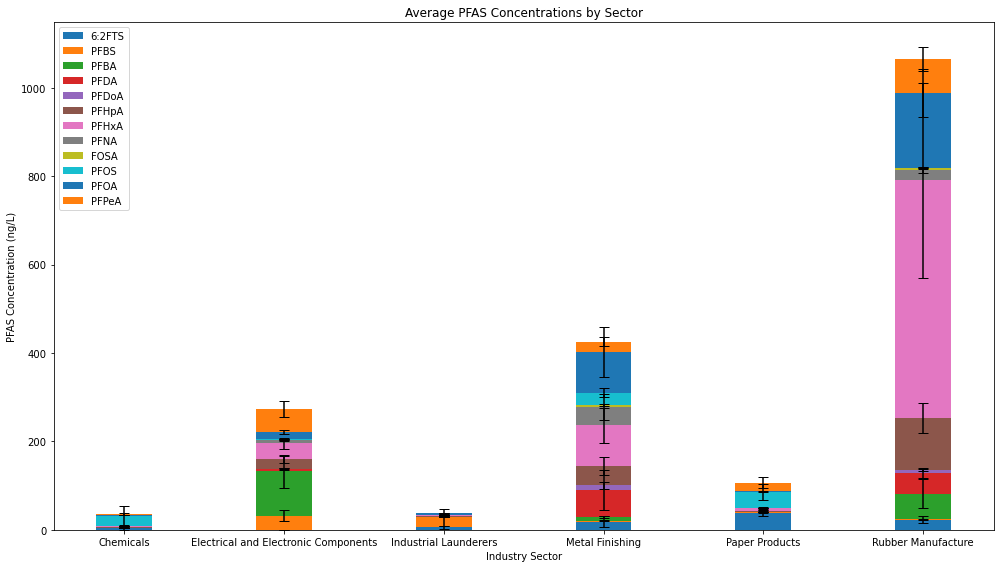

In [188]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(14, 8)
#title (str, optional): Title for the chart. Default is None.
title='Average PFAS Concentrations by Sector'
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel='Industry Sector'
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='PFAS Concentration (ng/L)'

create_bar_chart(average_pivot, std_error_pivot, figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel)

### 15) PFAS Compound Average Concentrations at Various Sampling Location of the Same Industry Sector

#### 15.1) Functions

In [189]:
def create_filtered_pivot_table(data_df, filter_type=None, filter_qual_summary=None, filter_sector=None, filter_pfas_compound=None, filter_sample_location=None, aggfunc='mean'):
    """
    Create a filtered pivot table from a DataFrame based on multiple filters.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        #aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').

    Returns:
        pd.DataFrame: The filtered pivot table with 'Sample Location' as columns and 'PFAS Compound' as rows.
    """
    try:
        # Apply filters based on columns
        filtered_data = data_df
        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]
        if filter_sector:
            filtered_data = filtered_data[filtered_data['Sector'].isin(filter_sector)]
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Create a pivot table with 'Sample Location' as columns and 'PFAS Compound' as rows
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags', index='PFAS Compound', columns='Sample Location', aggfunc=aggfunc,fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [190]:
def rename_pivot_columns_with_generic_names(pivot_table, sector_name):
    """
    Rename the columns of a pivot table with generic names based on a sector name.

    Args:
        pivot_table (pd.DataFrame): The pivot table to rename columns for.
        sector_name (str): The sector name to use for renaming columns.

    Returns:
        pd.DataFrame: The pivot table with renamed columns.
    """
    generic_names = [f"{sector_name} {chr(65 + i)}" for i in range(len(pivot_table.columns))]
    pivot_table.columns = generic_names
    return pivot_table


In [191]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [192]:
def create_bar_chart(average_pivot, std_error_pivot, figsize=(12, 6), title=None, xlabel=None, ylabel=None):
    """
    Create a bar chart with grouped and stacked bars, legend, and error bars.

    Args:
        average_pivot (pd.DataFrame): Pivot table with averages, PFAS Compound as rows, and Sector as columns.
        std_error_pivot (pd.DataFrame): Pivot table with standard errors, PFAS Compound as rows, and Sector as columns.
        figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
        title (str, optional): Title for the chart. Default is None.
        xlabel (str, optional): Label for the x-axis. Default is None.
        ylabel (str, optional): Label for the y-axis. Default is None.
    """
    # Get the sectors and compounds from the pivot tables
    sectors = average_pivot.columns
    compounds = average_pivot.index

    # Set the width of the bars
    bar_width = 0.35

    # Initialize a figure and axis for the bar chart
    fig, ax = plt.subplots(figsize=figsize)

    # Create an index array for the x-axis positions
    x = np.arange(len(sectors))

    # Initialize a list to store the bottom values for stacked bars
    bottom = np.zeros(len(sectors))

    # Loop through each PFAS Compound
    for compound in compounds:
        # Get the average values for the compound
        averages = average_pivot.loc[compound]

        # Get the standard error values for the compound
        std_errors = std_error_pivot.loc[compound]

        # Create the bars for the compound, stacking on the previous bars
        bars = ax.bar(x, averages, bar_width, label=compound, yerr=std_errors, bottom=bottom, capsize=5)

        # Update the bottom values for the next compound
        bottom += averages

    # Set the x-axis labels to be the sectors
    ax.set_xticks(x)
    ax.set_xticklabels(sectors)

    # Set labels and title
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if title:
        ax.set_title(title)

    # Add a legend
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

#### 15.2) Filters and Settings

In [26]:
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type= ['Outfall of Industry']

#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']

#filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
filter_sector= ['Electrical and Electronic Components']

#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound = ['6:2 Fluorotelomersulfonic acid','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid',
                        'Perfluorododecanoic acid','Perfluoroheptanoic acid','Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide',
                        'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluoropentanoic acid']

#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
#filter_sample_location = ['Intel Aloha F15','Intel Ronler PAWN']

#sector_name (str): The sector name to use for renaming columns.
sector_name  = 'Eletronic Components'

#### 15.2) Create Pivot Table for PFAS Compound Average Concentrations at Sample Locations

In [56]:
avg_pivot = create_filtered_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound, filter_sample_location=None, aggfunc='mean')
avg_pivot

Sample Location,Intel Aloha F15,Intel Ronler PAWN,Intel Ronler WATR,Jireh Semiconductor Inc,Maxim (Analog),OSRAM Opto Inc
PFAS Compound,,,,,,
6:2 Fluorotelomersulfonic acid,0.000000,0.000,0.000,0.0000,0.215,1.9
Perfluorobutanesulfonic acid,0.750000,0.780,64.560,56.3800,49.040,0.0
Perfluorobutanoic acid,0.766667,2.480,34.660,465.0000,52.800,0.0
Perfluorodecanoic acid,0.000000,0.070,0.760,20.8000,3.860,0.0
Perfluorododecanoic acid,0.000000,0.000,0.220,3.9600,1.280,0.0
Perfluoroheptanoic acid,0.000000,0.162,5.042,85.2000,12.700,0.0
Perfluorohexanoic acid,0.827500,1.845,15.600,135.0000,18.200,0.0
Perfluorononanoic acid,0.060000,0.058,1.700,31.8000,5.420,0.0
Perfluorooctanesulfonamide,2.200000,0.904,0.000,0.1375,0.112,0.0


In [57]:
avg_pivot=rename_pivot_columns_with_generic_names(avg_pivot, sector_name)
# Rename the index of data_df using the mapping (No need to change)
avg_pivot.index = avg_pivot.index.map(pfas_mapping)
avg_pivot

,Eletronic Components A,Eletronic Components B,Eletronic Components C,Eletronic Components D,Eletronic Components E,Eletronic Components F
PFAS Compound,,,,,,
6:2FTS,0.000000,0.000,0.000,0.0000,0.215,1.9
PFBS,0.750000,0.780,64.560,56.3800,49.040,0.0
PFBA,0.766667,2.480,34.660,465.0000,52.800,0.0
PFDA,0.000000,0.070,0.760,20.8000,3.860,0.0
PFDoA,0.000000,0.000,0.220,3.9600,1.280,0.0
PFHpA,0.000000,0.162,5.042,85.2000,12.700,0.0
PFHxA,0.827500,1.845,15.600,135.0000,18.200,0.0
PFNA,0.060000,0.058,1.700,31.8000,5.420,0.0
FOSA,2.200000,0.904,0.000,0.1375,0.112,0.0


#### 15.3) Create Pivot Table for PFAS Compound Standard Deviation Concentrations at Sample Locations

In [58]:
std_pivot = create_filtered_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound, filter_sample_location=None, aggfunc='std')
std_pivot

Sample Location,Intel Aloha F15,Intel Ronler PAWN,Intel Ronler WATR,Jireh Semiconductor Inc,Maxim (Analog)
PFAS Compound,,,,,
6:2 Fluorotelomersulfonic acid,0.000000,0.000000,0.000000,0.000000,0.430000
Perfluorobutanesulfonic acid,1.500000,1.122519,108.639398,60.595148,75.075349
Perfluorobutanoic acid,1.327906,3.646505,75.670853,59.721576,18.965759
Perfluorodecanoic acid,0.000000,0.156525,1.699412,4.324350,4.521946
Perfluorododecanoic acid,0.000000,0.000000,0.491935,2.312574,1.239758
Perfluoroheptanoic acid,0.000000,0.362243,10.602161,19.253571,5.069517
Perfluorohexanoic acid,1.455687,2.476644,30.273861,39.051248,6.685806
Perfluorononanoic acid,0.120000,0.129692,3.801316,8.167007,5.649071
Perfluorooctanesulfonamide,3.810512,0.731492,0.000000,0.275000,0.250440


In [59]:
std_pivot=rename_pivot_columns_with_generic_names(std_pivot, sector_name)
# Rename the index of data_df using the mapping (No need to change)
std_pivot.index = std_pivot.index.map(pfas_mapping)
std_pivot

,Eletronic Components A,Eletronic Components B,Eletronic Components C,Eletronic Components D,Eletronic Components E
PFAS Compound,,,,,
6:2FTS,0.000000,0.000000,0.000000,0.000000,0.430000
PFBS,1.500000,1.122519,108.639398,60.595148,75.075349
PFBA,1.327906,3.646505,75.670853,59.721576,18.965759
PFDA,0.000000,0.156525,1.699412,4.324350,4.521946
PFDoA,0.000000,0.000000,0.491935,2.312574,1.239758
PFHpA,0.000000,0.362243,10.602161,19.253571,5.069517
PFHxA,1.455687,2.476644,30.273861,39.051248,6.685806
PFNA,0.120000,0.129692,3.801316,8.167007,5.649071
FOSA,3.810512,0.731492,0.000000,0.275000,0.250440


#### 15.4) Create Pivot Table for Count of PFAS Compound Concentrations at Sample Locations

In [60]:
count_pivot=create_filtered_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound, filter_sample_location=None, aggfunc='count')
count_pivot

Sample Location,Intel Aloha F15,Intel Ronler PAWN,Intel Ronler WATR,Jireh Semiconductor Inc,Maxim (Analog),OSRAM Opto Inc
PFAS Compound,,,,,,
6:2 Fluorotelomersulfonic acid,4,5,5,4,4,1
Perfluorobutanesulfonic acid,4,5,3,5,5,1
Perfluorobutanoic acid,3,5,5,4,5,1
Perfluorodecanoic acid,4,5,5,5,5,1
Perfluorododecanoic acid,4,5,5,5,5,1
Perfluoroheptanoic acid,4,5,5,5,5,1
Perfluorohexanoic acid,4,4,4,5,5,1
Perfluorononanoic acid,4,5,5,5,5,1
Perfluorooctanesulfonamide,3,5,5,4,5,1


In [61]:
count_pivot=rename_pivot_columns_with_generic_names(count_pivot, sector_name)
# Rename the index of data_df using the mapping (No need to change)
count_pivot.index = count_pivot.index.map(pfas_mapping)
count_pivot

,Eletronic Components A,Eletronic Components B,Eletronic Components C,Eletronic Components D,Eletronic Components E,Eletronic Components F
PFAS Compound,,,,,,
6:2FTS,4,5,5,4,4,1
PFBS,4,5,3,5,5,1
PFBA,3,5,5,4,5,1
PFDA,4,5,5,5,5,1
PFDoA,4,5,5,5,5,1
PFHpA,4,5,5,5,5,1
PFHxA,4,4,4,5,5,1
PFNA,4,5,5,5,5,1
FOSA,3,5,5,4,5,1


#### 15.5) Calculate Standard Error of PFAS Compounds Concentrations 

In [62]:
average_pivot= avg_pivot
std_dev_pivot=std_pivot
std_error_pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
std_error_pivot

,Eletronic Components A,Eletronic Components B,Eletronic Components C,Eletronic Components D,Eletronic Components E,Eletronic Components F
PFAS Compound,,,,,,
6:2FTS,0.000000,0.000000,0.000000,0.000000,0.215000,NaN
PFBS,0.750000,0.502006,62.722986,27.098974,33.574717,NaN
PFBA,0.766667,1.630767,33.841034,29.860788,8.481745,NaN
PFDA,0.000000,0.070000,0.760000,1.933908,2.022276,NaN
PFDoA,0.000000,0.000000,0.220000,1.034215,0.554437,NaN
PFHpA,0.000000,0.162000,4.741431,8.610459,2.267157,NaN
PFHxA,0.727844,1.238322,15.136931,17.464249,2.989983,NaN
PFNA,0.060000,0.058000,1.700000,3.652396,2.526341,NaN
FOSA,2.200000,0.327133,0.000000,0.137500,0.112000,NaN


#### 15.5) Create Stacked Bar Chart for PFAS Compound Concentrations at Various Industry Sample Locations

c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\

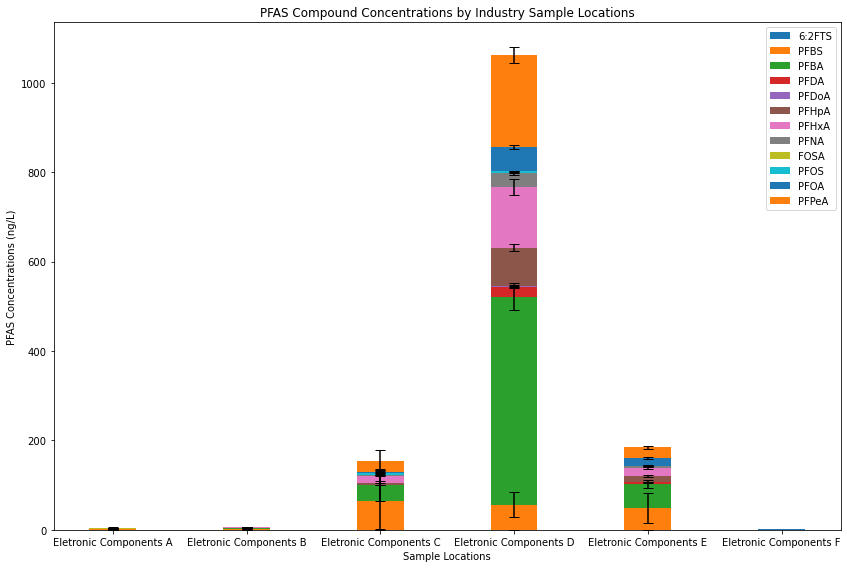

In [63]:
create_bar_chart(average_pivot, std_error_pivot, figsize=(12, 8), title='PFAS Compound Concentrations by Industry Sample Locations', xlabel='Sample Locations', ylabel='PFAS Concentrations (ng/L)')

### 16) PFAS Compound Concentrations at Manholes Comparison (Need to Reformat Bar Chart with multilevel x-axis labels)

#### 16.1) Functions

In [11]:
def create_multilevel_pivot_table(data_df, filter_type=None, filter_qual_summary=None, filter_sample_location=None, filter_dominant_contributor=None, start_date=None, end_date=None):
    """
    Create a multilevel pivot table with filters based on 'Type', 'Qual Summary (Grade for filtering)',
    'Sample Location', 'Dominant Contributor', and 'Sample Date' columns.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_dominant_contributor (list of str, optional): List of 'Dominant Contributor' values to filter the data (default is None).
        start_date (str, optional): Start date in 'YYYY-MM-DD' format (default is None).
        end_date (str, optional): End date in 'YYYY-MM-DD' format (default is None).

    Returns:
        pd.DataFrame: The multilevel pivot table with average values.
    """
    try:
        # Apply filters based on user-provided values
        filtered_data = data_df

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_dominant_contributor:
            filtered_data = filtered_data[filtered_data['Dominant Contributor'].isin(filter_dominant_contributor)]

        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create the pivot table with multilevel rows
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index=['Dominant Contributor', 'Sample Location', 'Sample Date'],
                                     columns='PFAS Compound', aggfunc='mean',fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



In [198]:
def create_stacked_bar_chart(pivot_table):
    """
    Create a stacked bar chart from a multilevel pivot table.

    Args:
        pivot_table (pd.DataFrame): The multilevel pivot table.

    Returns:
        None
    """
    try:
        pivot_table = pivot_table.dropna(axis=1, how='all').loc[:, (pivot_table != 0).any(axis=0)]
        # Reset the index to flatten the pivot table
        pivot_table.reset_index(inplace=True)

        # Reformat Sample Date to MM-DD-YY
        pivot_table['Sample Date'] = pivot_table['Sample Date'].dt.strftime('%m-%d-%y')
        pivot_table

        # Group the data by Dominant Contributor, Sample Location, and Sample Date
        grouped_data = pivot_table.groupby(['Dominant Contributor', 'Sample Location', 'Sample Date']).sum()

        # Create a stacked bar chart
        ax = grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
        
        # Customize the chart
        ax.set_title('Stacked Bar Chart')
        ax.set_xlabel('Dominant Contributor, Sample Location, Sample Date')
        ax.set_ylabel('Value')
        ax.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")




In [29]:
def create_stacked_bar_chart(pivot_table):
    """
    Create a stacked bar chart with a multi-level categorical x-axis.

    Args:
        pivot_table (pd.DataFrame): The multilevel pivot table.

    Returns:
        None
    """
    try:
        # Drop columns with all NaN values and keep columns with any non-zero values
        pivot_table = pivot_table.dropna(axis=1, how='all').loc[:, (pivot_table != 0).any(axis=0)]

        # Reset the index to flatten the pivot table
        pivot_table.reset_index(inplace=True)

        # Reformat Sample Date to MM-DD-YY
        pivot_table['Sample Date'] = pivot_table['Sample Date'].dt.strftime('%m-%d-%y')

        # Create a stacked bar chart with 'Sample Date' as the primary labels
        ax = pivot_table.plot(kind='bar', stacked=True, x='Sample Date', figsize=(15, 6))

        # Customize the chart
        ax.set_title('Stacked Bar Chart')
        ax.set_xlabel('')
        ax.set_ylabel('Value')
        ax.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Initialize lists to store unique labels and their positions
        sample_location_labels = []
        dominant_contributor_labels = []
        sample_location_positions = []
        dominant_contributor_positions = []

        # Iterate through the DataFrame to populate the lists
        for i, (idx, row) in enumerate(pivot_table.iterrows()):
            if row['Sample Location'] not in sample_location_labels:
                sample_location_labels.append(row['Sample Location'])
                sample_location_positions.append(i)
            if row['Dominant Contributor'] not in dominant_contributor_labels:
                dominant_contributor_labels.append(row['Dominant Contributor'])
                dominant_contributor_positions.append(i)

        # Set the primary x-tick labels (Sample Date)
        ax.set_xticklabels(pivot_table['Sample Date'].tolist(), rotation=45, ha='right')

        # Add custom annotations for Sample Location and Dominant Contributor
        for label, pos in zip(sample_location_labels, sample_location_positions):
            ax.text(pos, -0.2, label, ha='center', va='top', transform=ax.get_xaxis_transform(), fontsize=9)
        for label, pos in zip(dominant_contributor_labels, dominant_contributor_positions):
            ax.text(pos, -0.3, label, ha='center', va='top', transform=ax.get_xaxis_transform(), fontsize=9)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")



#### 16.2) Filters and Settings

In [12]:
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type=['Manhole']
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','']
#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location = ['MH#16331','MH#19788','MH#20615','MH#20723','MH#21070','MH#72360','MH#20788','MH#67882','MH#8402']
#filter_dominant_contributor (list of str, optional): List of 'Dominant Contributor' values to filter the data (default is None).
#filter_dominant_contributor = ['']
#start_date (str, optional): Start date in 'YYYY-MM-DD' format (default is None).
start_date= '2023-06-06'
#end_date (str, optional): End date in 'YYYY-MM-DD' format (default is None).
end_date = '2023-10-06'

#### 16.2) Create Multi-level Pivot Table 

In [44]:
pivot_table = create_multilevel_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_dominant_contributor=None, start_date=start_date, end_date=end_date)
# Rename the index of data_df using the mapping (No need to change)
pivot_table.columns = pivot_table.columns.map(pfas_mapping)
pivot_table

PFAS Compound                                              10:2FTS  \
Dominant Contributor          Sample Location Sample Date            
Commercial and NSU Industrial MH#16331        2023-06-07         0   
                                              2023-09-06         0   
                              MH#19788        2023-06-07         0   
                                              2023-09-06         0   
                              MH#20615        2023-06-07         0   
                                              2023-09-06         0   
                              MH#20723        2023-06-07         0   
                                              2023-09-06         0   
                              MH#21070        2023-06-07         0   
                                              2023-09-06         0   
                              MH#72360        2023-06-07         0   
                                              2023-09-06         0   
Domestic                      MH#20788        2023-06-07         0   
                                              2023-09-06         0   
                              MH#67882        2023-06-07         0   
                                              2023-09-06         0   
                              MH#8402         2023-06-07         0   
                                              2023-09-06         0   

PFAS Compound                                              11Cl-PF3OUdS  \
Dominant Contributor          Sample Location Sample Date                 
Commercial and NSU Industrial MH#16331        2023-06-07              0   
                                              2023-09-06              0   
                              MH#19788        2023-06-07              0   
                                              2023-09-06              0   
                              MH#20615        2023-06-07              0   
                                              2023-09-06              0   
                              MH#20723        2023-06-07              0   
                                              2023-09-06              0   
                              MH#21070        2023-06-07              0   
                                              2023-09-06              0   
                              MH#72360        2023-06-07              0   
                                              2023-09-06              0   
Domestic                      MH#20788        2023-06-07              0   
                                              2023-09-06              0   
                              MH#67882        2023-06-07              0   
                                              2023-09-06              0   
                              MH#8402         2023-06-07              0   
                                              2023-09-06              0   

PFAS Compound                                              4:2FTS  6:2FTS  \
Dominant Contributor          Sample Location Sample Date                   
Commercial and NSU Industrial MH#16331        2023-06-07        0     NaN   
                                              2023-09-06        0    0.00   
                              MH#19788        2023-06-07        0    9.20   
                                              2023-09-06        0    0.52   
                              MH#20615        2023-06-07        0    0.00   
                                              2023-09-06        0    0.00   
                              MH#20723        2023-06-07        0    7.70   
                                              2023-09-06        0     NaN   
                              MH#21070        2023-06-07        0    0.56   
                                              2023-09-06        0    0.00   
                              MH#72360        2023-06-07        0    0.57   
                                              2023-09-06        0    1.10   
Domestic            

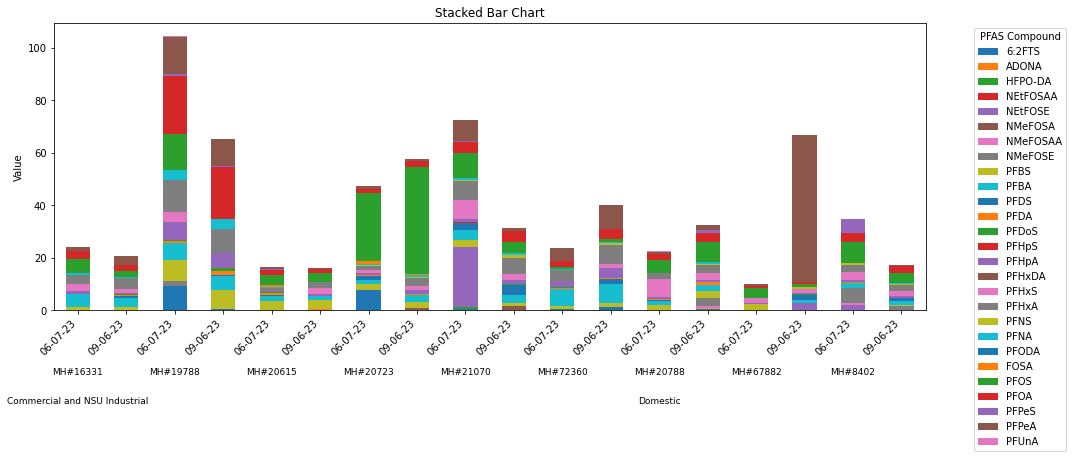

In [45]:
create_stacked_bar_chart(pivot_table)

### 17) Field Data Quant PFAS Compound Concentration (Need to work on formatting the bar chart with better labels)

#### 17.1) Functions

In [202]:
def create_pivot_table(data_df, filter_type=None, filter_qual_summary=None, field_filter=None, pfas_compound_filter=None, aggfunc='mean', region_prefix=None):
    """
    Create a pivot table from the given dataframe with user-defined filters and optional region prefix.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        filter_type (list, optional): Filter values for 'Type'.
        filter_qual_summary (list, optional): Filter values for 'Qual Summary (Grade for filtering)'.
        field_filter (list, optional): Filter values for 'Field'.
        pfas_compound_filter (list, optional): Filter values for 'PFAS Compound'.
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
        region_prefix (str, optional): Prefix to be added to the second level column names.

    Returns:
        pd.DataFrame: The resulting pivot table.
    """
    # Apply filters based on user-provided values
    filtered_data = data_df

    if filter_type:
        filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

    if filter_qual_summary:
        filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

    if field_filter:
        filtered_data = filtered_data[filtered_data['Field'].isin(field_filter)]

    if pfas_compound_filter:
        filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(pfas_compound_filter)]

    pivot_table = pd.pivot_table(
        filtered_data,
        values='All (w BDL= MDL/2) Incl Qual Flags',
        index='PFAS Compound',
        columns=['Type', 'Region', 'Depth'],
        aggfunc=aggfunc,
        fill_value=np.nan
    )

    # Add prefix to the second level column names if prefix is provided
    if region_prefix:
        pivot_table.columns = pd.MultiIndex.from_tuples(
            [(col[0], f'{region_prefix} {col[1]}' if col[0] != 'Type' and col[0] != 'Depth' else col[1], col[2]) for col in pivot_table.columns]
        )

    return pivot_table



In [182]:
def calculate_standard_error(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate the standard error pivot table, aligning structures if necessary.

    Args:
        average_pivot (pd.DataFrame): Pivot table of averages.
        std_dev_pivot (pd.DataFrame): Pivot table of standard deviations.
        count_pivot (pd.DataFrame): Pivot table of counts.

    Returns:
        pd.DataFrame: Pivot table of standard errors.
    """
    # Align the structure of the std_dev_pivot with average_pivot and count_pivot
    std_dev_pivot_aligned = std_dev_pivot.reindex_like(average_pivot).fillna(np.NaN)

    # Calculate the standard error
    standard_error_pivot = std_dev_pivot_aligned / np.sqrt(count_pivot)

    return standard_error_pivot



In [212]:
def combine_pivot_tables(pivot_table1, pivot_table2, prefix1=None, prefix2=None):
    """
    Combine two pivot tables side by side.

    Args:
        pivot_table1 (pd.DataFrame): First pivot table.
        pivot_table2 (pd.DataFrame): Second pivot table.
        prefix1 (str, optional): Prefix for the columns of the first pivot table.
        prefix2 (str, optional): Prefix for the columns of the second pivot table.

    Returns:
        pd.DataFrame: Combined pivot table.
    """
    # Add prefixes to the column names if provided
    if prefix1:
        pivot_table1 = pivot_table1.add_prefix(f"{prefix1} ")
    if prefix2:
        pivot_table2 = pivot_table2.add_prefix(f"{prefix2} ")

    # Combine the pivot tables side by side
    combined_pivot_table = pd.concat([pivot_table1, pivot_table2], axis=1)

    return combined_pivot_table


#### 17.2) Filters and Settings

In [145]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
filter_qual_summary = ['Good','Probably Ok','']
#field_filter (list): Filter values for 'Field'.
field_filter = ['nan', 'LINPMM21-31','SHRMMR07-HE','SHRJHD16-BD', 'LINPMM19-40', 'SHRBTG30-AX', 'SHRBTG30-DX','SHRMMR30-CX', 'SHRMMR31-AX']
#type_filter (list): Filter values for 'Type'.
filter_type= ['Biosolids','Soils']
#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter=['NEtFOSAA','NMeFOSAA','NMeFOSE','Perfluorodecanoic acid','Perfluorododecanoic acid','Perfluoroheptanoic acid','Perfluorohexanoic acid',
                      'Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)',
                      'Perfluoropentanoic acid','Perfluoroundecanoic acid']

#### 17.2) Create Pivot Table for Average PFAS Concentrations(All (w BDL= MDL/2) Incl Qual Flags)

In [209]:
average_pivot=create_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, field_filter=field_filter, pfas_compound_filter=pfas_compound_filter, aggfunc='mean')
average_pivot

Type                                         Soils                     \
Region                              Eastern Oregon                      
Depth                                       0-1 ft    1-2 ft  Surface   
PFAS Compound                                                           
NEtFOSAA                                  0.258125  0.105000  0.24750   
NMeFOSAA                                  0.118125  0.105000  0.46125   
NMeFOSE                                   0.270000  0.273750  0.28500   
Perfluorodecanoic acid                    0.355625  0.133750  1.13000   
Perfluorododecanoic acid                  0.145625  0.105000  0.41500   
Perfluoroheptanoic acid                   0.273125  0.185000  0.11375   
Perfluorohexanoic acid                    0.221250  0.326250  0.11375   
Perfluorononanoic acid                    0.249375  0.105000  0.64000   
Perfluorooctanesulfonamide                0.118750  0.105000  0.11375   
Perfluorooctanesulfonic acid (PFOS)       0.409375  0.156875  1.67250   
Perfluorooctanoic acid (PFOA)             0.945000  0.216875  0.84250   
Perfluoropentanoic acid                   0.488750  0.528750  0.11375   
Perfluoroundecanoic acid                  0.116875  0.105000  0.31250   

Type                                                                       
Region                              Willamette Valley                      
Depth                                          0-1 ft    1-2 ft   Surface  
PFAS Compound                                                              
NEtFOSAA                                     0.322222  0.117222  0.517500  
NMeFOSAA                                     0.116111  0.117222  0.156667  
NMeFOSE                                      0.291111  0.292222  0.268333  
Perfluorodecanoic acid                       0.265556  0.117222  0.685000  
Perfluorododecanoic acid                     0.116111  0.117222  0.234167  
Perfluoroheptanoic acid                      0.156111  0.188889  0.107500  
Perfluorohexanoic acid                       0.180000  0.157222  0.126667  
Perfluorononanoic acid                       0.229444  0.180000  0.273333  
Perfluorooctanesulfonamide                   0.176667  0.117222  0.107500  
Perfluorooctanesulfonic acid (PFOS)          3.960000  2.046111  4.883333  
Perfluorooctanoic acid (PFOA)                1.035556  1.131111  0.613333  
Perfluoropentanoic acid                      0.208889  0.146667  0.335833  
Perfluoroundecanoic acid                     0.132778  0.117222  0.230833

#### 17.3) Create Pivot Table for Standard Deviation of PFAS Concentrations (All (w BDL= MDL/2) Incl Qual Flags)

In [192]:
std_dev_pivot=create_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, field_filter=field_filter, pfas_compound_filter=pfas_compound_filter, aggfunc='std')
std_dev_pivot

Type                                         Soils                      \
Region                              Eastern Oregon                       
Depth                                       0-1 ft    1-2 ft   Surface   
PFAS Compound                                                            
NEtFOSAA                                  0.219560  0.005345  0.184459   
NMeFOSAA                                  0.037506  0.005345  0.405676   
NMeFOSE                                   0.010801  0.007500  0.012910   
Perfluorodecanoic acid                    0.287184  0.079451  0.968951   
Perfluorododecanoic acid                  0.074279  0.005345  0.318381   
Perfluoroheptanoic acid                   0.148563  0.130630  0.004787   
Perfluorohexanoic acid                    0.162321  0.155190  0.004787   
Perfluorononanoic acid                    0.161984  0.005345  0.432589   
Perfluorooctanesulfonamide                0.041382  0.005345  0.004787   
Perfluorooctanesulfonic acid (PFOS)       0.364157  0.095989  1.371164   
Perfluorooctanoic acid (PFOA)             0.682469  0.157320  0.572152   
Perfluoropentanoic acid                   0.425120  0.334555  0.004787   
Perfluoroundecanoic acid                  0.034010  0.005345  0.274029   

Type                                                                       
Region                              Willamette Valley                      
Depth                                          0-1 ft    1-2 ft   Surface  
PFAS Compound                                                              
NEtFOSAA                                     0.326555  0.006180  0.493678  
NMeFOSAA                                     0.005465  0.006180  0.069546  
NMeFOSE                                      0.012937  0.014167  0.024833  
Perfluorodecanoic acid                       0.149926  0.006180  0.263572  
Perfluorododecanoic acid                     0.005465  0.006180  0.147120  
Perfluoroheptanoic acid                      0.079285  0.145619  0.011292  
Perfluorohexanoic acid                       0.096242  0.084783  0.051737  
Perfluorononanoic acid                       0.137214  0.124875  0.137937  
Perfluorooctanesulfonamide                   0.092026  0.006180  0.011292  
Perfluorooctanesulfonic acid (PFOS)          3.345792  2.456153  1.321237  
Perfluorooctanoic acid (PFOA)                0.350218  1.321263  0.195516  
Perfluoropentanoic acid                      0.097429  0.087714  0.145891  
Perfluoroundecanoic acid                     0.047966  0.006180  0.113244

#### 17.4) Create Pivot Table for Count of PFAS Concentrations (All (w BDL= MDL/2) Incl Qual Flags)

In [193]:
count_pivot=create_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, field_filter=field_filter, pfas_compound_filter=pfas_compound_filter, aggfunc='count')
count_pivot

Type                                         Soils                 \
Region                              Eastern Oregon                  
Depth                                       0-1 ft 1-2 ft Surface   
PFAS Compound                                                       
NEtFOSAA                                         8      8       4   
NMeFOSAA                                         8      8       4   
NMeFOSE                                          4      4       4   
Perfluorodecanoic acid                           8      8       4   
Perfluorododecanoic acid                         8      8       4   
Perfluoroheptanoic acid                          8      8       4   
Perfluorohexanoic acid                           8      8       4   
Perfluorononanoic acid                           8      8       4   
Perfluorooctanesulfonamide                       8      8       4   
Perfluorooctanesulfonic acid (PFOS)              8      8       4   
Perfluorooctanoic acid (PFOA)                    8      8       4   
Perfluoropentanoic acid                          8      8       4   
Perfluoroundecanoic acid                         8      8       4   

Type                                                                  
Region                              Willamette Valley                 
Depth                                          0-1 ft 1-2 ft Surface  
PFAS Compound                                                         
NEtFOSAA                                            9      9       6  
NMeFOSAA                                            9      9       6  
NMeFOSE                                             9      9       6  
Perfluorodecanoic acid                              9      9       6  
Perfluorododecanoic acid                            9      9       6  
Perfluoroheptanoic acid                             9      9       6  
Perfluorohexanoic acid                              9      9       6  
Perfluorononanoic acid                              9      9       6  
Perfluorooctanesulfonamide                          9      9       6  
Perfluorooctanesulfonic acid (PFOS)                 9      9       6  
Perfluorooctanoic acid (PFOA)                       9      9       6  
Perfluoropentanoic acid                             9      9       6  
Perfluoroundecanoic acid                            9      9       6

#### 17.4) Create Pivot Table for Standard Error of PFAS Concentrations (All (w BDL= MDL/2) Incl Qual Flags)

In [194]:
error_pivot=calculate_standard_error(average_pivot, std_dev_pivot, count_pivot)
error_pivot

Type                                         Soils                      \
Region                              Eastern Oregon                       
Depth                                       0-1 ft    1-2 ft   Surface   
PFAS Compound                                                            
NEtFOSAA                                  0.077626  0.001890  0.092229   
NMeFOSAA                                  0.013260  0.001890  0.202838   
NMeFOSE                                   0.005401  0.003750  0.006455   
Perfluorodecanoic acid                    0.101535  0.028090  0.484476   
Perfluorododecanoic acid                  0.026262  0.001890  0.159191   
Perfluoroheptanoic acid                   0.052525  0.046185  0.002394   
Perfluorohexanoic acid                    0.057389  0.054868  0.002394   
Perfluorononanoic acid                    0.057270  0.001890  0.216295   
Perfluorooctanesulfonamide                0.014631  0.001890  0.002394   
Perfluorooctanesulfonic acid (PFOS)       0.128749  0.033937  0.685582   
Perfluorooctanoic acid (PFOA)             0.241289  0.055621  0.286076   
Perfluoropentanoic acid                   0.150303  0.118283  0.002394   
Perfluoroundecanoic acid                  0.012024  0.001890  0.137014   

Type                                                                       
Region                              Willamette Valley                      
Depth                                          0-1 ft    1-2 ft   Surface  
PFAS Compound                                                              
NEtFOSAA                                     0.108852  0.002060  0.201543  
NMeFOSAA                                     0.001822  0.002060  0.028392  
NMeFOSE                                      0.004312  0.004722  0.010138  
Perfluorodecanoic acid                       0.049975  0.002060  0.107603  
Perfluorododecanoic acid                     0.001822  0.002060  0.060061  
Perfluoroheptanoic acid                      0.026428  0.048540  0.004610  
Perfluorohexanoic acid                       0.032081  0.028261  0.021121  
Perfluorononanoic acid                       0.045738  0.041625  0.056313  
Perfluorooctanesulfonamide                   0.030675  0.002060  0.004610  
Perfluorooctanesulfonic acid (PFOS)          1.115264  0.818718  0.539393  
Perfluorooctanoic acid (PFOA)                0.116739  0.440421  0.079819  
Perfluoropentanoic acid                      0.032476  0.029238  0.059560  
Perfluoroundecanoic acid                     0.015989  0.002060  0.046232

#### 17.5) Create Pivot Tables for Control Site for Average PFAS Concentrations(All (w BDL= MDL/2) Incl Qual Flags)

In [203]:
control_avg_pivot=create_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, field_filter=['Control'], pfas_compound_filter=pfas_compound_filter, aggfunc='mean',region_prefix='Control')
control_avg_pivot


Soils                 \
                                    Control Eastern Oregon                  
                                                    0-1 ft 1-2 ft Surface   
PFAS Compound                                                               
NEtFOSAA                                             0.115   0.11  0.1125   
NMeFOSAA                                             0.115   0.11  0.1125   
NMeFOSE                                              0.285   0.27  0.2775   
Perfluorodecanoic acid                               0.115   0.11  0.1125   
Perfluorododecanoic acid                             0.115   0.11  0.1125   
Perfluoroheptanoic acid                              0.115   0.11  0.1125   
Perfluorohexanoic acid                               0.115   0.11  0.1125   
Perfluorononanoic acid                               0.115   0.11  0.1125   
Perfluorooctanesulfonamide                           0.115   0.11  0.1125   
Perfluorooctanesulfonic acid (PFOS)                  0.115   0.11  0.1125   
Perfluorooctanoic acid (PFOA)                        0.115   0.11  0.1125   
Perfluoropentanoic acid                              0.115   0.11  0.1125   
Perfluoroundecanoic acid                             0.115   0.11  0.1125   

                                                                              
                                    Control Willamette Valley                 
                                                       0-1 ft 1-2 ft Surface  
PFAS Compound                                                                 
NEtFOSAA                                                 0.12  0.115  0.1050  
NMeFOSAA                                                 0.12  0.115  0.1050  
NMeFOSE                                                  0.30  0.290  0.2625  
Perfluorodecanoic acid                                   0.12  0.115  0.1775  
Perfluorododecanoic acid                                 0.12  0.115  0.1050  
Perfluoroheptanoic acid                                  0.12  0.115  0.1050  
Perfluorohexanoic acid                                   0.12  0.115  0.1050  
Perfluorononanoic acid                                   0.12  0.115  0.1575  
Perfluorooctanesulfonamide                               0.12  0.115  0.1050  
Perfluorooctanesulfonic acid (PFOS)                      0.54  0.115  0.6850  
Perfluorooctanoic acid (PFOA)                            0.12  0.115  0.3725  
Perfluoropentanoic acid                                  0.12  0.115  0.1050  
Perfluoroundecanoic acid                                 0.12  0.115  0.1050

#### 17.6) Create Pivot Tables for Control Site Standard Deviation of PFAS Concentrations (All (w BDL= MDL/2) Incl Qual Flags)

In [204]:
control_std_pivot=create_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, field_filter=['Control'], pfas_compound_filter=pfas_compound_filter, aggfunc='std',region_prefix='Control')
control_std_pivot

Soils            \
                                    Control Eastern Oregon             
                                                    0-1 ft    1-2 ft   
PFAS Compound                                                          
NEtFOSAA                                                 0  0.007071   
NMeFOSAA                                                 0  0.007071   
NMeFOSE                                                  0  0.014142   
Perfluorodecanoic acid                                   0  0.007071   
Perfluorododecanoic acid                                 0  0.007071   
Perfluoroheptanoic acid                                  0  0.007071   
Perfluorohexanoic acid                                   0  0.007071   
Perfluorononanoic acid                                   0  0.007071   
Perfluorooctanesulfonamide                               0  0.007071   
Perfluorooctanesulfonic acid (PFOS)                      0  0.007071   
Perfluorooctanoic acid (PFOA)                            0  0.007071   
Perfluoropentanoic acid                                  0  0.007071   
Perfluoroundecanoic acid                                 0  0.007071   

                                                                         
                                              Control Willamette Valley  
                                      Surface                   Surface  
PFAS Compound                                                            
NEtFOSAA                             0.003536                  0.000000  
NMeFOSAA                             0.003536                  0.000000  
NMeFOSE                              0.010607                  0.003536  
Perfluorodecanoic acid               0.003536                  0.102530  
Perfluorododecanoic acid             0.003536                  0.000000  
Perfluoroheptanoic acid              0.003536                  0.000000  
Perfluorohexanoic acid               0.003536                  0.000000  
Perfluorononanoic acid               0.003536                  0.074246  
Perfluorooctanesulfonamide           0.003536                  0.000000  
Perfluorooctanesulfonic acid (PFOS)  0.003536                  0.586899  
Perfluorooctanoic acid (PFOA)        0.003536                  0.378302  
Perfluoropentanoic acid              0.003536                  0.000000  
Perfluoroundecanoic acid             0.003536                  0.000000

#### 17.7) Create Pivot Tables for Control Site for Count of PFAS Concentrations (All (w BDL= MDL/2) Incl Qual Flags)

In [205]:
control_count_pivot=create_pivot_table(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, field_filter=['Control'], pfas_compound_filter=pfas_compound_filter, aggfunc='count',region_prefix='Control')
control_count_pivot

Soils                 \
                                    Control Eastern Oregon                  
                                                    0-1 ft 1-2 ft Surface   
PFAS Compound                                                               
NEtFOSAA                                                 2      2       2   
NMeFOSAA                                                 2      2       2   
NMeFOSE                                                  2      2       2   
Perfluorodecanoic acid                                   2      2       2   
Perfluorododecanoic acid                                 2      2       2   
Perfluoroheptanoic acid                                  2      2       2   
Perfluorohexanoic acid                                   2      2       2   
Perfluorononanoic acid                                   2      2       2   
Perfluorooctanesulfonamide                               2      2       2   
Perfluorooctanesulfonic acid (PFOS)                      2      2       2   
Perfluorooctanoic acid (PFOA)                            2      2       2   
Perfluoropentanoic acid                                  2      2       2   
Perfluoroundecanoic acid                                 2      2       2   

                                                                              
                                    Control Willamette Valley                 
                                                       0-1 ft 1-2 ft Surface  
PFAS Compound                                                                 
NEtFOSAA                                                    1      1       2  
NMeFOSAA                                                    1      1       2  
NMeFOSE                                                     1      1       2  
Perfluorodecanoic acid                                      1      1       2  
Perfluorododecanoic acid                                    1      1       2  
Perfluoroheptanoic acid                                     1      1       2  
Perfluorohexanoic acid                                      1      1       2  
Perfluorononanoic acid                                      1      1       2  
Perfluorooctanesulfonamide                                  1      1       2  
Perfluorooctanesulfonic acid (PFOS)                         1      1       2  
Perfluorooctanoic acid (PFOA)                               1      1       2  
Perfluoropentanoic acid                                     1      1       2  
Perfluoroundecanoic acid                                    1      1       2

#### 17.8 Create Pivot Table for Standard Error of PFAS Concentrations (All (w BDL= MDL/2) Incl Qual Flags)

In [206]:
control_error_pivot=calculate_standard_error(control_avg_pivot, control_std_pivot, control_count_pivot)
control_error_pivot

Soils                 \
                                    Control Eastern Oregon                  
                                                    0-1 ft 1-2 ft Surface   
PFAS Compound                                                               
NEtFOSAA                                               0.0  0.005  0.0025   
NMeFOSAA                                               0.0  0.005  0.0025   
NMeFOSE                                                0.0  0.010  0.0075   
Perfluorodecanoic acid                                 0.0  0.005  0.0025   
Perfluorododecanoic acid                               0.0  0.005  0.0025   
Perfluoroheptanoic acid                                0.0  0.005  0.0025   
Perfluorohexanoic acid                                 0.0  0.005  0.0025   
Perfluorononanoic acid                                 0.0  0.005  0.0025   
Perfluorooctanesulfonamide                             0.0  0.005  0.0025   
Perfluorooctanesulfonic acid (PFOS)                    0.0  0.005  0.0025   
Perfluorooctanoic acid (PFOA)                          0.0  0.005  0.0025   
Perfluoropentanoic acid                                0.0  0.005  0.0025   
Perfluoroundecanoic acid                               0.0  0.005  0.0025   

                                                                              
                                    Control Willamette Valley                 
                                                       0-1 ft 1-2 ft Surface  
PFAS Compound                                                                 
NEtFOSAA                                                  NaN    NaN  0.0000  
NMeFOSAA                                                  NaN    NaN  0.0000  
NMeFOSE                                                   NaN    NaN  0.0025  
Perfluorodecanoic acid                                    NaN    NaN  0.0725  
Perfluorododecanoic acid                                  NaN    NaN  0.0000  
Perfluoroheptanoic acid                                   NaN    NaN  0.0000  
Perfluorohexanoic acid                                    NaN    NaN  0.0000  
Perfluorononanoic acid                                    NaN    NaN  0.0525  
Perfluorooctanesulfonamide                                NaN    NaN  0.0000  
Perfluorooctanesulfonic acid (PFOS)                       NaN    NaN  0.4150  
Perfluorooctanoic acid (PFOA)                             NaN    NaN  0.2675  
Perfluoropentanoic acid                                   NaN    NaN  0.0000  
Perfluoroundecanoic acid                                  NaN    NaN  0.0000

#### 17.9) Combine Pivot Tables for Comparision with Control Site

In [214]:
avg_all_pivot=combine_pivot_tables(pivot_table1=average_pivot, pivot_table2=control_avg_pivot, prefix1=None, prefix2=None)
avg_all_pivot

Type                                         Soils                     \
Region                              Eastern Oregon                      
Depth                                       0-1 ft    1-2 ft  Surface   
PFAS Compound                                                           
NEtFOSAA                                  0.258125  0.105000  0.24750   
NMeFOSAA                                  0.118125  0.105000  0.46125   
NMeFOSE                                   0.270000  0.273750  0.28500   
Perfluorodecanoic acid                    0.355625  0.133750  1.13000   
Perfluorododecanoic acid                  0.145625  0.105000  0.41500   
Perfluoroheptanoic acid                   0.273125  0.185000  0.11375   
Perfluorohexanoic acid                    0.221250  0.326250  0.11375   
Perfluorononanoic acid                    0.249375  0.105000  0.64000   
Perfluorooctanesulfonamide                0.118750  0.105000  0.11375   
Perfluorooctanesulfonic acid (PFOS)       0.409375  0.156875  1.67250   
Perfluorooctanoic acid (PFOA)             0.945000  0.216875  0.84250   
Perfluoropentanoic acid                   0.488750  0.528750  0.11375   
Perfluoroundecanoic acid                  0.116875  0.105000  0.31250   

Type                                                                       \
Region                              Willamette Valley                       
Depth                                          0-1 ft    1-2 ft   Surface   
PFAS Compound                                                               
NEtFOSAA                                     0.322222  0.117222  0.517500   
NMeFOSAA                                     0.116111  0.117222  0.156667   
NMeFOSE                                      0.291111  0.292222  0.268333   
Perfluorodecanoic acid                       0.265556  0.117222  0.685000   
Perfluorododecanoic acid                     0.116111  0.117222  0.234167   
Perfluoroheptanoic acid                      0.156111  0.188889  0.107500   
Perfluorohexanoic acid                       0.180000  0.157222  0.126667   
Perfluorononanoic acid                       0.229444  0.180000  0.273333   
Perfluorooctanesulfonamide                   0.176667  0.117222  0.107500   
Perfluorooctanesulfonic acid (PFOS)          3.960000  2.046111  4.883333   
Perfluorooctanoic acid (PFOA)                1.035556  1.131111  0.613333   
Perfluoropentanoic acid                      0.208889  0.146667  0.335833   
Perfluoroundecanoic acid                     0.132778  0.117222  0.230833   

Type                                                                       \
Region                              Control Eastern Oregon                  
Depth                                               0-1 ft 1-2 ft Surface   
PFAS Compound                                                               
NEtFOSAA                                             0.115   0.11  0.1125   
NMeFOSAA                                             0.115   0.11  0.1125   
NMeFOSE                                              0.285   0.27  0.2775   
Perfluorodecanoic acid                               0.115   0.11  0.1125   
Perfluorododecanoic acid                             0.115   0.11  0.1125   
Perfluoroheptanoic acid                              0.115   0.11  0.1125   
Perfluorohexanoic acid                               0.115   0.11  0.1125   
Perfluorononanoic acid                               0.115   0.11  0.1125   
Perfluorooctanesulfonamide                           0.115   0.11  0.1125   
Perfluorooctanesulfonic acid (PFOS)                  0.115   0.11  0.1125   
Perfluorooctanoic acid (PFOA)                        0.115   0.11  0.1125   
Perfluoropentanoic acid                              0.115   0.11  0.1125   
Perfluoroundecanoic acid                             0.115   0.11  0.1125   

Type                                                                          
Region                              Control Willamette Vall

In [215]:
error_all_pivot=combine_pivot_tables(pivot_table1=error_pivot, pivot_table2=control_error_pivot, prefix1=None, prefix2=None)
error_all_pivot

Type                                         Soils                      \
Region                              Eastern Oregon                       
Depth                                       0-1 ft    1-2 ft   Surface   
PFAS Compound                                                            
NEtFOSAA                                  0.077626  0.001890  0.092229   
NMeFOSAA                                  0.013260  0.001890  0.202838   
NMeFOSE                                   0.005401  0.003750  0.006455   
Perfluorodecanoic acid                    0.101535  0.028090  0.484476   
Perfluorododecanoic acid                  0.026262  0.001890  0.159191   
Perfluoroheptanoic acid                   0.052525  0.046185  0.002394   
Perfluorohexanoic acid                    0.057389  0.054868  0.002394   
Perfluorononanoic acid                    0.057270  0.001890  0.216295   
Perfluorooctanesulfonamide                0.014631  0.001890  0.002394   
Perfluorooctanesulfonic acid (PFOS)       0.128749  0.033937  0.685582   
Perfluorooctanoic acid (PFOA)             0.241289  0.055621  0.286076   
Perfluoropentanoic acid                   0.150303  0.118283  0.002394   
Perfluoroundecanoic acid                  0.012024  0.001890  0.137014   

Type                                                                       \
Region                              Willamette Valley                       
Depth                                          0-1 ft    1-2 ft   Surface   
PFAS Compound                                                               
NEtFOSAA                                     0.108852  0.002060  0.201543   
NMeFOSAA                                     0.001822  0.002060  0.028392   
NMeFOSE                                      0.004312  0.004722  0.010138   
Perfluorodecanoic acid                       0.049975  0.002060  0.107603   
Perfluorododecanoic acid                     0.001822  0.002060  0.060061   
Perfluoroheptanoic acid                      0.026428  0.048540  0.004610   
Perfluorohexanoic acid                       0.032081  0.028261  0.021121   
Perfluorononanoic acid                       0.045738  0.041625  0.056313   
Perfluorooctanesulfonamide                   0.030675  0.002060  0.004610   
Perfluorooctanesulfonic acid (PFOS)          1.115264  0.818718  0.539393   
Perfluorooctanoic acid (PFOA)                0.116739  0.440421  0.079819   
Perfluoropentanoic acid                      0.032476  0.029238  0.059560   
Perfluoroundecanoic acid                     0.015989  0.002060  0.046232   

Type                                                                       \
Region                              Control Eastern Oregon                  
Depth                                               0-1 ft 1-2 ft Surface   
PFAS Compound                                                               
NEtFOSAA                                               0.0  0.005  0.0025   
NMeFOSAA                                               0.0  0.005  0.0025   
NMeFOSE                                                0.0  0.010  0.0075   
Perfluorodecanoic acid                                 0.0  0.005  0.0025   
Perfluorododecanoic acid                               0.0  0.005  0.0025   
Perfluoroheptanoic acid                                0.0  0.005  0.0025   
Perfluorohexanoic acid                                 0.0  0.005  0.0025   
Perfluorononanoic acid                                 0.0  0.005  0.0025   
Perfluorooctanesulfonamide                             0.0  0.005  0.0025   
Perfluorooctanesulfonic acid (PFOS)                    0.0  0.005  0.0025   
Perfluorooctanoic acid (PFOA)                          0.0  0.005  0.0025   
Perfluoropentanoic acid                                0.0  0.005  0.0025   
Perfluoroundecanoic acid                               0.0  0.005  0.0025   

Type                                                                          
Region                              Contro

#### 17.10) Create Bar Chart

In [229]:
def create_annotated_bar_chart_from_pivot(pivot_table, x_label, y_label, plot_size=(12, 6)):
    """
    Create an annotated bar chart from a combined pivot table with groups based on multi-level rows.

    Args:
        pivot_table (pd.DataFrame): The combined pivot table.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        plot_size (tuple): Size of the plot (width, height).

    Returns:
        None
    """
    # Transpose the pivot table to get categories on the x-axis
    transposed_pivot_table = pivot_table.transpose()

    # Create the bar chart
    ax = transposed_pivot_table.plot(kind='bar', stacked=False, figsize=plot_size)

    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title('Bar Chart')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Check if the index is a MultiIndex and annotate accordingly
    if isinstance(transposed_pivot_table.index, pd.MultiIndex):
        for level in range(len(transposed_pivot_table.index.levels)):
            level_values = transposed_pivot_table.index.levels[level]
            for i, value in enumerate(level_values):
                # Calculate position for annotation
                pos = i - 0.2 * (len(level_values) - level)
                ax.text(pos, -0.05 * (level + 1), value, ha='center', va='center', transform=ax.get_xaxis_transform(), fontsize=9)
    else:
        # If not a MultiIndex, just annotate with index values
        for i, value in enumerate(transposed_pivot_table.index):
            ax.text(i, -0.05, value, ha='center', va='center', transform=ax.get_xaxis_transform(), fontsize=9)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


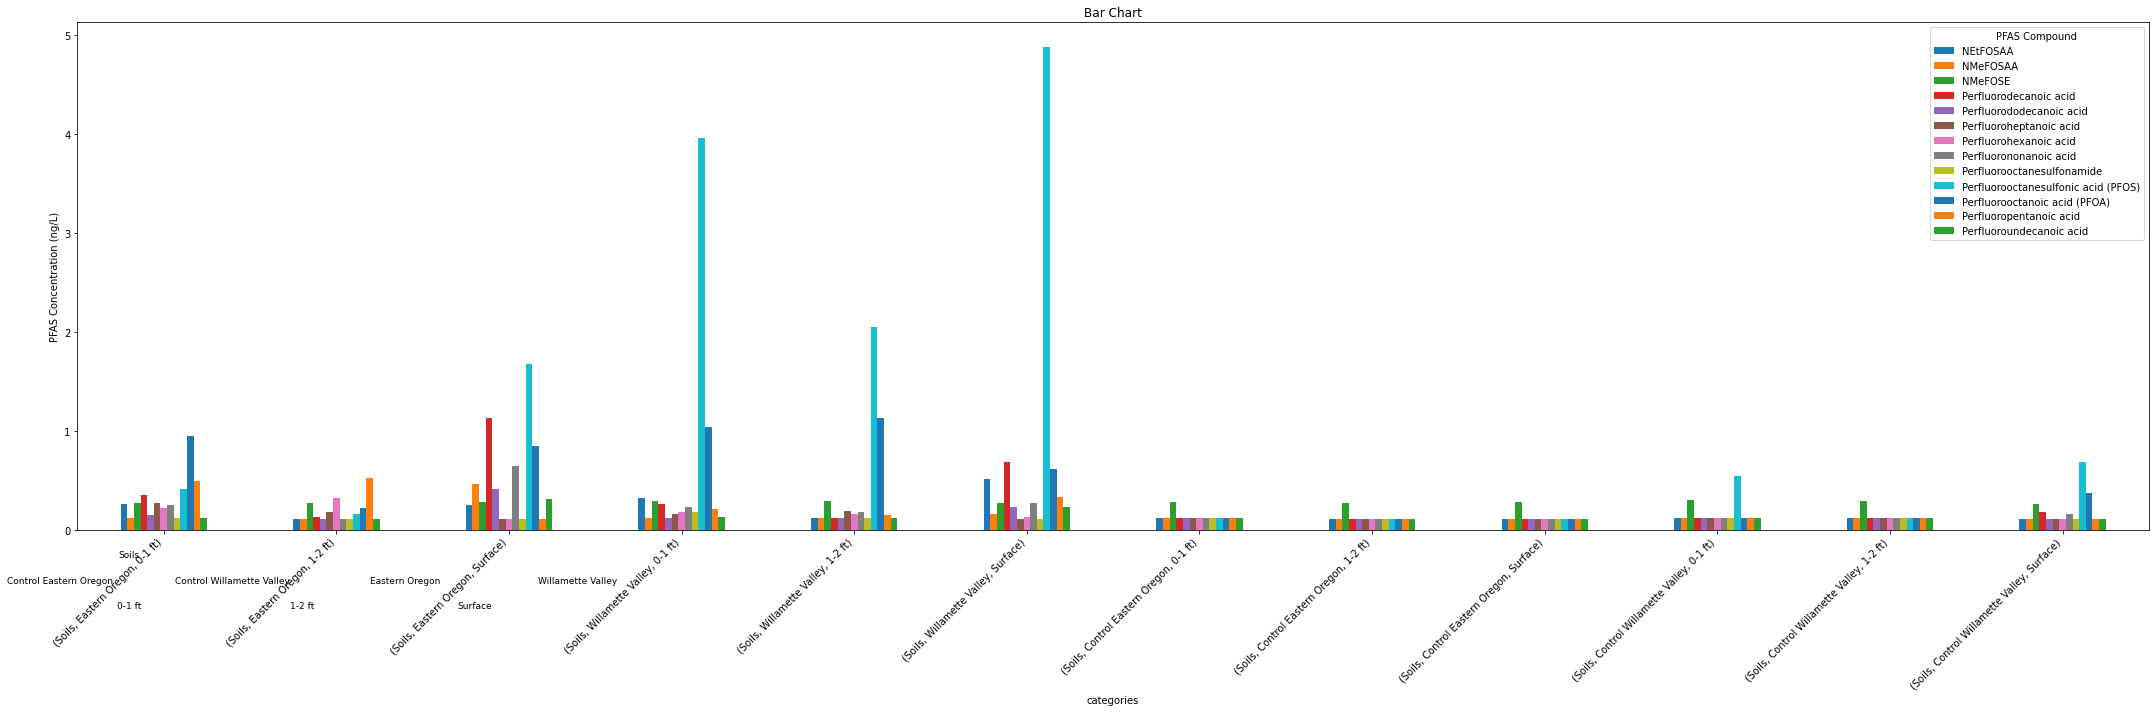

In [230]:
create_annotated_bar_chart_from_pivot(avg_all_pivot, x_label='categories', y_label='PFAS Concentration (ng/L)', plot_size=(30, 10))

In [224]:
avg_all_pivot.transpose()

PFAS Compound                            NEtFOSAA  NMeFOSAA   NMeFOSE  \
Type  Region                    Depth                                   
Soils Eastern Oregon            0-1 ft   0.258125  0.118125  0.270000   
                                1-2 ft   0.105000  0.105000  0.273750   
                                Surface  0.247500  0.461250  0.285000   
      Willamette Valley         0-1 ft   0.322222  0.116111  0.291111   
                                1-2 ft   0.117222  0.117222  0.292222   
                                Surface  0.517500  0.156667  0.268333   
      Control Eastern Oregon    0-1 ft   0.115000  0.115000  0.285000   
                                1-2 ft   0.110000  0.110000  0.270000   
                                Surface  0.112500  0.112500  0.277500   
      Control Willamette Valley 0-1 ft   0.120000  0.120000  0.300000   
                                1-2 ft   0.115000  0.115000  0.290000   
                                Surface  0.105000  0.105000  0.262500   

PFAS Compound                            Perfluorodecanoic acid  \
Type  Region                    Depth                             
Soils Eastern Oregon            0-1 ft                 0.355625   
                                1-2 ft                 0.133750   
                                Surface                1.130000   
      Willamette Valley         0-1 ft                 0.265556   
                                1-2 ft                 0.117222   
                                Surface                0.685000   
      Control Eastern Oregon    0-1 ft                 0.115000   
                                1-2 ft                 0.110000   
                                Surface                0.112500   
      Control Willamette Valley 0-1 ft                 0.120000   
                                1-2 ft                 0.115000   
                                Surface                0.177500   

PFAS Compound                            Perfluorododecanoic acid  \
Type  Region                    Depth                               
Soils Eastern Oregon            0-1 ft                   0.145625   
                                1-2 ft                   0.105000   
                                Surface                  0.415000   
      Willamette Valley         0-1 ft                   0.116111   
                                1-2 ft                   0.117222   
                                Surface                  0.234167   
      Control Eastern Oregon    0-1 ft                   0.115000   
                                1-2 ft                   0.110000   
                                Surface                  0.112500   
      Control Willamette Valley 0-1 ft                   0.120000   
                                1-2 ft                   0.115000   
                                Surface                  0.105000   

PFAS Compound                            Perfluoroheptanoic acid  \
Type  Region                    Depth                              
Soils Eastern Oregon            0-1 ft                  0.273125   
                                1-2 ft                  0.185000   
                                Surface                 0.113750   
      Willamette Valley         0-1 ft                  0.156111   
                                1-2 ft                  0.188889   
                                Surface                 0.107500   
      Control Eastern Oregon    0-1 ft                  0.115000   
                                1-2 ft                  0.110000   
                                Surface                 0.112500   
      Control Willamette Valley 0-1 ft                  0.120000   
                                1-2 ft                  0.115000   
                                Surface                 0.105000   

PFAS Compound                            Perfluorohexanoic acid  \
Type  Region                    Depth              

### 18) Ambient MB and Downstream BDL

#### 18.1) Functions

In [11]:
def create_filtered_pivot_table(data_df, qual_summary_filter, start_date, end_date, type_filter, pfas_compound_filter, sample_location_filter):
    """
    Create a pivot table from the given dataframe with specified filters and date range.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
        start_date (str): Start date for filtering 'Sample Date'.
        end_date (str): End date for filtering 'Sample Date'.
        type_filter (list): Filter values for 'Type'.
        pfas_compound_filter (list): Filter values for 'PFAS Compound'.
        sample_location_filter (list): Filter values for 'Sample Location'.

    Returns:
        pd.DataFrame: The resulting pivot table.
    """
    # Convert 'Sample Date' to datetime
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])

    # Apply filters based on user-provided values
    filtered_data = data_df[
        data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter) &
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
        (data_df['Sample Date'] <= pd.to_datetime(end_date)) &
        data_df['Type'].isin(type_filter) &
        data_df['PFAS Compound'].isin(pfas_compound_filter) &
        data_df['Sample Location'].isin(sample_location_filter)
    ]

    # Create the pivot table
    pivot_table = pd.pivot_table(
        filtered_data,
        values='All (w BDL= MDL/2) Incl Qual Flags',
        index='PFAS Compound',
        columns=['Type', 'Sample Location'],
        aggfunc='mean'
    )

    return pivot_table


In [12]:
def create_bar_chart_from_pivot(pivot_table, title, x_label, y_label, plot_size=(12, 6)):
    """
    Create a bar chart from a pivot table with PFAS Compound concentrations at different Sample Locations.

    Args:
        pivot_table (pd.DataFrame): The pivot table generated by create_filtered_pivot_table function.
        title (str): Title of the plot.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        plot_size (tuple): Size of the plot (width, height).

    Returns:
        None
    """
    # Plotting the bar chart
    ax = pivot_table.plot(kind='bar', figsize=plot_size, width=.8)

    # Setting the labels and title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Adjust layout and display the plot
    plt.legend(title='Sample Locations', loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=4)
    plt.tight_layout()
    plt.show()


In [43]:
def create_stacked_bar_chart(data_df, title, x_label, y_label, plot_size=(12, 6)):
    """
    Create a stacked bar chart from a dataframe. Each row represents a 'Sample Location'
    and columns represent 'PFAS Compound'. Stacks in each bar represent the values of different PFAS Compounds.

    Args:
        data_df (pd.DataFrame): The input dataframe with Sample Locations as rows and PFAS Compounds as columns.
        title (str): Title of the plot.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        plot_size (tuple): Size of the plot (width, height).

    Returns:
        None
    """
    # Plotting the stacked bar chart
    ax = data_df.plot(kind='bar', stacked=True, figsize=plot_size)

    # Setting the labels and title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Adjust layout and display the plot
    plt.legend(title='PFAS Compounds', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)
    plt.tight_layout()
    plt.show()

#### 18.2) Filters and Settings

In [17]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
qual_summary_filter=filter_qual_summary = ['Good','Probably Ok','']
#start_date (str): Start date for filtering 'Sample Date'.
start_date='2023-04-06'
#end_date (str): End date for filtering 'Sample Date'.
end_date='2023-06-07'
#type_filter (list): Filter values for 'Type'.
type_filter=['Ambient', 'Effluent']
#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter=Main_Assay
#sample_location_filter (list): Filter values for 'Sample Location'.
sample_location_filter =['Chicken @ Sholls-Sherwood','Dairy @ Hwy 8','Fanno at Durham Rd','Gales @ Stringtown','McKay @ Padgett','Rock @ Brookwood',
'Scoggins Below Hagg','TR @ Boones Ferry','TR @ Cherry Grove','TR @ Farmington','TR @ Fernhill','TR @ Golf Course','TR @ Jurgens','TR @ Rood Br',
'Durham Effluent','Forest Grove Effluent','Hillsboro Effluent','Rock Creek Effluent']

#### 18.3) Pivot Table for Average of All (w BDL= MDL/2) Incl Qual Flags of PFAS Compounds at Sample Locations

In [18]:
pivot_table=create_filtered_pivot_table(data_df, qual_summary_filter, start_date, end_date, type_filter, pfas_compound_filter, sample_location_filter)

# Rename the index of data_df using the mapping (No need to change)
pivot_table.index = pivot_table.index.map(pfas_mapping)

pivot_table

Type                              Ambient                                   \
Sample Location Chicken @ Sholls-Sherwood Dairy @ Hwy 8 Fanno at Durham Rd   
PFAS Compound                                                                
PFBS                                0.950         0.130               5.60   
PFBA                                0.470         0.435               4.10   
PFHpA                               0.470         0.290               2.90   
PFHxS                               0.600         0.240               5.00   
PFHxA                               1.200         0.590               5.90   
PFNA                                0.095         0.085               1.10   
PFOS                                1.600         0.990              14.00   
PFOA                                1.200         0.880               7.30   
PFPeA                               1.500         0.680               6.20   
PFTrDA                              0.185         0.175               0.18   

Type                                                                 \
Sample Location Gales @ Stringtown McKay @ Padgett Rock @ Brookwood   
PFAS Compound                                                         
PFBS                         0.140            0.56            4.900   
PFBA                         0.470            2.10            4.400   
PFHpA                        0.140            1.00            2.100   
PFHxS                        0.095            0.44            3.300   
PFHxA                          NaN            1.80            5.000   
PFNA                         0.095            0.38            0.940   
PFOS                         0.235            1.50            9.700   
PFOA                         0.340            2.10            5.000   
PFPeA                        0.140            2.00            5.900   
PFTrDA                       0.190            0.20            0.185   

Type                                                                     \
Sample Location Scoggins Below Hagg TR @ Boones Ferry TR @ Cherry Grove   
PFAS Compound                                                             
PFBS                          0.140             2.700              0.15   
PFBA                          0.470             4.700              0.50   
PFHpA                         0.140             1.200              0.15   
PFHxS                         0.095             1.000              0.10   
PFHxA                         0.095             3.500              0.25   
PFNA                          0.095             0.300              0.10   
PFOS                          0.235             2.700              0.25   
PFOA                          0.140             2.400              0.15   
PFPeA                         0.140             3.400              0.15   
PFTrDA                        0.190             0.185              0.20   

Type                                                                         \
Sample Location TR @ Farmington TR @ Fernhill TR @ Golf Course TR @ Jurgens   
PFAS Compound                                                                 
PFBS                      2.000         0.140            0.140        1.700   
PFBA                      4.500         0.470            0.470        4.900   
PFHpA                     1.100         0.140            0.140        0.980   
PFHxS                     0.760         0.095            0.095        0.970   
PFHxA                     2.800         0.220            0.230        3.000   
PFNA                      0.260         0.095            0.095        0.350   
PFOS                      2.100         0.235            0.235        2.200   
PFOA                      1.700         0.340            0.350        2.000   
PFPeA                     2.600         0.140            0.140        3.300   
PFTrDA                    0.185         0.185            0.190        0.185   

Type                                Effluent             

In [19]:
#Removing the Type multi-column level
pivot_table.transpose().reset_index(level=0, drop=True)

PFAS Compound,PFBS,PFBA,PFHpA,PFHxS,PFHxA,PFNA,PFOS,PFOA,PFPeA,PFTrDA
Sample Location,,,,,,,,,,
Chicken @ Sholls-Sherwood,0.95,0.470,0.47,0.600,1.200,0.095,1.600,1.20,1.50,0.185
Dairy @ Hwy 8,0.13,0.435,0.29,0.240,0.590,0.085,0.990,0.88,0.68,0.175
Fanno at Durham Rd,5.60,4.100,2.90,5.000,5.900,1.100,14.000,7.30,6.20,0.180
Gales @ Stringtown,0.14,0.470,0.14,0.095,NaN,0.095,0.235,0.34,0.14,0.190
McKay @ Padgett,0.56,2.100,1.00,0.440,1.800,0.380,1.500,2.10,2.00,0.200
Rock @ Brookwood,4.90,4.400,2.10,3.300,5.000,0.940,9.700,5.00,5.90,0.185
Scoggins Below Hagg,0.14,0.470,0.14,0.095,0.095,0.095,0.235,0.14,0.14,0.190
TR @ Boones Ferry,2.70,4.700,1.20,1.000,3.500,0.300,2.700,2.40,3.40,0.185
TR @ Cherry Grove,0.15,0.500,0.15,0.100,0.250,0.100,0.250,0.15,0.15,0.200


#### 18.4) Create Bar Chart for Comparing PFAS Compound Concentrations at Different Sites

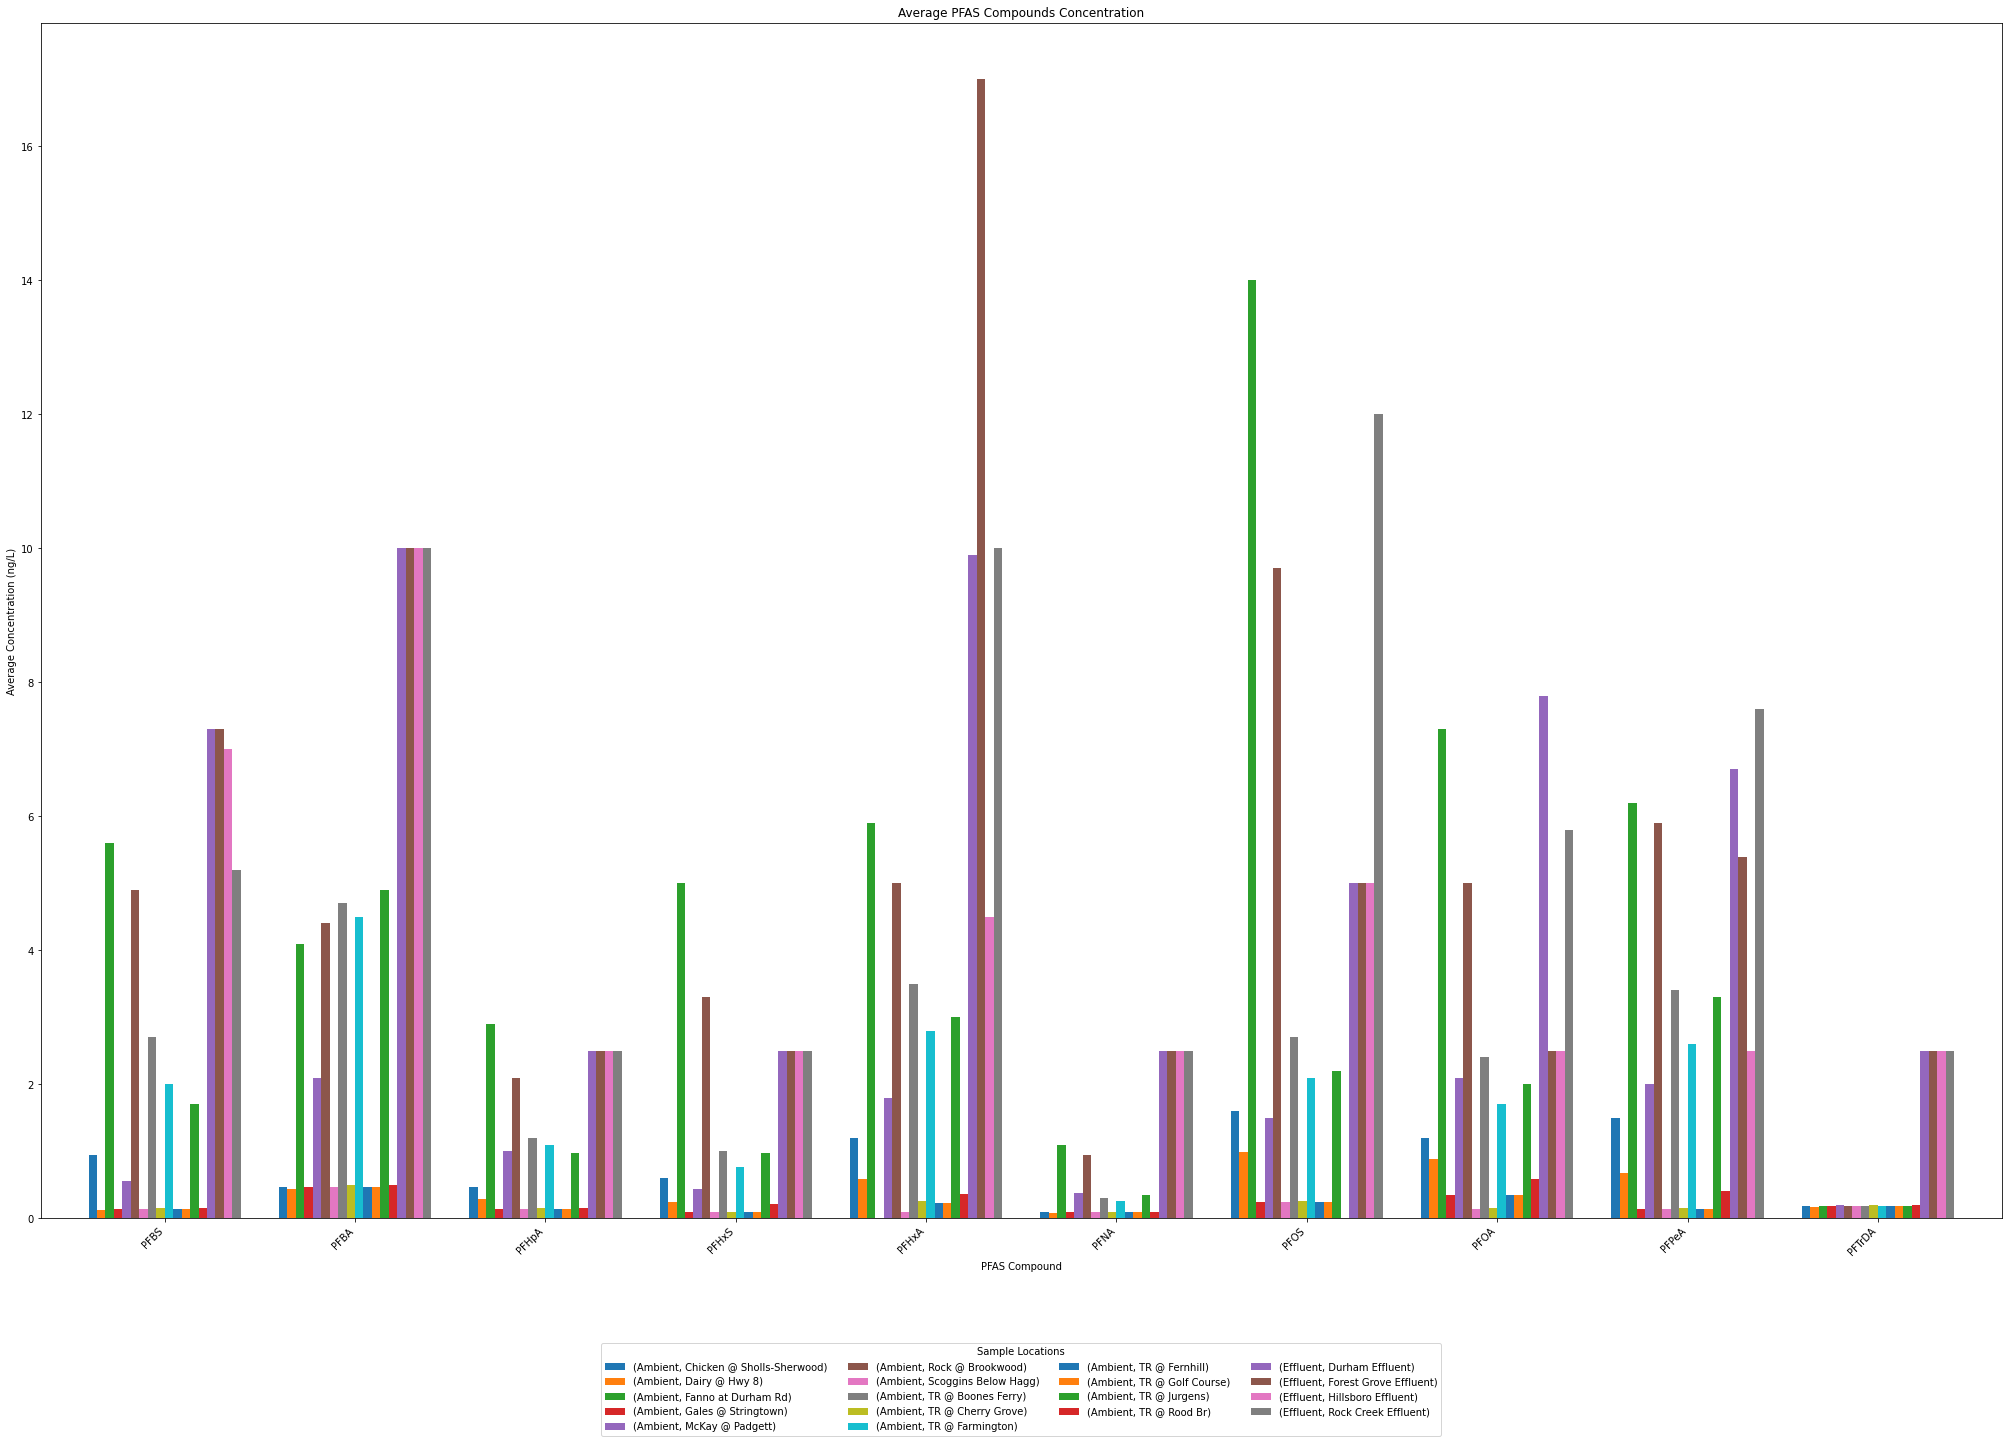

In [20]:
title='Average PFAS Compounds Concentration'
x_label='PFAS Compound'
y_label='Average Concentration (ng/L)'
create_bar_chart_from_pivot(pivot_table, title, x_label, y_label, plot_size=(28,20))

#### 18.5) Reformat Table to Match Order Going Downstream

In [26]:
#Remove the Type column multi-level to keep only the PFAS Compound level
pivot_table_reformat=pivot_table.transpose().reset_index(level=0, drop=True)
#List of Sample Locations in order going downsteam
ordered_SampleLocations = ['TR @ Cherry Grove', 'Scoggins Below Hagg', 'Gales @ Stringtown','TR @ Fernhill','TR @ Golf Course','Dairy @ Hwy 8','TR @ Rood Br','Rock Creek Effluent',
                           'Rock @ Brookwood','TR @ Farmington','Chicken @ Sholls-Sherwood','TR @ Jurgens','Durham Effluent','Fanno at Durham Rd','TR @ Boones Ferry']
# Reorder rows to match the order in 'ordered_list'
pivot_table_reformat = pivot_table_reformat.loc[ordered_SampleLocations]
pivot_table_reformat

PFAS Compound,PFBS,PFBA,PFHpA,PFHxS,PFHxA,PFNA,PFOS,PFOA,PFPeA,PFTrDA
Sample Location,,,,,,,,,,
TR @ Cherry Grove,0.15,0.500,0.15,0.100,0.250,0.100,0.250,0.15,0.15,0.200
Scoggins Below Hagg,0.14,0.470,0.14,0.095,0.095,0.095,0.235,0.14,0.14,0.190
Gales @ Stringtown,0.14,0.470,0.14,0.095,NaN,0.095,0.235,0.34,0.14,0.190
TR @ Fernhill,0.14,0.470,0.14,0.095,0.220,0.095,0.235,0.34,0.14,0.185
TR @ Golf Course,0.14,0.470,0.14,0.095,0.230,0.095,0.235,0.35,0.14,0.190
Dairy @ Hwy 8,0.13,0.435,0.29,0.240,0.590,0.085,0.990,0.88,0.68,0.175
TR @ Rood Br,0.15,0.500,0.15,0.210,0.360,0.100,NaN,0.58,0.41,0.205
Rock Creek Effluent,5.20,10.000,2.50,2.500,10.000,2.500,12.000,5.80,7.60,2.500
Rock @ Brookwood,4.90,4.400,2.10,3.300,5.000,0.940,9.700,5.00,5.90,0.185


#### 18.6) Stacked Bar Chart for PFAS Compound Concentrations Going Downstream

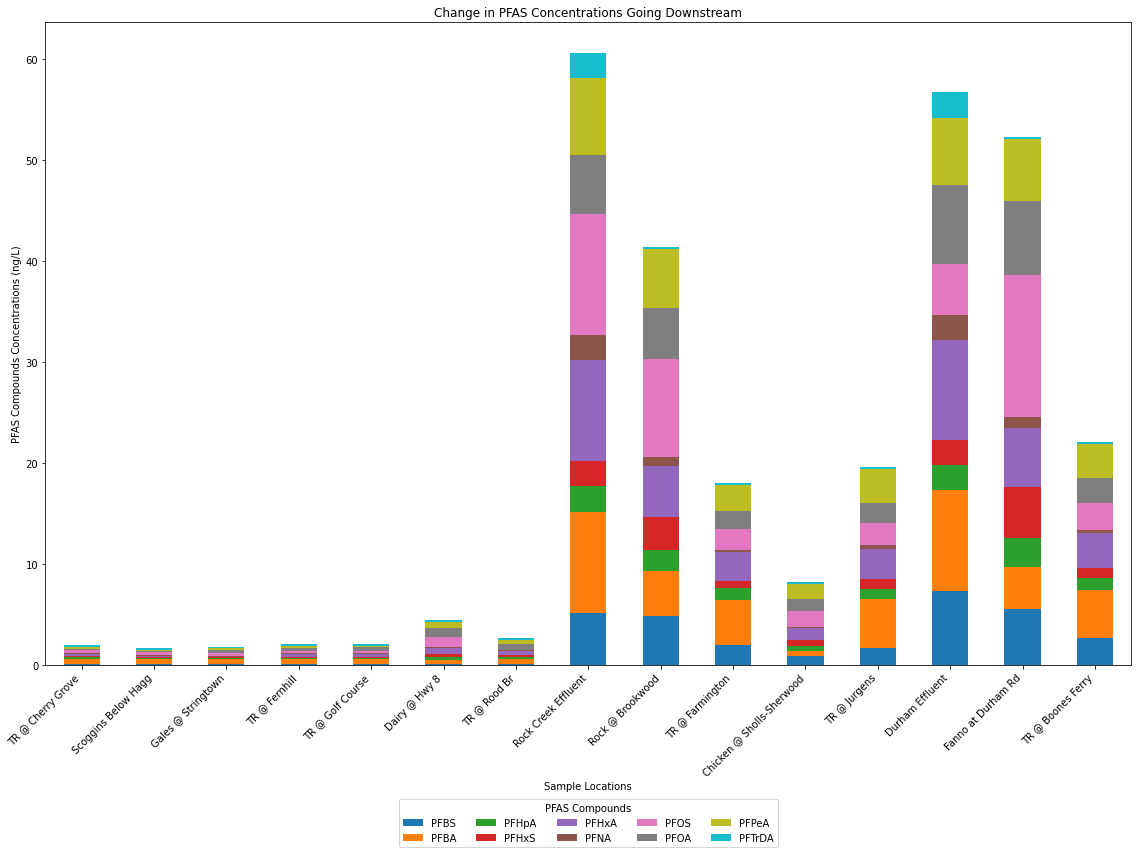

In [44]:
create_stacked_bar_chart(data_df=pivot_table_reformat, title='Change in PFAS Concentrations Going Downstream', x_label='Sample Locations', y_label='PFAS Compounds Concentrations (ng/L)', plot_size=(16, 12))

### 19) Ambient Relationships

#### 19.1) Functions

In [12]:
def create_filtered_pivot_table(data_df, qual_summary_filter, start_date, end_date, type_filter, pfas_compound_filter, sample_location_filter):
    """
    Create a pivot table from the given dataframe with specified filters and date range.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
        start_date (str): Start date for filtering 'Sample Date'.
        end_date (str): End date for filtering 'Sample Date'.
        type_filter (list): Filter values for 'Type'.
        pfas_compound_filter (list): Filter values for 'PFAS Compound'.
        sample_location_filter (list): Filter values for 'Sample Location'.

    Returns:
        pd.DataFrame: The resulting pivot table.
    """
    # Convert 'Sample Date' to datetime
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])

    # Apply filters based on user-provided values
    filtered_data = data_df[
        data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter) &
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
        (data_df['Sample Date'] <= pd.to_datetime(end_date)) &
        data_df['Type'].isin(type_filter) &
        data_df['PFAS Compound'].isin(pfas_compound_filter) &
        data_df['Sample Location'].isin(sample_location_filter)
    ]

    # Create the pivot table
    pivot_table = pd.pivot_table(
        filtered_data,
        values='All (w BDL= MDL/2) Incl Qual Flags',
        index='PFAS Compound',
        columns=['Type', 'Sample Location'],
        aggfunc='mean'
    )

    return pivot_table

In [13]:
def plot_correlation_heatmap(data_df, fig_size=(12,12)):
    """
    Plot a heatmap of the Pearson correlation coefficients of a DataFrame.

    Args:
        data_df (pd.DataFrame): The input dataframe with numerical attributes.
        fig_size (tuple): The size of the figure (width, height).
    """
    # Calculate the Pearson correlation coefficients
    correlation_matrix = data_df.corr()

    # Create the heatmap
    plt.figure(figsize=fig_size)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

    # Add titles and labels as needed
    plt.title('Pearson Correlation Heatmap')
    plt.xlabel('Attributes')
    plt.ylabel('Attributes')

    # Show the plot
    plt.show()




In [14]:
def plot_scatter(data_df, column_x, column_y,fig_size=(10,8)):
    """
    Create a scatter plot for two specified columns from a DataFrame.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        column_x (str): The name of the column for the x-axis.
        column_y (str): The name of the column for the y-axis.
        fig_size (tuple): The size of the figure (width, height).
    """
    plt.figure(figsize=fig_size)  # Adjust the size as needed
    plt.scatter(data_df[column_x], data_df[column_y])

    # Adding titles and labels
    plt.title(f'Scatter Plot of {column_x} vs {column_y}')
    plt.xlabel(column_x)
    plt.ylabel(column_y)

    # Show the plot
    plt.show()

#### 19.2) Filters and Settings

In [15]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
qual_summary_filter=filter_qual_summary = ['Good','Probably Ok','']
#start_date (str): Start date for filtering 'Sample Date'.
start_date='2023-04-06'
#end_date (str): End date for filtering 'Sample Date'.
end_date='2023-06-07'
#type_filter (list): Filter values for 'Type'.
type_filter=['Ambient', 'Effluent']
#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter=Main_Assay
#sample_location_filter (list): Filter values for 'Sample Location'.
sample_location_filter =['Chicken @ Sholls-Sherwood','Dairy @ Hwy 8','Fanno at Durham Rd','Gales @ Stringtown','McKay @ Padgett','Rock @ Brookwood',
'Scoggins Below Hagg','TR @ Boones Ferry','TR @ Cherry Grove','TR @ Farmington','TR @ Fernhill','TR @ Golf Course','TR @ Jurgens','TR @ Rood Br',
'Durham Effluent','Forest Grove Effluent','Hillsboro Effluent','Rock Creek Effluent']

#### 19.3) Create Pivot Table for Average All (w BDL= MDL/2) Incl Qual Flags

In [30]:
pivot_table=create_filtered_pivot_table(data_df, qual_summary_filter, start_date, end_date, type_filter, pfas_compound_filter, sample_location_filter)

# Rename the index of data_df using the mapping (No need to change)
pivot_table.index = pivot_table.index.map(pfas_mapping)

pivot_table=pivot_table.transpose().reset_index(level=0, drop=True)

pivot_table

PFAS Compound,PFBS,PFBA,PFHpA,PFHxS,PFHxA,PFNA,PFOS,PFOA,PFPeA,PFTrDA
Sample Location,,,,,,,,,,
Chicken @ Sholls-Sherwood,0.95,0.470,0.47,0.600,1.200,0.095,1.600,1.20,1.50,0.185
Dairy @ Hwy 8,0.13,0.435,0.29,0.240,0.590,0.085,0.990,0.88,0.68,0.175
Fanno at Durham Rd,5.60,4.100,2.90,5.000,5.900,1.100,14.000,7.30,6.20,0.180
Gales @ Stringtown,0.14,0.470,0.14,0.095,NaN,0.095,0.235,0.34,0.14,0.190
McKay @ Padgett,0.56,2.100,1.00,0.440,1.800,0.380,1.500,2.10,2.00,0.200
Rock @ Brookwood,4.90,4.400,2.10,3.300,5.000,0.940,9.700,5.00,5.90,0.185
Scoggins Below Hagg,0.14,0.470,0.14,0.095,0.095,0.095,0.235,0.14,0.14,0.190
TR @ Boones Ferry,2.70,4.700,1.20,1.000,3.500,0.300,2.700,2.40,3.40,0.185
TR @ Cherry Grove,0.15,0.500,0.15,0.100,0.250,0.100,0.250,0.15,0.15,0.200


#### 19.4) Import Sample Sites Data

In [25]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Old Databases and Spreadsheets/Database as of 11-27-2023 w Plots for ACWA Toxics.xlsm'
#Specify sheet name
sheet_name = 'June 2023 Ambient Flows'

#Call data import function
sites_df = read_excel_sheet(excel_file_path, sheet_name)

#drop multiple columns by name
sites_df.drop(['Unnamed: 0', 'June 2023 Flow (cfs)','Source Notes'], axis=1, inplace=True)

# setting 	WRRF Effluents for Ambient as index column
sites_df.set_index("WRRF Effluents for Ambient", inplace = True)
sites_df.head()

,Area (acres),Forest Acres,Ag Acres,Urban Acres,Imp Acres,% Forest,% Ag,% Urban,% Imp,Upstream WRRFs,Upstream Tribs
WRRF Effluents for Ambient,,,,,,,,,,,
TR @ Cherry Grove,25461.924347,21549.382949,3661.284345,251.257053,477.086571,0.846338,0.143794,0.009868,0.018737,NaN,NaN
Scoggins Below Hagg,4951.660999,3194.021900,1547.320000,210.319099,211.557982,0.645041,0.312485,0.042474,0.042725,NaN,NaN
Gales @ Stringtown,43724.166616,36137.866805,7085.507520,500.792292,773.669939,0.826496,0.162050,0.011453,0.017694,NaN,NaN
TR @ Fernhill,136872.565188,98254.411496,34653.435124,3964.718568,3537.833545,0.717853,0.253180,0.028966,0.025848,NaN,Scoggins + Gales
Forest Grove Effluent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 19.5) Merge PFAS Compound Concentrations and Sample Locations Information based on Sample Locations

In [26]:
# Merge dataframes
merged_df = pd.merge(pivot_table, sites_df, left_index=True, right_index=True, how='inner')
merged_df.head()

,PFBS,PFBA,PFHpA,PFHxS,PFHxA,PFNA,PFOS,PFOA,PFPeA,PFTrDA,...,Forest Acres,Ag Acres,Urban Acres,Imp Acres,% Forest,% Ag,% Urban,% Imp,Upstream WRRFs,Upstream Tribs
Chicken @ Sholls-Sherwood,0.95,0.470,0.47,0.60,1.20,0.095,1.60,1.20,1.50,0.185,...,3200.882770,4382.362286,1960.730425,1046.303633,0.335383,0.459176,0.205442,0.109630,NaN,NaN
Dairy @ Hwy 8,0.13,0.435,0.29,0.24,0.59,0.085,0.99,0.88,0.68,0.175,...,77938.000606,52950.005912,7594.646741,5401.105391,0.562800,0.382358,0.054842,0.039002,NaN,NaN
Durham Effluent,7.30,10.000,2.50,2.50,9.90,2.500,5.00,7.80,6.70,2.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fanno at Durham Rd,5.60,4.100,2.90,5.00,5.90,1.100,14.00,7.30,6.20,0.180,...,1147.827057,2320.390903,14428.027133,7274.806762,0.064138,0.129658,0.806204,0.406499,Rock Creek WRRF + Durham WRRF,NaN
Forest Grove Effluent,7.30,10.000,2.50,2.50,17.00,2.500,5.00,2.50,5.40,2.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 19.6 Create Correlation Matrix

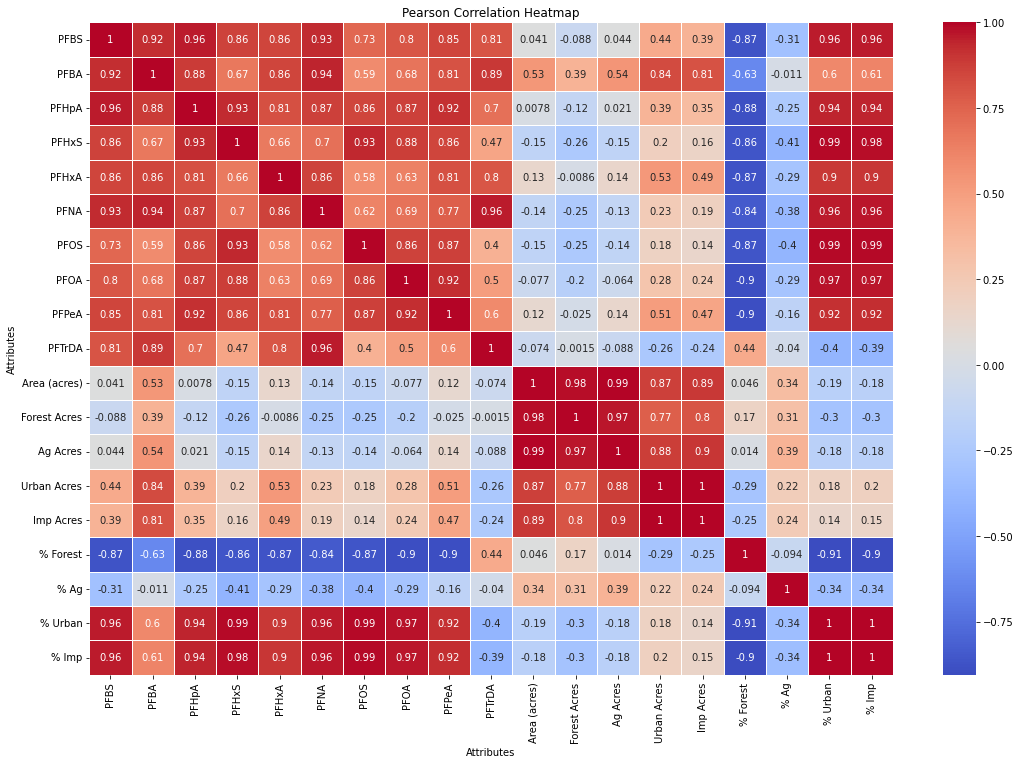

In [27]:
plot_correlation_heatmap(merged_df, fig_size=(18,12))

#### 19.7 Create Scatter Plot to See Relationship

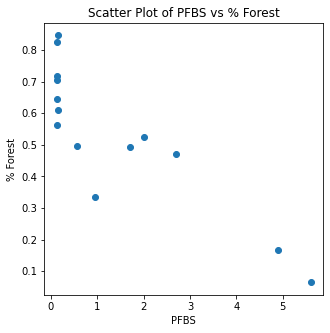

In [28]:
plot_scatter(merged_df, 'PFBS', '% Forest',fig_size=(5,5))

### 20) Industry Conc 20-23 for MB BQL

#### 20.1) Functions

In [9]:
def create_filtered_pivot_table(data_df, qual_summary_filter, start_date, end_date, type_filter, pfas_compound_filter, sample_location_filter,column_name):
    """
    Create a pivot table from the given dataframe with specified filters and date range.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
        start_date (str): Start date for filtering 'Sample Date'.
        end_date (str): End date for filtering 'Sample Date'.
        type_filter (list): Filter values for 'Type'.
        pfas_compound_filter (list): Filter values for 'PFAS Compound'.
        sample_location_filter (list): Filter values for 'Sample Location'.
        column_name (string): Name of the column to use for the pivot table values.

    Returns:
        pd.DataFrame: The resulting pivot table.
    """
    # Convert 'Sample Date' to datetime
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])

    # Apply filters based on user-provided values
    filtered_data = data_df[
        data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter) &
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
        (data_df['Sample Date'] <= pd.to_datetime(end_date)) &
        data_df['Type'].isin(type_filter) &
        data_df['PFAS Compound'].isin(pfas_compound_filter) &
        data_df['Sample Location'].isin(sample_location_filter)
    ]

    # Create the pivot table
    pivot_table = pd.pivot_table(
        filtered_data,
        values=column_name,
        index='PFAS Compound',
        columns=['Type', 'Sample Location'],
        aggfunc='mean'
    )

    return pivot_table

In [10]:
def create_sector_median_pivot(data_df, pivot_table, sample_location_col='Sample Location', sector_col='Sector', pfas_compound_col='PFAS Compound', value_col='Value'):
    """
    Create a pivot table with sectors as rows, PFAS Compounds as columns, 
    and median values for each PFAS Compound within each sector.
    
    Args:
        data_df (pd.DataFrame): Original DataFrame containing at least 'Sample Location', 'Sector', 'PFAS Compound', and values.
        pivot_table (pd.DataFrame): Pivot table created from 'data_df'.
        sample_location_col (str): Name of the column in 'data_df' that contains sample locations.
        sector_col (str): Name of the column in 'data_df' that contains sector information.
        pfas_compound_col (str): Name of the column in 'data_df' that contains PFAS Compound names.
        value_col (str): Name of the column in 'pivot_table' that contains the values for PFAS Compounds.
    
    Returns:
        pd.DataFrame: New pivot table with sectors as rows, PFAS Compounds as columns, and median values.
    """
    # Map 'Sample Location' to 'Sector'
    location_to_sector = data_df[[sample_location_col, sector_col]].drop_duplicates().set_index(sample_location_col)[sector_col].to_dict()
    pivot_table['Sector'] = pivot_table.index.map(location_to_sector)

    # Melt the pivot table for easier grouping
    melted = pivot_table.melt(id_vars=['Sector'], var_name=pfas_compound_col, value_name=value_col)

    # Group by 'Sector' and 'PFAS Compound' and calculate median
    medians = melted.groupby(['Sector', pfas_compound_col]).median().reset_index()

    # Pivot the median data to get the desired table format
    median_pivot_table = medians.pivot(index='Sector', columns=pfas_compound_col, values=value_col)

    return median_pivot_table



In [11]:
def replace_nan_with_sector_median_averages(pivot_table, median_pivot, sectors=['Electrical and Electronic Components', 'Metal Finishing']):
    """
    Replace NaN values in the pivot table with the average of the medians for specified sectors.

    Args:
        pivot_table (pd.DataFrame): The original pivot table with PFAS Compounds as columns and Sample Locations as index.
        median_pivot (pd.DataFrame): Pivot table with sectors as rows, PFAS Compounds as columns, and median values.
        sectors (list): List of sectors to calculate the average of the medians.

    Returns:
        pd.DataFrame: Updated pivot table with NaN values replaced.
    """
    # Calculate the average of the medians for the specified sectors
    avg_medians = median_pivot.loc[sectors].mean().to_dict()

    # Iterate over the pivot table and replace NaN values
    for compound in pivot_table.columns:
        if compound in avg_medians:
            # Replace NaN values in this PFAS Compound column with the average median
            pivot_table[compound] = pivot_table[compound].fillna(avg_medians[compound])

    return pivot_table



In [12]:
def replace_values(pivot_table):
    """
    Replace 0 values with 'BDL' and NaN values with 'NS' in the pivot table.

    Args:
        pivot_table (pd.DataFrame): The pivot table to modify.

    Returns:
        pd.DataFrame: The modified pivot table.
    """
    # Define the custom function to apply to each cell
    def custom_replace(value):
        if pd.isna(value):  # Check if the value is NaN
            return 'NS'
        elif value == 0:  # Check if the value is 0
            return 'BDL'
        else:
            return value
    
    # Apply the custom function to each cell in the pivot table
    modified_pivot_table = pivot_table.applymap(custom_replace)
    
    return modified_pivot_table



#### 20.2) Filters and Settings

In [13]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
qual_summary_filter=filter_qual_summary = ['Good','Probably Ok','']

#start_date (str): Start date for filtering 'Sample Date'.
start_date='2020-01-23'

#end_date (str): End date for filtering 'Sample Date'.
end_date='2023-06-21'

#type_filter (list): Filter values for 'Type'.
type_filter=['Outfall of Industry']

#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter = ['10:2Fluorotelomersulfonic acid', '11Cl-PF3OUdS',
       '4:2 Fluorotelomersulfonic acid', '6:2 Fluorotelomersulfonic acid',
       '8:2 Fluorotelomersulfonic acid', '9Cl-PF3ONS', 'ADONA', 'HFPO-DA',
       'NEtFOSAA', 'NMeFOSAA', 'Perfluorobutanesulfonic acid',
       'Perfluorobutanoic acid', 'Perfluorodecanesulfonic acid',
       'Perfluorodecanoic acid', 'Perfluorododecanesulfonic acid',
       'Perfluorododecanoic acid', 'Perfluoroheptanesulfonic acid',
       'Perfluoroheptanoic acid', 'Perfluorohexadecanoic acid',
       'Perfluorohexanesulfonic acid', 'Perfluorohexanoic acid',
       'Perfluorononanesulfonic acid', 'Perfluorononanoic acid',
       'Perfluorooctadecanoic acid', 'Perfluorooctanesulfonamide',
       'Perfluorooctanesulfonic acid (PFOS)',
       'Perfluorooctanoic acid (PFOA)', 'Perfluoropentanesulfonic acid',
       'Perfluoropentanoic acid', 'Perfluorotetradecanoic acid',
       'Perfluorotridecanoic acid', 'Perfluoroundecanoic acid', 'NEtFOSA',
       'NEtFOSE', 'NMeFOSA', 'NMeFOSE', 'Adsorbable Organic Fluorine',
       '3:3 FTCA', '5:3 FTCA', '7:3 FTCA',
       'Nonafluorodioxaheptanoic acid', 'Perfluoromethoxybutanoic acid',
       'Perfluoromethoxypropoanoic acid', 'PFEESA',
       'TOP-10:2Fluorotelomersulfonic acid', 'TOP-11Cl-PF3OUdS',
       'TOP-4:2 Fluorotelomersulfonic acid',
       'TOP-6:2 Fluorotelomersulfonic acid',
       'TOP-8:2 Fluorotelomersulfonic acid', 'TOP-9Cl-PF3ONS',
       'TOP-ADONA', 'TOP-HFPO-DA', 'TOP-NEtFOSAA', 'TOP-NMeFOSAA',
       'TOP-Perfluorobutanesulfonic acid', 'TOP-Perfluorobutanoic acid',
       'TOP-Perfluorodecanesulfonic acid', 'TOP-Perfluorodecanoic acid',
       'TOP-Perfluorododecanesulfonic acid',
       'TOP-Perfluorododecanoic acid',
       'TOP-Perfluoroheptanesulfonic acid', 'TOP-Perfluoroheptanoic acid',
       'TOP-Perfluorohexadecanoic acid',
       'TOP-Perfluorohexanesulfonic acid', 'TOP-Perfluorohexanoic acid',
       'TOP-Perfluorononanesulfonic acid', 'TOP-Perfluorononanoic acid',
       'TOP-Perfluorooctadecanoic acid', 'TOP-Perfluorooctanesulfonamide',
       'TOP-Perfluorooctanesulfonic acid (PFOS)',
       'TOP-Perfluorooctanoic acid (PFOA)',
       'TOP-Perfluoropentanesulfonic acid', 'TOP-Perfluoropentanoic acid',
       'TOP-Perfluorotetradecanoic acid', 'TOP-Perfluorotridecanoic acid',
       'TOP-Perfluoroundecanoic acid']

#sample_location_filter (list): Filter values for 'Sample Location'.
sample_location_filter = ['Anodize Solutions','Davis Tool','FormFactor','Fujimi Corporation','Hillsboro Landfill','Intel Aloha F15','Intel Ronler PAWN','Intel Ronler WATR',
                          'International Paper', 'JAE Oregon Inc','Jireh Semiconductor Inc','Lam Research Corp','Leupold & Stevens Inc','Lotus Applied Tech','Maxim (Analog)',
                          'NW Rubber Extruders','OSRAM Opto Inc','Pioneer Metal Finishing','Port Portland Aeroair','Prudential Cleanroom','Quantum Global','Seals Unlimited Inc',
                          'Sheldon Manufacturing Inc','Tektronix Bldg 50','TOK America','TTM','Westak']

#column_name (string): Name of the column to use for the pivot table values.
column_name='All (w BDL= MDL/2) Incl Qual Flags'

#sectors (list): List of sectors to calculate the average of the medians.
sectors=['Electrical and Electronic Components', 'Metal Finishing']

#### 20.3) Create Pivot Table for Average 'All (w BDL= MDL/2) Incl Qual Flags' at Sample Locations

In [14]:
pivot_table=create_filtered_pivot_table(data_df, qual_summary_filter, start_date, end_date, type_filter, pfas_compound_filter, sample_location_filter,column_name)
pivot_table=pivot_table.transpose().reset_index(level=0, drop=True)

#Add the corresponding Sector for each Sample Location
# Step 1: Drop duplicates to ensure each 'Sample Location' maps to one 'Sector'
unique_locations = data_df[['Sample Location', 'Sector']].drop_duplicates()

# Step 2: Create a mapping from 'Sample Location' to 'Sector'
location_to_sector = unique_locations.set_index('Sample Location')['Sector'].to_dict()

# Step 3: Map 'Sample Location' in pivot_table to 'Sector' and add as a new column
pivot_table['Sector'] = pivot_table.index.map(location_to_sector)

pivot_table.head()

PFAS Compound,10:2Fluorotelomersulfonic acid,11Cl-PF3OUdS,4:2 Fluorotelomersulfonic acid,6:2 Fluorotelomersulfonic acid,8:2 Fluorotelomersulfonic acid,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,Perfluorooctadecanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid,Perfluorotetradecanoic acid,Perfluorotridecanoic acid,Perfluoroundecanoic acid,Sector
Sample Location,,,,,,,,,,,,,,,,,,,,,
Anodize Solutions,4.850,2.400,2.400,9.500000,4.850,2.400,2.400,NaN,4.850,2.400000,...,4.850,2.400,2.400,2.40,2.400000,2.400,2.400,2.400,2.400,Metal Finishing
Davis Tool,0.455,0.230,0.230,0.900000,0.455,0.230,0.230,NaN,0.455,0.230000,...,0.455,0.230,0.230,0.23,0.230000,0.230,0.230,0.230,0.230,Metal Finishing
FormFactor,0.415,0.210,0.210,0.850000,0.415,0.210,0.210,NaN,0.415,0.210000,...,0.415,0.210,0.210,0.21,0.210000,0.210,0.210,0.210,0.210,Metal Finishing
Fujimi Corporation,0.700,0.345,0.345,1.400000,0.700,0.345,0.345,NaN,0.700,0.345000,...,0.700,0.345,0.345,0.75,0.345000,0.345,0.345,0.345,0.345,Abrasive Products
Hillsboro Landfill,4.000,2.500,10.600,603.333333,42.500,2.500,2.500,2.0,2.000,134.666667,...,2.500,8.550,1075.000,1500.00,134.333333,2475.000,2.000,2.000,14.300,Leachate from Hillsboro Landfill


#### 20.4) Create Table for Median Values for Each Sector

In [15]:
median_pivot=create_sector_median_pivot(data_df, pivot_table, sample_location_col='Sample Location', sector_col='Sector', pfas_compound_col='PFAS Compound', value_col='Value')
median_pivot

PFAS Compound,10:2Fluorotelomersulfonic acid,11Cl-PF3OUdS,4:2 Fluorotelomersulfonic acid,6:2 Fluorotelomersulfonic acid,8:2 Fluorotelomersulfonic acid,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,Perfluorononanoic acid,Perfluorooctadecanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid,Perfluorotetradecanoic acid,Perfluorotridecanoic acid,Perfluoroundecanoic acid
Sector,,,,,,,,,,,,,,,,,,,,,
Abrasive Products,0.700000,0.345000,0.345000,1.400000,0.700000,0.345000,0.345000,NaN,0.70000,0.345000,...,0.710000,0.700000,0.345000,0.34500,0.75000,0.345000,0.345000,0.345000,0.345000,0.345000
Airplane Hangar,0.445000,0.225000,0.225000,0.900000,0.445000,0.225000,0.225000,NaN,0.44500,0.225000,...,5.200000,0.445000,0.225000,0.22500,16.00000,0.225000,2.600000,8.700000,7.900000,4.500000
Chemicals,0.550000,0.265000,0.265000,10.000000,1.200000,0.265000,0.265000,NaN,0.55000,0.265000,...,0.265000,0.550000,1.100000,0.26500,2.80000,0.265000,4.400000,0.265000,0.265000,0.265000
Electrical and Electronic Components,1.098333,0.592917,0.592917,0.976250,1.041875,0.592917,0.592917,1.097500,0.78125,0.592917,...,0.425000,0.918750,1.042292,0.89875,0.52625,0.520000,1.090000,0.672083,0.672083,0.526250
Industrial Launderers,4.333333,2.500000,2.500000,9.600000,3.666667,2.500000,2.500000,3.000000,3.00000,2.500000,...,1.966667,3.333333,1.833333,2.50000,2.40000,1.833333,1.833333,2.166667,2.166667,2.600000
Leachate from Hillsboro Landfill,4.000000,2.500000,10.600000,603.333333,42.500000,2.500000,2.500000,2.000000,2.00000,134.666667,...,117.666667,2.500000,8.550000,1075.00000,1500.00000,134.333333,2475.000000,2.000000,2.000000,14.300000
Metal Finishing,0.500000,0.250000,0.250000,2.568333,1.100000,0.250000,0.250000,2.418333,0.50000,1.251875,...,1.400000,0.500000,2.400000,2.50000,2.50000,0.250000,2.100000,0.600000,0.970000,1.105000
Paper Products,3.582500,2.500000,1.935000,41.000000,3.308750,2.500000,2.500000,3.166667,3.03500,2.500000,...,2.000000,4.150000,2.166667,33.50000,3.20000,2.166667,20.166667,2.333333,2.333333,2.166667
Rubber Manufacture,2.394167,1.365000,1.365000,16.700000,3.844167,1.365000,1.365000,1.615000,1.72750,1.365000,...,13.115000,1.894167,3.800000,1.36500,89.86500,1.031667,48.600000,1.198333,1.198333,2.965000


#### 20.5 Replace Not a Number values with the average of the median concentrations for that compound for the defined sectors

In [23]:
replace_nan_with_sector_median_averages(pivot_table, median_pivot, sectors).head()

PFAS Compound,10:2Fluorotelomersulfonic acid,11Cl-PF3OUdS,4:2 Fluorotelomersulfonic acid,6:2 Fluorotelomersulfonic acid,8:2 Fluorotelomersulfonic acid,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,Perfluorooctadecanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid,Perfluorotetradecanoic acid,Perfluorotridecanoic acid,Perfluoroundecanoic acid,Sector
Sample Location,,,,,,,,,,,,,,,,,,,,,
Anodize Solutions,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,Metal Finishing
Davis Tool,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,Metal Finishing
FormFactor,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,Metal Finishing
Fujimi Corporation,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00,0.0,0.75,0.000000,0.0,0.0,0.0,0.0,Abrasive Products
Hillsboro Landfill,0.0,0.0,10.6,603.333333,42.5,0.0,0.0,0.0,0.0,134.666667,...,0.0,8.55,1075.0,1500.00,134.333333,2475.0,0.0,0.0,14.3,Leachate from Hillsboro Landfill


#### 20.6 Create Pivot Table for Average 'Quant Incl Estimates Incl Qual Flags' at Sample Locations

In [17]:
pivot_table=create_filtered_pivot_table(data_df, qual_summary_filter, start_date, end_date, type_filter, pfas_compound_filter, sample_location_filter,column_name='Quant Incl Estimates Incl Qual Flags')
pivot_table=pivot_table.transpose().reset_index(level=0, drop=True)

#Add the corresponding Sector for each Sample Location
# Step 1: Drop duplicates to ensure each 'Sample Location' maps to one 'Sector'
unique_locations = data_df[['Sample Location', 'Sector']].drop_duplicates()

# Step 2: Create a mapping from 'Sample Location' to 'Sector'
location_to_sector = unique_locations.set_index('Sample Location')['Sector'].to_dict()

# Step 3: Map 'Sample Location' in pivot_table to 'Sector' and add as a new column
pivot_table['Sector'] = pivot_table.index.map(location_to_sector)

pivot_table.head()

PFAS Compound,10:2Fluorotelomersulfonic acid,11Cl-PF3OUdS,4:2 Fluorotelomersulfonic acid,6:2 Fluorotelomersulfonic acid,8:2 Fluorotelomersulfonic acid,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,Perfluorooctadecanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid,Perfluorotetradecanoic acid,Perfluorotridecanoic acid,Perfluoroundecanoic acid,Sector
Sample Location,,,,,,,,,,,,,,,,,,,,,
Anodize Solutions,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,0.0,0.000000,...,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,Metal Finishing
Davis Tool,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,0.0,0.000000,...,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,Metal Finishing
FormFactor,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,0.0,0.000000,...,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,Metal Finishing
Fujimi Corporation,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,0.0,0.000000,...,0.0,0.00,0.0,0.75,0.000000,0.0,0.0,0.0,0.0,Abrasive Products
Hillsboro Landfill,0.0,0.0,10.6,603.333333,42.5,0.0,0.0,0.0,0.0,134.666667,...,0.0,8.55,1075.0,1500.00,134.333333,2475.0,0.0,0.0,14.3,Leachate from Hillsboro Landfill


#### 20.7 Create pivot table for Median Values for Each Sector

In [22]:
median_pivot=create_sector_median_pivot(data_df, pivot_table, sample_location_col='Sample Location', sector_col='Sector', pfas_compound_col='PFAS Compound', value_col='Value')
median_pivot.head()

PFAS Compound,10:2Fluorotelomersulfonic acid,11Cl-PF3OUdS,4:2 Fluorotelomersulfonic acid,6:2 Fluorotelomersulfonic acid,8:2 Fluorotelomersulfonic acid,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,Perfluorononanoic acid,Perfluorooctadecanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid,Perfluorotetradecanoic acid,Perfluorotridecanoic acid,Perfluoroundecanoic acid
Sector,,,,,,,,,,,,,,,,,,,,,
Abrasive Products,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.710000,0.0,0.00000,0.000,0.750000,0.0,0.000000,0.0,0.0,0.000000
Airplane Hangar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,5.200000,0.0,0.00000,0.000,16.000000,0.0,2.600000,8.7,7.9,4.500000
Chemicals,0.0,0.0,0.0,10.0,1.2,0.0,0.0,NaN,0.0,0.0,...,0.000000,0.0,1.10000,0.000,2.800000,0.0,4.400000,0.0,0.0,0.000000
Electrical and Electronic Components,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.108333,0.0,0.06875,0.125,0.000000,0.0,0.873333,0.0,0.0,0.000000
Industrial Launderers,0.0,0.0,0.0,9.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.800000,0.0,0.00000,0.000,1.066667,0.0,0.000000,0.0,0.0,1.266667


In [21]:
replace_values(pivot_table).head()

PFAS Compound,10:2Fluorotelomersulfonic acid,11Cl-PF3OUdS,4:2 Fluorotelomersulfonic acid,6:2 Fluorotelomersulfonic acid,8:2 Fluorotelomersulfonic acid,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,Perfluorooctadecanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid,Perfluorotetradecanoic acid,Perfluorotridecanoic acid,Perfluoroundecanoic acid,Sector
Sample Location,,,,,,,,,,,,,,,,,,,,,
Anodize Solutions,BDL,BDL,BDL,BDL,BDL,BDL,BDL,NS,BDL,BDL,...,BDL,BDL,BDL,BDL,BDL,BDL,BDL,BDL,BDL,Metal Finishing
Davis Tool,BDL,BDL,BDL,BDL,BDL,BDL,BDL,NS,BDL,BDL,...,BDL,BDL,BDL,BDL,BDL,BDL,BDL,BDL,BDL,Metal Finishing
FormFactor,BDL,BDL,BDL,BDL,BDL,BDL,BDL,NS,BDL,BDL,...,BDL,BDL,BDL,BDL,BDL,BDL,BDL,BDL,BDL,Metal Finishing
Fujimi Corporation,BDL,BDL,BDL,BDL,BDL,BDL,BDL,NS,BDL,BDL,...,BDL,BDL,BDL,0.75,BDL,BDL,BDL,BDL,BDL,Abrasive Products
Hillsboro Landfill,BDL,BDL,10.6,603.333333,42.5,BDL,BDL,BDL,BDL,134.666667,...,BDL,8.55,1075.0,1500.0,134.333333,2475.0,BDL,BDL,14.3,Leachate from Hillsboro Landfill


### 21)

#### 21.1) Define Functions

In [9]:
def create_custom_pivot_table(data_df, type_filter, start_date, end_date, qual_summary_filter):
    """
    Create a pivot table with specific filters, multi-level columns, and aggregation.

    Args:
        data_df (pd.DataFrame): The input dataframe containing the dataset.
        type_filter (list): A list of types to filter the 'Type' column.
        start_date (str): The start date for filtering 'Sample Date' in 'YYYY-MM-DD' format.
        end_date (str): The end date for filtering 'Sample Date' in 'YYYY-MM-DD' format.
        qual_summary_filter (list): A list of values to filter the 'Qual Summary (Grade for filtering)' column.

    Returns:
        pd.DataFrame: A pivot table based on the specified structure and filters.
    """
    # Convert 'Sample Date' to datetime format if not already
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])
    
    # Apply filters
    filtered_data = data_df[
        (data_df['Type'].isin(type_filter)) &
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
        (data_df['Sample Date'] <= pd.to_datetime(end_date)) &
        (data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter))
    ]
    
    # Create pivot table
    pivot_table = pd.pivot_table(
        filtered_data,
        values='All (w BDL= MDL/2) Incl Qual Flags',
        index='PFAS Compound',
        columns=['Dominant Contributor', 'Sample Location'],
        aggfunc='mean'
    )
    
    return pivot_table


In [10]:
def plot_pfas_compound_bars(pivot_table, figsize=(10, 6)):
    """
    Creates a bar chart from a pivot table with 'PFAS Compound' as the x-axis and separate bars for each 'Sample Location'.
    
    Args:
        pivot_table (pd.DataFrame): A pivot table with 'PFAS Compound' as rows, 'Sample Location' as columns, and the values are the measurements.
        figsize (tuple, optional): Figure size (width, height) in inches (default is (10, 6)).
    """
    # Plotting
    pivot_table.plot(kind='bar', figsize=figsize, width=0.8)
    
    plt.title('PFAS Compound Concentrations by Sample Location')
    plt.xlabel('PFAS Compound')
    plt.ylabel('PFAS Concentration (ng/L)')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.legend(title='Sample Location')
    plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
    
    plt.show()



#### 21.2) Filters and Settings

In [11]:
#qual_summary_filter (list): A list of values to filter the 'Qual Summary (Grade for filtering)' column.
qual_summary_filter=filter_qual_summary = ['Good','Probably Ok','']

#start_date (str): The start date for filtering 'Sample Date' in 'YYYY-MM-DD' format.
start_date='2023-06-06'

#end_date (str): The end date for filtering 'Sample Date' in 'YYYY-MM-DD' format.
end_date='2023-10-06'

#type_filter (list): A list of types to filter the 'Type' column.
type_filter=['Manhole']

#### 21.3 Create Pivot Table

In [12]:
pivot_table=create_custom_pivot_table(data_df, type_filter, start_date, end_date, qual_summary_filter)
# Rename the index of data_df using the mapping (No need to change)
pivot_table.index = pivot_table.index.map(pfas_mapping)
pivot_table.fillna('NS', inplace=True)
pivot_table

Dominant Contributor Commercial and NSU Industrial                             \
Sample Location                           MH#16331 MH#19788 MH#20615 MH#20723   
PFAS Compound                                                                   
10:2FTS                                        0.4   0.3975   0.3975   0.3725   
11Cl-PF3OUdS                                  0.25   0.2475   0.2500   0.2325   
4:2FTS                                        0.25   0.2475   0.2500   0.2325   
6:2FTS                                       0.255   4.8600   0.2500   7.7000   
8:2FTS                                      0.3025   0.3000   0.2975   0.2800   
9Cl-PF3ONS                                    0.25   0.2475   0.2500   0.2325   
ADONA                                         0.25   0.2475   0.4150   0.2325   
HFPO-DA                                        0.2   0.2000   0.1975   0.1850   
NEtFOSA                                        0.2   0.2000   0.1975   0.1850   
NEtFOSAA                                      0.25   0.2475   0.2500   0.2325   
NEtFOSE                                        0.2   0.2000   0.1975   0.1850   
NMeFOSA                                     0.3525   0.3500   0.3475   0.5225   
NMeFOSAA                                       0.2   0.2000   0.1975   0.1850   
NMeFOSE                                         NS   1.0525   0.1975   0.1850   
PFBS                                          1.25   7.8000   3.4000   2.5000   
PFBA                                          4.35   5.6500   1.8500   1.9500   
PFDS                                          0.49   0.6700   0.2625   0.7675   
PFDA                                          0.41   1.1400   0.3825   0.4250   
PFDoS                                       0.2875   0.7750   0.2925   0.1400   
PFDoA                                          0.2   0.2000   0.1975   0.1850   
PFHpS                                         0.15   0.1500   0.1500   0.1400   
PFHpA                                        0.765   6.2500   0.4250   1.1650   
PFHxDA                                        0.25   0.2475   0.2500   0.2325   
PFHxS                                          2.1   4.0000   1.2475   1.2500   
PFHxA                                          3.9  10.6500   1.8000   2.3500   
PFNS                                          0.15   0.1500   0.1500   0.4450   
PFNA                                          0.45   3.6500   0.2025   0.4400   
PFODA                                         0.25   0.2475   0.2500   0.2325   
FOSA                                          0.15   0.1500   0.5175   0.8350   
PFOS                                           3.8  14.0000   3.5000  33.5000   
PFOA                                          2.55  21.0000   1.7000   2.0000   
PFPeS                                         0.15   0.5200   0.2425   0.1400   
PFPeA                                          2.6  12.0000   0.7050   0.7600   
PFTeDA                                         0.2   0.2000   0.1975   0.1850   
PFTrDA                                         0.2   0.2000   0.1975   0.1850   
PFUnA                                         0.15   0.3450   0.1500   0.1400   

Dominant Contributor                   Domestic                   
Sample Location      MH#21070 MH#72360 MH#20788 MH#67882 MH#8402  
PFAS Compound                                                     
10:2FTS                0.3975   0.4000   0.3950   0.4100  0.3925  
11Cl-PF3OUdS           0.2500   0.2500   0.2475   0.2575  0.2450  
4:2FTS                 0.2500   0.2500   0.2475   0.2575  0.2450  
6:2FTS                 0.4050   0.8350   0.2475   0.2575  0.2500  
8:2FTS                 0.2975   0.3000   0.2975   0.3075  0.2950  
9Cl-PF3ONS             0.2500   0.2500   0.2475   0.2575  0.2450  
ADONA                  0.2500   0.2500   0.2475   0.2575  0.2450  
HFPO-DA                0.5400   0.2000   0.3900   0.2050  0.1975  
NEtFOSA                0.2000   0.2000   0.2000   0.2050  0.1975  
NEtFOSAA               0.2500   0.25

#### 21.4) Create Bar Chart for Average PFAS Concentration at Each Sample Location

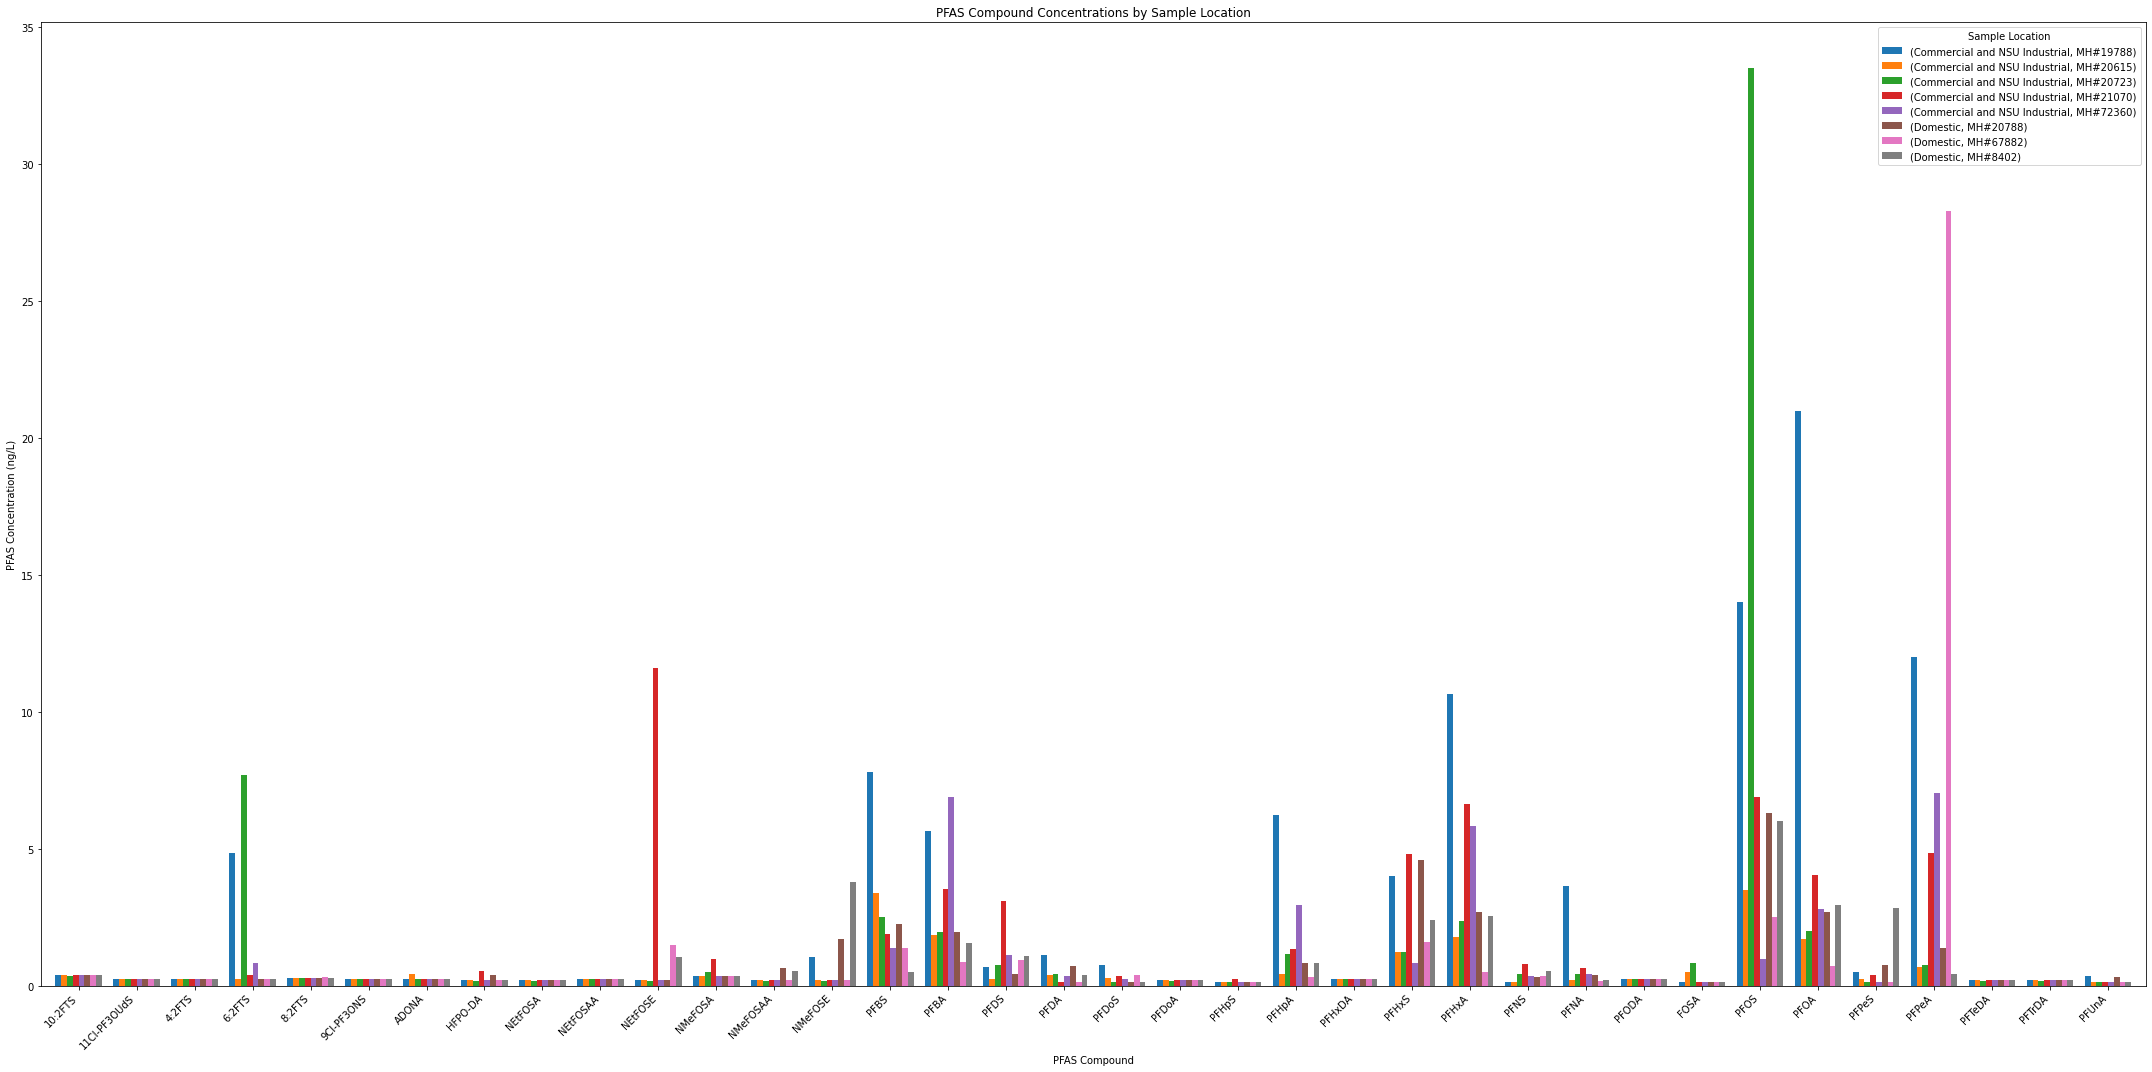

In [13]:
plot_pfas_compound_bars(pivot_table, figsize=(30,15))

### 22) Thomas Dairy Timeseries BQL

#### 22.1) Functions

In [14]:
def create_filtered_pivot_table_by_date(data_df, qual_summary_filter, pfas_compound_filter, sample_location_filter, start_date, end_date,column_name='Quant Incl Estimates Incl Qual Flags'):
    """
    Create a pivot table from the given dataframe with specified filters, date range, and aggregation function,
    using 'Sample Date' for the rows of the pivot table.
    
    Args:
        data_df (pd.DataFrame): The input dataframe.
        qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
        pfas_compound_filter (list): Filter values for 'PFAS Compound'.
        sample_location_filter (list): Filter values for 'Sample Location'.
        start_date (str): Start date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
        end_date (str): End date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
        column_name (str, optional): Name of the column to calculate the average (default is 'All (w BDL= MDL/2) Incl Qual Flags' other options are 
    
    Returns:
        pd.DataFrame: A pivot table with 'Sample Date' as rows, 'Sample Location' as columns, and the average of 'Quant Incl Estimates Incl Qual Flags' as values.
    """
    # Ensure 'Sample Date' is a datetime type
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])

    # Apply filters
    filtered_data = data_df[
        (data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter)) &
        (data_df['PFAS Compound'].isin(pfas_compound_filter)) &
        (data_df['Sample Location'].isin(sample_location_filter)) &
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
        (data_df['Sample Date'] <= pd.to_datetime(end_date))
    ]

    # Create the pivot table
    pivot_table = pd.pivot_table(
        filtered_data,
        values=column_name,
        index=['Sample Date'],  # Use 'Sample Date' for the rows
        columns=['Sample Location'],  # 'Sample Location' as columns
        aggfunc='mean'
    )

    return pivot_table





In [15]:
def rename_pivot_table_columns(pivot_table, rename_dict):
    """
    Rename column names of a pivot table with single-level columns based on a provided dictionary.

    Args:
        pivot_table (pd.DataFrame): The pivot table whose columns you want to rename.
        rename_dict (dict): A dictionary where keys are current column names and values are the new names.

    Returns:
        pd.DataFrame: The pivot table with renamed columns.
    """
    # Rename the columns using the provided dictionary
    renamed_pivot_table = pivot_table.rename(columns=rename_dict)

    return renamed_pivot_table



In [16]:
def plot_timeseries_from_pivot(pivot_table, title, x_label, y_label, plot_size=(10, 6)):
    """
    Creates a line chart plot from a pivot table, where each column is a timeseries plotted against 'Sample Date'.

    Args:
        pivot_table (pd.DataFrame): The pivot table with 'Sample Date' as index and each column representing a timeseries.
        title (str): The title of the plot.
        x_label (str): The label for the x-axis.
        y_label (str): The label for the y-axis.
        plot_size (tuple): The size of the plot, specified as (width, height).
    """
    # Plotting
    plt.figure(figsize=plot_size)
    for column in pivot_table.columns:
        plt.plot(pivot_table.index, pivot_table[column], marker='', linewidth=2, label=column)

    # Customizing the plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Sample Location', loc='upper right')
    plt.grid(True)  # Optional: Adds a grid for easier visualization
    plt.tight_layout()  # Adjust layout to make room for the plot elements

    # Display the plot
    plt.show()



In [17]:
def plot_timeseries_from_pivot(pivot_table, title, x_label, y_label, plot_size=(10, 6), colormap='tab10'):
    """
    Creates a line chart plot from a pivot table, where each column is a timeseries plotted against 'Sample Date'.
    Uses a Matplotlib colormap to generate distinct colors for each line.

    Args:
        pivot_table (pd.DataFrame): The pivot table with 'Sample Date' as index and each column representing a timeseries.
        title (str): The title of the plot.
        x_label (str): The label for the x-axis.
        y_label (str): The label for the y-axis.
        plot_size (tuple): The size of the plot, specified as (width, height).
        colormap (str): The name of the colormap to use for generating line colors.
        
    """
    # Generate colors from the colormap
    colors = plt.cm.get_cmap(colormap, len(pivot_table.columns))
    
    # Plotting
    plt.figure(figsize=plot_size)
    for i, column in enumerate(pivot_table.columns):
        plt.plot(pivot_table.index, pivot_table[column], color=colors(i), marker='', linewidth=2, label=column)

    # Customizing the plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Sample Location', loc='upper right', bbox_to_anchor=(1.05, 1), ncol=1)
    plt.grid(True)  # Optional: Adds a grid for easier visualization
    plt.tight_layout()  # Adjust layout to make room for the plot elements

    # Display the plot
    plt.show()



#### 22.2) Define Filters and Settings

In [18]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
qual_summary_filter = ['Good','Probably Ok','']
#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter = ['Perfluorooctanesulfonic acid (PFOS)']  
#sample_location_filter (list): Filter values for 'Sample Location'.
sample_location_filter = ['Thomas Dairy A-0', 'Thomas Dairy A-1','Thomas Dairy A-2','Thomas Dairy B-0','Thomas Dairy B-1','Thomas Dairy B-2','Thomas Dairy C-0','Thomas Dairy C-1','Thomas Dairy C-2','Thomas Dairy Control-0 2022',
                          'Thomas Dairy Control-1 2022','Thomas Dairy Control-2 2022','']  
#start_date (str): Start date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
start_date = '2022-06-08'  
#end_date (str): End date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
end_date = '2023-06-21' 

#column_name (str, optional): Name of the column to calculate the average (default is 'All (w BDL= MDL/2) Incl Qual Flags' other options are 
# 'Average of Quant Incl Estimates Incl Qual Flags','Average of Quant Only Incl Qual Flags').

rename_dict= {
    'Thomas Dairy A-0': 'Row A Surface',
    'Thomas Dairy A-1': 'Row A 0-1ft',
    'Thomas Dairy A-2': 'Row A 1-2ft',
    'Thomas Dairy B-0': 'Row B Surface',
    'Thomas Dairy B-1': 'Row B 0-1ft',
    'Thomas Dairy B-2': 'Row B 1-2ft',
    'Thomas Dairy C-0': 'Row C Surface',
    'Thomas Dairy C-1': 'Row C 0-1ft',
    'Thomas Dairy C-2': 'Row C 1-2ft',
    'Thomas Dairy Control-0 2022': 'Control Surface',
    'Thomas Dairy Control-1 2022': 'Control 0-1ft',
    'Thomas Dairy Control-2 2022': 'Control 1-2ft'
}

#### 22.3) Create Pivot Table for Average of Quant Incl Estimates Incl Qual Flags, date as rows and sample location as columns

In [19]:
pivot_table=create_filtered_pivot_table_by_date(data_df, qual_summary_filter, pfas_compound_filter, sample_location_filter, start_date, end_date,column_name='Quant Incl Estimates Incl Qual Flags')
pivot_table=rename_pivot_table_columns(pivot_table, rename_dict)
pivot_table

Sample Location,Row A Surface,Row A 0-1ft,Row A 1-2ft,Row B Surface,Row B 0-1ft,Row B 1-2ft,Row C Surface,Row C 0-1ft,Row C 1-2ft,Control Surface,Control 0-1ft,Control 1-2ft
Sample Date,,,,,,,,,,,,
2022-06-08,2.00,1.20,0.34,3.2,1.90,NaN,NaN,NaN,NaN,0.41,0.46,0.22
2022-08-11,2.90,1.10,0.55,3.5,0.69,0.97,NaN,NaN,NaN,0.44,0.27,0.00
2022-10-20,0.84,0.28,0.00,3.4,1.30,NaN,NaN,NaN,NaN,0.40,0.00,0.24
2023-06-21,0.82,0.26,0.30,3.0,1.10,0.78,2.3,1.1,0.0,0.22,NaN,NaN


#### 22.4) Create Line Chart for Timeseries

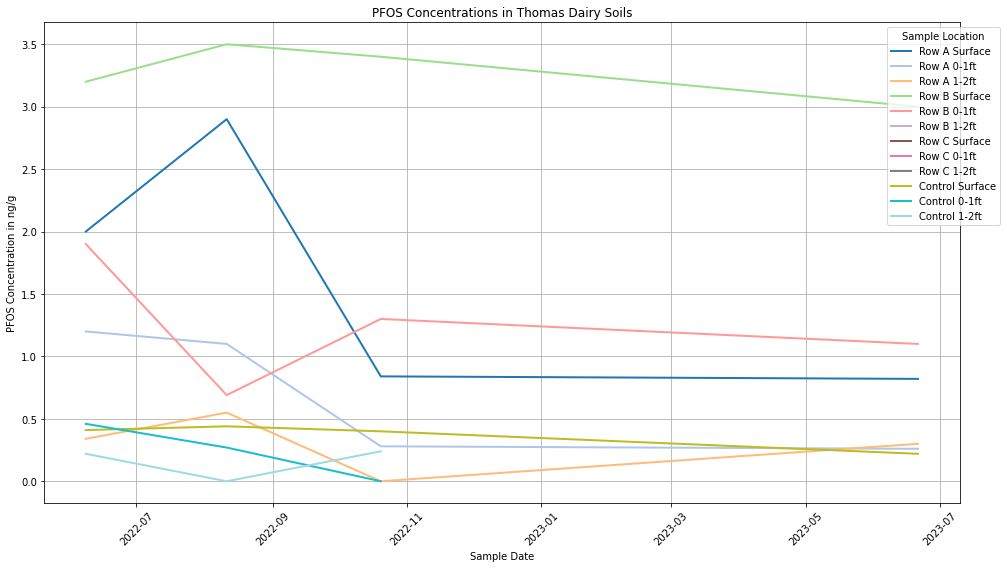

In [20]:
#plot_timeseries_from_pivot(pivot_table, title='PFOS Concentrations in Thomas Dairy', x_label='Sample Date', y_label='PFOS Concentration in ng/g', plot_size=(14, 8))
plot_timeseries_from_pivot(pivot_table, title='PFOS Concentrations in Thomas Dairy Soils', x_label='Sample Date', y_label='PFOS Concentration in ng/g', plot_size=(14, 8), colormap='tab20')

### 23) Thomas Dairy Old VS New

#### 23.1) Functions

In [21]:
def create_pivot_tables(data_df, qual_summary_filter, start_date, end_date, sample_location_filter, pfas_compound_filter):
    """
    Create three pivot tables for the average, standard deviation, and count of 'Quant Only Incl Qual Flags',
    filtered by specified criteria.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
        start_date (str): Start date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
        end_date (str): End date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
        sample_location_filter (list): Filter values for 'Sample Location'.
        pfas_compound_filter (list): Filter values for 'PFAS Compound'.

    Returns:
        tuple: A tuple containing three pd.DataFrames (average, standard deviation, count pivot tables).
    """
    # Convert 'Sample Date' to datetime and apply filters
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])
    filtered_data = data_df[
        (data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter)) &
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
        (data_df['Sample Date'] <= pd.to_datetime(end_date)) &
        (data_df['Sample Location'].isin(sample_location_filter)) &
        (data_df['PFAS Compound'].isin(pfas_compound_filter))
    ]
    
    # Create pivot tables
    avg_pivot = pd.pivot_table(filtered_data, values='Quant Only Incl Qual Flags', index='Sample Location', columns='PFAS Compound', aggfunc='mean')
    std_pivot = pd.pivot_table(filtered_data, values='Quant Only Incl Qual Flags', index='Sample Location', columns='PFAS Compound', aggfunc='std')
    count_pivot = pd.pivot_table(filtered_data, values='Quant Only Incl Qual Flags', index='Sample Location', columns='PFAS Compound', aggfunc='count')
    
    return avg_pivot, std_pivot, count_pivot



In [37]:
def create_summary_dataframe(avg_pivot, std_pivot, count_pivot, category_mapping):
    """
    Create a summary dataframe with averages, standard errors, and categories.

    Args:
        avg_pivot (pd.DataFrame): Pivot table with average values.
        std_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.
        category_mapping (pd.DataFrame): Dataframe with 'Sample Location', 'Category' and 'Sub-Category' mappings.

    Returns:
        pd.DataFrame: Dataframe with averages, standard errors, 'Category', and 'Sub-Category'.
    """
    # Create the standard error DataFrame
    standard_error = std_pivot / np.sqrt(count_pivot)
    
    # Concatenate the average, standard deviation, and standard error DataFrames
    summary_df = pd.concat([avg_pivot, std_pivot, standard_error], axis=1, keys=['Average', 'StdDev', 'StdError'])
    
    # Reset the index to turn it into a column for merging
    summary_df.reset_index(inplace=True)
    
    # Merge the summary with the category mapping
    summary_with_categories = pd.merge(summary_df, category_mapping, left_on='Sample Location', right_on='Sample Location', how='left')
    
    # Set the index back to 'Sample Location'
    summary_with_categories.set_index('Sample Location', inplace=True)
    
    return summary_with_categories



In [71]:
def create_grouped_bar_chart_with_error(summary_df, pfas_compounds, category_col='Category', sub_category_col='Sub-Category', figsize=(12, 8)):
    """
    Create a grouped bar chart for the average concentration of PFAS compounds with error bars.

    Args:
        summary_df (pd.DataFrame): The summary dataframe.
        pfas_compounds (list): List of PFAS compound names to plot.
        category_col (str): Column name for the primary category.
        sub_category_col (str): Column name for the sub-category.
        figsize (tuple): Figure size.
    """
    # Ensure 'Category' and 'Sub-Category' are part of the index for easy plotting
    if not (category_col in summary_df.index.names and sub_category_col in summary_df.index.names):
        summary_df.set_index([category_col, sub_category_col], inplace=True)

    # Prepare data for bar chart
    avg_data = summary_df[[f'Average_{compound}' for compound in pfas_compounds]].copy()
    avg_data.columns = pfas_compounds  # Rename columns to compound names only

    # Prepare error data
    error_data = summary_df[[f'StdError_{compound}' for compound in pfas_compounds]].copy()
    error_data.columns = pfas_compounds  # Rename columns to compound names only

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    bars = avg_data.unstack().plot(kind='bar', ax=ax, width=0.8, yerr=error_data.unstack(), capsize=4)

    # Set labels and title
    ax.set_xlabel(f'{category_col} and {sub_category_col}')
    ax.set_ylabel('Average Concentration (ng/L)')
    ax.set_title('Average PFAS Concentration by Category and Sub-Category with Error Bars')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Display the legend
    plt.legend(title='PFAS Compounds')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


In [24]:
# Define the dictionary with sample locations, categories, and sub-categories
category_data = {
    'Sample Location': [
        'Thomas Dairy Control-0 2022', 'Thomas Dairy Control-1 2022', 'Thomas Dairy Control-2 2022',
        'Thomas Dairy A-0', 'Thomas Dairy A-1', 'Thomas Dairy A-2',
        'Thomas Dairy B-0', 'Thomas Dairy B-1', 'Thomas Dairy B-2',
        'Thomas Dairy C-0', 'Thomas Dairy C-1', 'Thomas Dairy C-2',
        'Thomas Dairy Control Site Soil - 0', 'Thomas Dairy Control Site Soil - 1', 'Thomas Dairy Control Site Soil - 2',
        'Thomas Dairy Site 1 Soil - 0', 'Thomas Dairy Site 1 Soil - 1', 'Thomas Dairy Site 1 Soil - 2',
        'Thomas Dairy Site 2 Soil - 0', 'Thomas Dairy Site 2 Soil - 1', 'Thomas Dairy Site 2 Soil - 2',
        'Thomas Dairy Site 3 Soil - 0', 'Thomas Dairy Site 3 Soil - 1', 'Thomas Dairy Site 3 Soil - 2',
    ],
    'Category': [
        '2022 Control', '2022 Control', '2022 Control',
        'Row A', 'Row A', 'Row A',
        'Row B', 'Row B', 'Row B',
        'Row C', 'Row C', 'Row C',
        '2023 Control', '2023 Control', '2023 Control',
        'Site 1', 'Site 1', 'Site 1',
        'Site 2', 'Site 2', 'Site 2',
        'Site 3', 'Site 3', 'Site 3',
    ],
    'Sub-Category': [
        'Surface', '0-1 ft', '1-2 ft',
        'Surface', '0-1 ft', '1-2 ft',
        'Surface', '0-1 ft', '1-2 ft',
        'Surface', '0-1 ft', '1-2 ft',
        'Surface', '0-1 ft', '1-2 ft',
        'Surface', '0-1 ft', '1-2 ft',
        'Surface', '0-1 ft', '1-2 ft',
        'Surface', '0-1 ft', '1-2 ft',
    ]
}

# Create the DataFrame
category_mapping = pd.DataFrame(category_data)

category_mapping



,Sample Location,Category,Sub-Category
0,Thomas Dairy Control-0 2022,2022 Control,Surface
1,Thomas Dairy Control-1 2022,2022 Control,0-1 ft
2,Thomas Dairy Control-2 2022,2022 Control,1-2 ft
3,Thomas Dairy A-0,Row A,Surface
4,Thomas Dairy A-1,Row A,0-1 ft
5,Thomas Dairy A-2,Row A,1-2 ft
6,Thomas Dairy B-0,Row B,Surface
7,Thomas Dairy B-1,Row B,0-1 ft
8,Thomas Dairy B-2,Row B,1-2 ft
9,Thomas Dairy C-0,Row C,Surface


#### 23.2) Define Filters and Settings

In [23]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
qual_summary_filter = ['Good','Probably Ok','']

#start_date (str): Start date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
start_date='2019-08-15'

#end_date (str): End date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
end_date='2023-10-06'

#sample_location_filter (list): Filter values for 'Sample Location'.
sample_location_filter = ['Thomas Dairy A-0', 'Thomas Dairy A-1','Thomas Dairy A-2','Thomas Dairy B-0','Thomas Dairy B-1','Thomas Dairy B-2','Thomas Dairy C-0','Thomas Dairy C-1','Thomas Dairy C-2','Thomas Dairy Control-0 2022',
                          'Thomas Dairy Control-1 2022','Thomas Dairy Control-2 2022','Thomas Dairy Site 1 Soil - 0','Thomas Dairy Site 1 Soil - 1','Thomas Dairy Site 1 Soil - 2',
                          'Thomas Dairy Site 2 Soil - 0','Thomas Dairy Site 2 Soil - 1','Thomas Dairy Site 2 Soil - 2','Thomas Dairy Site 3 Soil - 0','Thomas Dairy Site 3 Soil - 1',
                          'Thomas Dairy Site 3 Soil - 2']  

#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter=['Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)']

#### 23.3) Create Pivot Table for Average, Standard Deviation and Count of PFAS Compound Concentration at Sample Locations

In [25]:
avg_pivot, std_pivot, count_pivot= create_pivot_tables(data_df, qual_summary_filter, start_date, end_date, sample_location_filter, pfas_compound_filter)
avg_pivot

PFAS Compound,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA)
Sample Location,,
Thomas Dairy A-0,1.430000,0.00
Thomas Dairy A-1,0.575000,0.00
Thomas Dairy A-2,0.000000,0.00
Thomas Dairy B-0,3.275000,0.00
Thomas Dairy B-1,1.247500,0.00
Thomas Dairy B-2,0.875000,0.00
Thomas Dairy C-0,2.300000,0.00
Thomas Dairy C-1,1.100000,0.00
Thomas Dairy C-2,0.000000,0.00


In [26]:
std_pivot

PFAS Compound,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA)
Sample Location,,
Thomas Dairy A-0,1.278384,0.000000
Thomas Dairy A-1,0.665207,0.000000
Thomas Dairy A-2,0.000000,0.000000
Thomas Dairy B-0,0.221736,0.000000
Thomas Dairy B-1,0.503678,0.000000
Thomas Dairy B-2,0.134350,0.000000
Thomas Dairy Control-0 2022,0.000000,0.000000
Thomas Dairy Control-1 2022,0.265581,0.000000
Thomas Dairy Control-2 2022,0.000000,0.000000


In [27]:
count_pivot

PFAS Compound,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA)
Sample Location,,
Thomas Dairy A-0,4,4
Thomas Dairy A-1,4,4
Thomas Dairy A-2,4,4
Thomas Dairy B-0,4,4
Thomas Dairy B-1,4,4
Thomas Dairy B-2,2,2
Thomas Dairy C-0,1,1
Thomas Dairy C-1,1,1
Thomas Dairy C-2,1,1


#### 23.4) Create Table for Average and Standard Error for each Sample Location and PFAS Compound with Sample Locations Categorized

In [36]:
summary_df=create_summary_dataframe(avg_pivot, std_pivot, count_pivot, category_mapping)
summary_df

<ipython-input-35-604450046c03>:24: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  summary_with_categories = pd.merge(summary_df, category_mapping, left_on='Sample Location', right_on='Sample Location', how='left')


,Sample Location,"(Sample Location, )","(Average, Perfluorooctanesulfonic acid (PFOS))","(Average, Perfluorooctanoic acid (PFOA))","(StdDev, Perfluorooctanesulfonic acid (PFOS))","(StdDev, Perfluorooctanoic acid (PFOA))","(StdError, Perfluorooctanesulfonic acid (PFOS))","(StdError, Perfluorooctanoic acid (PFOA))",Category,Sub-Category
0,Thomas Dairy A-0,Thomas Dairy A-0,1.430000,0.00,1.278384,0.000000,0.639192,0.00,Row A,Surface
1,Thomas Dairy A-1,Thomas Dairy A-1,0.575000,0.00,0.665207,0.000000,0.332603,0.00,Row A,0-1 ft
2,Thomas Dairy A-2,Thomas Dairy A-2,0.000000,0.00,0.000000,0.000000,0.000000,0.00,Row A,1-2 ft
3,Thomas Dairy B-0,Thomas Dairy B-0,3.275000,0.00,0.221736,0.000000,0.110868,0.00,Row B,Surface
4,Thomas Dairy B-1,Thomas Dairy B-1,1.247500,0.00,0.503678,0.000000,0.251839,0.00,Row B,0-1 ft
5,Thomas Dairy B-2,Thomas Dairy B-2,0.875000,0.00,0.134350,0.000000,0.095000,0.00,Row B,1-2 ft
6,Thomas Dairy C-0,Thomas Dairy C-0,2.300000,0.00,NaN,NaN,NaN,NaN,Row C,Surface
7,Thomas Dairy C-1,Thomas Dairy C-1,1.100000,0.00,NaN,NaN,NaN,NaN,Row C,0-1 ft
8,Thomas Dairy C-2,Thomas Dairy C-2,0.000000,0.00,NaN,NaN,NaN,NaN,Row C,1-2 ft
9,Thomas Dairy Control-0 2022,Thomas Dairy Control-0 2022,0.000000,0.00,0.000000,0.000000,0.000000,0.00,2022 Control,Surface


c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\

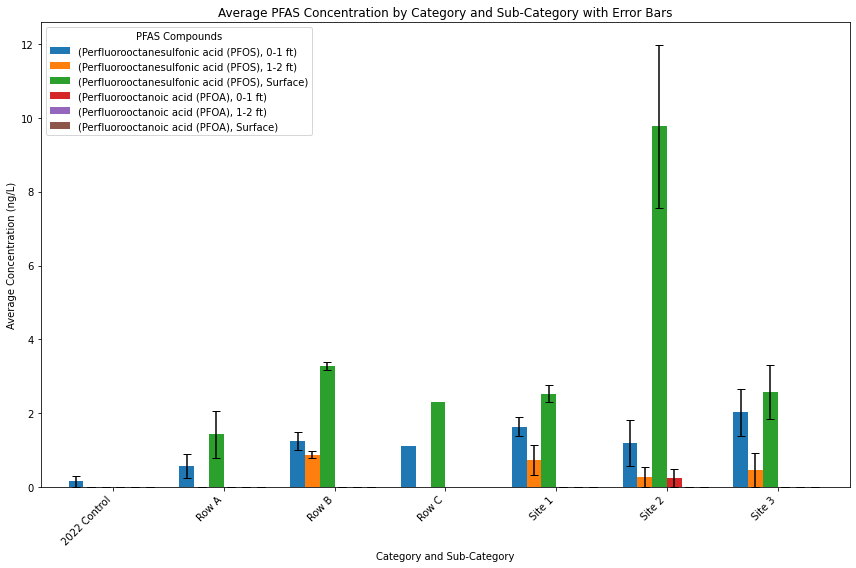

In [72]:
create_grouped_bar_chart_with_error(summary_df, pfas_compounds=pfas_compound_filter)

### 24 Create Stacked Bar Chart for PFAS Concentrations for Thomas Dairy Groundwater

#### 24.1 Functions

In [10]:
def create_pivot_tables(data_df, qual_summary_filter, start_date, end_date, sample_location_filter, pfas_compound_filter):
    """
    Create three pivot tables for the average, standard deviation, and count of 'Quant Only Incl Qual Flags',
    filtered by specified criteria.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
        start_date (str): Start date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
        end_date (str): End date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
        sample_location_filter (list): Filter values for 'Sample Location'.
        pfas_compound_filter (list): Filter values for 'PFAS Compound'.

    Returns:
        tuple: A tuple containing three pd.DataFrames (average, standard deviation, count pivot tables).
    """
    # Convert 'Sample Date' to datetime and apply filters
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])
    filtered_data = data_df[
        (data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter)) &
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
        (data_df['Sample Date'] <= pd.to_datetime(end_date)) &
        (data_df['Sample Location'].isin(sample_location_filter)) &
        (data_df['PFAS Compound'].isin(pfas_compound_filter))
    ]
    
    # Create pivot tables
    avg_pivot = pd.pivot_table(filtered_data, values='Quant Only Incl Qual Flags', index='Sample Location', columns='PFAS Compound', aggfunc='mean')
    std_pivot = pd.pivot_table(filtered_data, values='Quant Only Incl Qual Flags', index='Sample Location', columns='PFAS Compound', aggfunc='std')
    count_pivot = pd.pivot_table(filtered_data, values='Quant Only Incl Qual Flags', index='Sample Location', columns='PFAS Compound', aggfunc='count')
    
    return avg_pivot, std_pivot, count_pivot

In [11]:
def create_summary_dataframe(avg_pivot, std_pivot, count_pivot, category_mapping):
    """
    Create a summary dataframe with averages, standard errors, and categories.

    Args:
        avg_pivot (pd.DataFrame): Pivot table with average values.
        std_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.
        category_mapping (pd.DataFrame): Dataframe with 'Sample Location', 'Category' and 'Sub-Category' mappings.

    Returns:
        pd.DataFrame: Dataframe with averages, standard errors, 'Category', and 'Sub-Category'.
    """
    # Create the standard error DataFrame
    standard_error = std_pivot / np.sqrt(count_pivot)
    
    # Concatenate the average, standard deviation, and standard error DataFrames
    summary_df = pd.concat([avg_pivot, std_pivot, standard_error], axis=1, keys=['Average', 'StdDev', 'StdError'])
    
    # Reset the index to turn it into a column for merging
    summary_df.reset_index(inplace=True)
    
    # Merge the summary with the category mapping
    summary_with_categories = pd.merge(summary_df, category_mapping, left_on='Sample Location', right_on='Sample Location', how='left')
    
    # Set the index back to 'Sample Location'
    summary_with_categories.set_index('Sample Location', inplace=True)
    
    return summary_with_categories


In [12]:
# Define the data for category mapping
category_data = {
    'Sample Location': [
        'Thomas Dairy Control Site Well', 'Thomas Dairy Control Site Soil - 0', 
        'Thomas Dairy Control Site Soil - 1', 'Thomas Dairy Control Site Soil - 2', 
        'Thomas Dairy Site 1 Well', 'Thomas Dairy Site 1 Soil - 0', 
        'Thomas Dairy Site 1 Soil - 1', 'Thomas Dairy Site 1 Soil - 2', 
        'Thomas Dairy Site 2 Well', 'Thomas Dairy Site 2 Soil - 0', 
        'Thomas Dairy Site 2 Soil - 1', 'Thomas Dairy Site 2 Soil - 2', 
        'Thomas Dairy Site 3 Well', 'Thomas Dairy Site 3 Soil - 0', 
        'Thomas Dairy Site 3 Soil - 1', 'Thomas Dairy Site 3 Soil - 2'
    ],
    'Category': [
        'Control', 'Control', 'Control', 'Control', 
        'Site 1', 'Site 1', 'Site 1', 'Site 1', 
        'Site 2', 'Site 2', 'Site 2', 'Site 2', 
        'Site 3', 'Site 3', 'Site 3', 'Site 3'
    ],
    'Sub-Category': [
        'Groundwater', 'Soil Surface', '0-1 ft', '1-2 ft',
        'Groundwater', 'Soil Surface', '0-1 ft', '1-2 ft',
        'Groundwater', 'Soil Surface', '0-1 ft', '1-2 ft',
        'Groundwater', 'Soil Surface', '0-1 ft', '1-2 ft'
    ]
}

# Create the DataFrame
category_mapping = pd.DataFrame(category_data)

# Display the DataFrame
print(category_mapping)


                       Sample Location Category  Sub-Category
0       Thomas Dairy Control Site Well  Control   Groundwater
1   Thomas Dairy Control Site Soil - 0  Control  Soil Surface
2   Thomas Dairy Control Site Soil - 1  Control        0-1 ft
3   Thomas Dairy Control Site Soil - 2  Control        1-2 ft
4             Thomas Dairy Site 1 Well   Site 1   Groundwater
5         Thomas Dairy Site 1 Soil - 0   Site 1  Soil Surface
6         Thomas Dairy Site 1 Soil - 1   Site 1        0-1 ft
7         Thomas Dairy Site 1 Soil - 2   Site 1        1-2 ft
8             Thomas Dairy Site 2 Well   Site 2   Groundwater
9         Thomas Dairy Site 2 Soil - 0   Site 2  Soil Surface
10        Thomas Dairy Site 2 Soil - 1   Site 2        0-1 ft
11        Thomas Dairy Site 2 Soil - 2   Site 2        1-2 ft
12            Thomas Dairy Site 3 Well   Site 3   Groundwater
13        Thomas Dairy Site 3 Soil - 0   Site 3  Soil Surface
14        Thomas Dairy Site 3 Soil - 1   Site 3        0-1 ft
15      

In [36]:
def create_stacked_bar_chart_with_errors(summary_df, figsize=(15, 10), title='Stacked PFAS Concentrations by Category and Sub-Category'):
    """
    Create a stacked bar chart for PFAS compounds concentrations with error bars.

    Args:
        summary_df (pd.DataFrame): The summary dataframe.
        figsize (tuple): Figure size for the plot.
        title (str): Title of the plot.
    """
    # Extract the average and standard error columns assuming multi-level column names
    avg_columns = [col for col in summary_df.columns if 'Average' in col[0]]
    error_columns = [(col[0].replace('Average', 'StdError'), col[1]) for col in avg_columns]
    
    # Get the 'tab20' colormap
    cmap = plt.get_cmap('tab20')
    colors = cmap(np.linspace(0, 1, len(avg_columns)))
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Initialize a base for the error bars
    cumulative_values = np.zeros(summary_df.shape[0])
    
    for (avg_col, error_col), color in zip(zip(avg_columns, error_columns), colors):
        # Plot the stacked bars
        ax.bar(summary_df.index, summary_df[avg_col], bottom=cumulative_values, label=avg_col[1], color=color)
        
        # Add error bars
        error_values = summary_df[error_col]
        # Calculate the top of the stack for the current segment
        segment_top = cumulative_values + summary_df[avg_col].fillna(0)
        # Place error bars at the top of each stack segment
        ax.errorbar(summary_df.index, segment_top, yerr=error_values, fmt='none', ecolor='black', capsize=4)
        
        # Update the base for the next stack
        cumulative_values += summary_df[avg_col].fillna(0)

    # Customize the plot
    ax.set_title(title)
    ax.set_ylabel('Concentration')
    ax.set_xlabel('Sample Location')
    ax.legend(title='PFAS Compounds', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()





#### 24.2 Filters and Settings

In [13]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
qual_summary_filter = ['Good','Probably Ok','']

#start_date (str): Start date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
start_date='2019-08-15'

#end_date (str): End date for filtering 'Sample Date', in 'YYYY-MM-DD' format.
end_date='2023-10-06'

#sample_location_filter (list): Filter values for 'Sample Location'.
sample_location_filter = ['Thomas Dairy Control Site Soil - 0', 'Thomas Dairy Control Site Soil - 1','Thomas Dairy Control Site Soil - 2','Thomas Dairy Control Site Well',
                          'Thomas Dairy Site 1 Soil - 0', 'Thomas Dairy Site 1 Soil - 1','Thomas Dairy Site 1 Soil - 2','Thomas Dairy Site 1 Well','Thomas Dairy Site 2 Soil - 0',
                          'Thomas Dairy Site 2 Soil - 1','Thomas Dairy Site 2 Soil - 2','Thomas Dairy Site 2 Well','Thomas Dairy Site 3 Soil - 0','Thomas Dairy Site 3 Soil - 1',
                          'Thomas Dairy Site 3 Soil - 2','Thomas Dairy Site 3 Well']


#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter=['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid',	'Perfluoroheptanesulfonic acid','Perfluoroheptanoic acid',
                      'Perfluorohexanesulfonic acid','Perfluorohexanoic acid','Perfluorononanoic acid',	'Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)',
                      'Perfluorooctanoic acid (PFOA)',	'Perfluoropentanesulfonic acid','Perfluoropentanoic acid']


#### 24.3 Create Pivot Table for Average Concentrations for PFAS Compounds at Sample Locations

In [14]:
avg_pivot, std_pivot, count_pivot=create_pivot_tables(data_df, qual_summary_filter, start_date, end_date, sample_location_filter, pfas_compound_filter)

In [15]:
avg_pivot.head()

PFAS Compound,Perfluorobutanesulfonic acid,Perfluorobutanoic acid,Perfluorodecanoic acid,Perfluoroheptanesulfonic acid,Perfluoroheptanoic acid,Perfluorohexanesulfonic acid,Perfluorohexanoic acid,Perfluorononanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid
Sample Location,,,,,,,,,,,,,
Thomas Dairy Control Site Soil - 0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,2.266667,0.236667,0.0,0.000000
Thomas Dairy Control Site Soil - 1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.866667,0.000000,0.0,0.566667
Thomas Dairy Control Site Soil - 2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.316667,0.0,0.0,2.096667,0.000000,0.0,0.666667
Thomas Dairy Control Site Well,5.766667,4.866667,0.0,0.0,1.233333,9.933333,5.133333,0.0,0.0,0.000000,5.266667,0.0,4.333333
Thomas Dairy Site 1 Soil - 0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,2.533333,0.000000,0.0,0.000000


In [16]:
std_pivot.head()

PFAS Compound,Perfluorobutanesulfonic acid,Perfluorobutanoic acid,Perfluorodecanoic acid,Perfluoroheptanesulfonic acid,Perfluoroheptanoic acid,Perfluorohexanesulfonic acid,Perfluorohexanoic acid,Perfluorononanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid
Sample Location,,,,,,,,,,,,,
Thomas Dairy Control Site Soil - 0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.513160,0.409919,0.0,0.000000
Thomas Dairy Control Site Soil - 1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.069268,0.000000,0.0,0.981495
Thomas Dairy Control Site Soil - 2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.548483,0.0,0.0,2.010978,0.000000,0.0,1.154701
Thomas Dairy Control Site Well,3.106981,4.225321,0.0,0.0,1.069268,1.847521,4.579665,0.0,0.0,0.000000,4.561067,0.0,3.764749
Thomas Dairy Site 1 Soil - 0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.416333,0.000000,0.0,0.000000


In [17]:
count_pivot.head()

PFAS Compound,Perfluorobutanesulfonic acid,Perfluorobutanoic acid,Perfluorodecanoic acid,Perfluoroheptanesulfonic acid,Perfluoroheptanoic acid,Perfluorohexanesulfonic acid,Perfluorohexanoic acid,Perfluorononanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid
Sample Location,,,,,,,,,,,,,
Thomas Dairy Control Site Soil - 0,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Control Site Soil - 1,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Control Site Soil - 2,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Control Site Well,3,3,3,3,3,3,3,3,3,3,3,3,3
Thomas Dairy Site 1 Soil - 0,3,3,3,3,3,3,3,3,3,3,3,3,3


#### 24.4 Create Summary Dataframe

In [18]:
summary_df=create_summary_dataframe(avg_pivot, std_pivot, count_pivot, category_mapping)
summary_df['Category-SubCategory']=summary_df['Category']+', '+summary_df['Sub-Category']
summary_df

<ipython-input-11-f0d42e60927d>:24: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  summary_with_categories = pd.merge(summary_df, category_mapping, left_on='Sample Location', right_on='Sample Location', how='left')


,"(Sample Location, )","(Average, Perfluorobutanesulfonic acid)","(Average, Perfluorobutanoic acid)","(Average, Perfluorodecanoic acid)","(Average, Perfluoroheptanesulfonic acid)","(Average, Perfluoroheptanoic acid)","(Average, Perfluorohexanesulfonic acid)","(Average, Perfluorohexanoic acid)","(Average, Perfluorononanoic acid)","(Average, Perfluorooctanesulfonamide)",...,"(StdError, Perfluorohexanoic acid)","(StdError, Perfluorononanoic acid)","(StdError, Perfluorooctanesulfonamide)","(StdError, Perfluorooctanesulfonic acid (PFOS))","(StdError, Perfluorooctanoic acid (PFOA))","(StdError, Perfluoropentanesulfonic acid)","(StdError, Perfluoropentanoic acid)",Category,Sub-Category,Category-SubCategory
Sample Location,,,,,,,,,,,,,,,,,,,,,
Thomas Dairy Control Site Soil - 0,Thomas Dairy Control Site Soil - 0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.296273,0.236667,0.0,0.000000,Control,Soil Surface,"Control, Soil Surface"
Thomas Dairy Control Site Soil - 1,Thomas Dairy Control Site Soil - 1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.617342,0.000000,0.0,0.566667,Control,0-1 ft,"Control, 0-1 ft"
Thomas Dairy Control Site Soil - 2,Thomas Dairy Control Site Soil - 2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.316667,0.0,0.0,...,0.316667,0.0,0.0,1.161039,0.000000,0.0,0.666667,Control,1-2 ft,"Control, 1-2 ft"
Thomas Dairy Control Site Well,Thomas Dairy Control Site Well,5.766667,4.866667,0.0,0.0,1.233333,9.933333,5.133333,0.0,0.0,...,2.644071,0.0,0.0,0.000000,2.633333,0.0,2.173579,Control,Groundwater,"Control, Groundwater"
Thomas Dairy Site 1 Soil - 0,Thomas Dairy Site 1 Soil - 0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.240370,0.000000,0.0,0.000000,Site 1,Soil Surface,"Site 1, Soil Surface"
Thomas Dairy Site 1 Soil - 1,Thomas Dairy Site 1 Soil - 1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.260342,0.000000,0.0,0.000000,Site 1,0-1 ft,"Site 1, 0-1 ft"
Thomas Dairy Site 1 Soil - 2,Thomas Dairy Site 1 Soil - 2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.405805,0.000000,0.0,0.000000,Site 1,1-2 ft,"Site 1, 1-2 ft"
Thomas Dairy Site 1 Well,Thomas Dairy Site 1 Well,3.550000,4.700000,0.0,0.0,0.000000,5.233333,1.400000,0.0,0.0,...,0.702377,0.0,0.0,0.000000,0.731057,0.0,0.656591,Site 1,Groundwater,"Site 1, Groundwater"
Thomas Dairy Site 2 Soil - 0,Thomas Dairy Site 2 Soil - 0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,2.218358,0.000000,0.0,0.000000,Site 2,Soil Surface,"Site 2, Soil Surface"


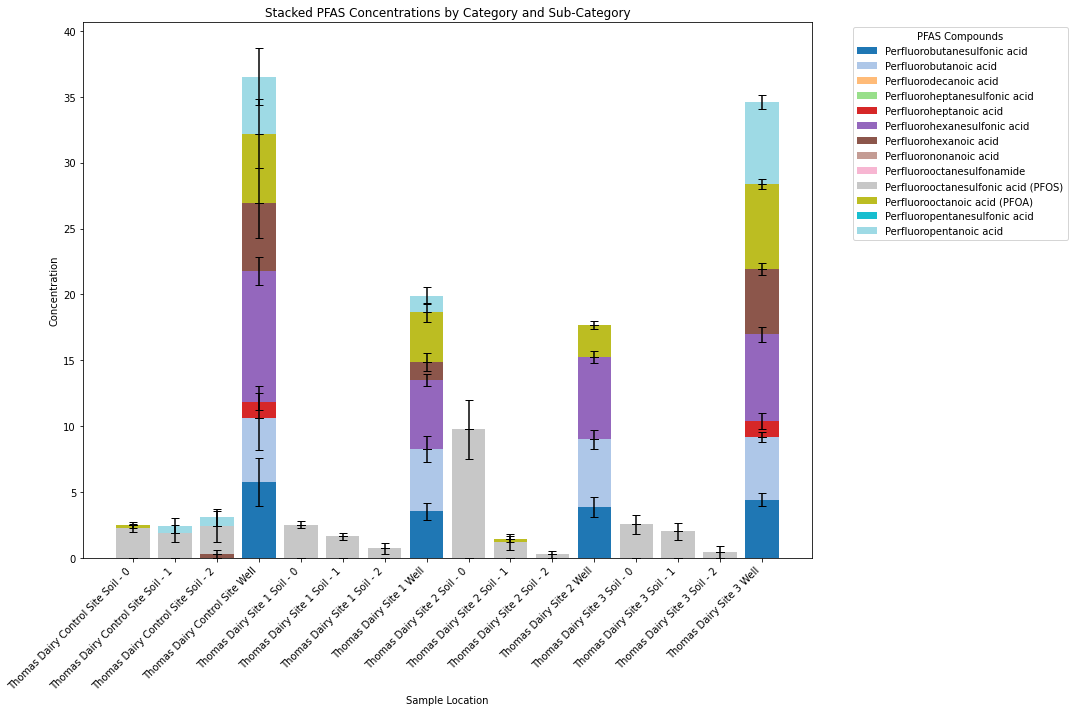

In [37]:
create_stacked_bar_chart_with_errors(summary_df, figsize=(15, 10), title='Stacked PFAS Concentrations by Category and Sub-Category')

### 25) Thomas Dairy Timeseries Shown in a Bar Chart

#### 25.1) Functions

In [50]:
def create_pivot_table(data_df, qual_summary_filter=None, field_filter=None, type_filter=None, sample_location_filter=None,
                       start_date=None, end_date=None, pfas_compound_filter=None, column_name='Quant Incl Estimates Incl Qual Flags'):
    """
    Create a pivot table from a dataframe with optional filtering and averaging specified values.

    Args:
    data_df (pd.DataFrame): Input dataframe.
    qual_summary_filter (list, optional): Quality summary filter values.
    field_filter (list, optional): Field filter values.
    type_filter (list, optional): Type filter values.
    sample_location_filter (list, optional): Sample location filter values.
    start_date (str, optional): Start date for filtering 'Sample Date' in format 'yyyy-mm-dd'.
    end_date (str, optional): End date for filtering 'Sample Date' in format 'yyyy-mm-dd'.
    pfas_compound_filter (list, optional): PFAS compound filter values.
    column_name (str): Column name to average for pivot table values.

    Returns:
    pd.DataFrame: Pivot table based on filters and averaging specified column.
    """
    # Convert 'Sample Date' to datetime format if not already done
    if 'Sample Date' in data_df.columns:
        data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])
    
    # Apply filters based on provided lists
    filtered_data = data_df
    if qual_summary_filter is not None:
        filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(qual_summary_filter)]
    if field_filter is not None:
        filtered_data = filtered_data[filtered_data['Field'].isin(field_filter)]
    if type_filter is not None:
        filtered_data = filtered_data[filtered_data['Type'].isin(type_filter)]
    if sample_location_filter is not None:
        filtered_data = filtered_data[filtered_data['Sample Location'].isin(sample_location_filter)]
    if pfas_compound_filter is not None:
        filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(pfas_compound_filter)]
    if start_date and end_date:  # Apply date range filter if both start and end dates are provided
        filtered_data = filtered_data[
            (filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)
        ]

    # Create the pivot table
    pivot_table = pd.pivot_table(
        filtered_data,
        values=column_name,
        index=['PFAS Compound'],
        columns=['Sample Location', 'Sample Date'],
        aggfunc='mean'
    )
    
    return pivot_table



In [70]:
def create_stacked_bar_chart(transposed_pivot_table):
    """
    Create a stacked bar chart from a pivot table with PFAS concentrations.

    Args:
        transposed_pivot_table (pd.DataFrame): The transposed pivot table with 'Sample Location' and 'Sample Date' as a multi-index on rows.
    """
    # Check if the transposed pivot table has the correct MultiIndex
    if not isinstance(transposed_pivot_table.index, pd.MultiIndex):
        raise ValueError("The DataFrame index must be a MultiIndex with 'Sample Location' and 'Sample Date' levels.")

    # Plot
    ax = transposed_pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), legend='reverse')
    
    # Customize the plot
    ax.set_ylabel('PFAS Concentration (ng/L)')
    ax.set_xlabel('Sample Location and Date')
    ax.set_title('PFAS Concentration by Sample Location and Date')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Display the legend
    plt.legend(title='PFAS Compounds', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()




#### 25.2) Filters and Settings

In [51]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
qual_summary_filter = ['Good','Probably Ok','']

#field_filter (list): Filter values for 'Field'.
field_filter=None

#type_filter (list): Filter values for 'Type'.
type_filter=['Groundwater']

#sample_location_filter (list): Filter values for 'Sample Location'.
sample_location_filter= ['Thomas Dairy Control Site Well', 'Thomas Dairy Site 1 Well', 'Thomas Dairy Site 2 Well', 'Thomas Dairy Site 3 Well']

#start_date (str): Start date for filtering 'Sample Date'.
start_date = '2019-01-01'
#end_date (str): End date for filtering 'Sample Date'.
end_date = '2024-01-01'

#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter=['HFPO-DA','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid','Perfluoroheptanesulfonic acid',
                      'Perfluoroheptanoic acid','Perfluorohexanesulfonic acid','Perfluorohexanoic acid','Perfluorononanoic acid',
                      'Perfluorooctanesulfonamide', 'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)',
                      'Perfluoropentanesulfonic acid','Perfluoropentanoic acid']

#column_name (str): The column name to average values for.
column_name= 'Quant Incl Estimates Incl Qual Flags'

#### 25.3) Create Pivot Table for PFAS Concentrations at Sample Locations by Sample Date

In [67]:
pivot_table=create_pivot_table(data_df, qual_summary_filter, field_filter, type_filter, sample_location_filter,
                                       start_date, end_date, pfas_compound_filter, column_name)
pivot_table.index=pivot_table.index.map(pfas_mapping)
pivot_table

Sample Location Thomas Dairy Control Site Well                        \
Sample Date                         2023-07-14 2023-09-08 2023-10-06   
PFAS Compound                                                          
HFPO-DA                                   0.00       0.00       0.00   
PFBS                                      2.30       8.30       6.70   
PFBA                                      1.30       7.60       7.00   
PFDA                                      0.00       0.00       0.00   
PFHpS                                     0.00       0.00       0.25   
PFHpA                                     0.26       1.90       1.80   
PFHxS                                     7.80      11.00      11.00   
PFHxA                                     0.00       8.80       6.60   
PFNA                                      0.00       0.37       0.28   
FOSA                                      0.00       0.29       0.00   
PFOS                                      3.10       5.50       4.80   
PFOA                                      1.00       7.90       7.90   
PFPeS                                     1.00       0.88       1.00   
PFPeA                                     0.89       6.20       6.80   

Sample Location Thomas Dairy Site 1 Well                        \
Sample Date                   2023-07-14 2023-09-08 2023-10-06   
PFAS Compound                                                    
HFPO-DA                             0.67       0.00       0.00   
PFBS                                2.90       4.20        NaN   
PFBA                                6.70       3.70       3.70   
PFDA                                0.40       0.00       0.00   
PFHpS                               0.00       0.00       0.00   
PFHpA                               0.81       0.76       0.51   
PFHxS                               4.50       6.10       5.10   
PFHxA                               2.20       2.00       1.10   
PFNA                                0.44       0.22       0.19   
FOSA                                0.29       0.00       0.32   
PFOS                                8.00       4.90       4.80   
PFOA                                5.20       3.30       2.80   
PFPeS                               0.60       0.64       0.56   
PFPeA                               1.60       2.20       1.60   

Sample Location Thomas Dairy Site 2 Well                        \
Sample Date                   2023-07-14 2023-09-08 2023-10-06   
PFAS Compound                                                    
HFPO-DA                             0.00       0.00       0.00   
PFBS                                2.50       5.20       3.90   
PFBA                                3.70       5.70       6.00   
PFDA                                0.00       0.00       0.00   
PFHpS                               0.00       0.00       0.00   
PFHpA                               0.00       0.00       0.00   
PFHxS                               5.40       6.40       7.00   
PFHxA                               0.00       1.30       0.00   
PFNA                                0.00       0.23       0.21   
FOSA                                0.36       0.00       0.00   
PFOS                                6.10       4.30       4.40   
PFOA                                2.00       2.20       3.00   
PFPeS                               0.56       0.80       0.84   
PFPeA                               0.28       0.49       0.51   

Sample Location Thomas Dairy Site 3 Well                        
Sample Date                   2023-07-14 2023-09-08 2023-10-06  
PFAS Compound                                                   
HFPO-DA                             0.00       0.00       0.00  
PFBS                                3.50       4.60       5.20  
PFBA                                4.20       4.60       5.50  
PFDA                                0.00       0.00       0.00  
PFHpS                               0.00       0.00       0.00  
PFHpA    

In [68]:
# 'name_mapping' is a dictionary with old names as keys and new names as values. This will be used for renaming the columns.
name_mapping = {
    'Thomas Dairy Control Site Well': 'Control',
    'Thomas Dairy Site 1 Well': 'Site 1',
    'Thomas Dairy Site 2 Well': 'Site 2',
    'Thomas Dairy Site 3 Well': 'Site 3'
}

# Rename the first level of the columns
pivot_table.columns = pivot_table.columns.set_levels(
    pivot_table.columns.levels[0].map(name_mapping.get), level=0
)
pivot_table

Sample Location    Control                           Site 1             \
Sample Date     2023-07-14 2023-09-08 2023-10-06 2023-07-14 2023-09-08   
PFAS Compound                                                            
HFPO-DA               0.00       0.00       0.00       0.67       0.00   
PFBS                  2.30       8.30       6.70       2.90       4.20   
PFBA                  1.30       7.60       7.00       6.70       3.70   
PFDA                  0.00       0.00       0.00       0.40       0.00   
PFHpS                 0.00       0.00       0.25       0.00       0.00   
PFHpA                 0.26       1.90       1.80       0.81       0.76   
PFHxS                 7.80      11.00      11.00       4.50       6.10   
PFHxA                 0.00       8.80       6.60       2.20       2.00   
PFNA                  0.00       0.37       0.28       0.44       0.22   
FOSA                  0.00       0.29       0.00       0.29       0.00   
PFOS                  3.10       5.50       4.80       8.00       4.90   
PFOA                  1.00       7.90       7.90       5.20       3.30   
PFPeS                 1.00       0.88       1.00       0.60       0.64   
PFPeA                 0.89       6.20       6.80       1.60       2.20   

Sample Location                Site 2                           Site 3  \
Sample Date     2023-10-06 2023-07-14 2023-09-08 2023-10-06 2023-07-14   
PFAS Compound                                                            
HFPO-DA               0.00       0.00       0.00       0.00       0.00   
PFBS                   NaN       2.50       5.20       3.90       3.50   
PFBA                  3.70       3.70       5.70       6.00       4.20   
PFDA                  0.00       0.00       0.00       0.00       0.00   
PFHpS                 0.00       0.00       0.00       0.00       0.00   
PFHpA                 0.51       0.00       0.00       0.00       1.30   
PFHxS                 5.10       5.40       6.40       7.00       5.60   
PFHxA                 1.10       0.00       1.30       0.00       4.30   
PFNA                  0.19       0.00       0.23       0.21       0.00   
FOSA                  0.32       0.36       0.00       0.00        NaN   
PFOS                  4.80       6.10       4.30       4.40       4.40   
PFOA                  2.80       2.00       2.20       3.00       6.10   
PFPeS                 0.56       0.56       0.80       0.84       0.56   
PFPeA                 1.60       0.28       0.49       0.51       5.20   

Sample Location                        
Sample Date     2023-09-08 2023-10-06  
PFAS Compound                          
HFPO-DA               0.00       0.00  
PFBS                  4.60       5.20  
PFBA                  4.60       5.50  
PFDA                  0.00       0.00  
PFHpS                 0.00       0.00  
PFHpA                 1.80       1.80  
PFHxS                 6.50       7.60  
PFHxA                 4.70       5.90  
PFNA                  0.20       0.23  
FOSA                  0.00       0.00  
PFOS                  2.80       3.00  
PFOA                  6.00       7.20  
PFPeS                 0.77       0.83  
PFPeA                 6.60       6.90

#### 25.4) Create Stacked Bar Chart for PFAS Compound Concentrations at Thomas Dairy Sites by Sample Date

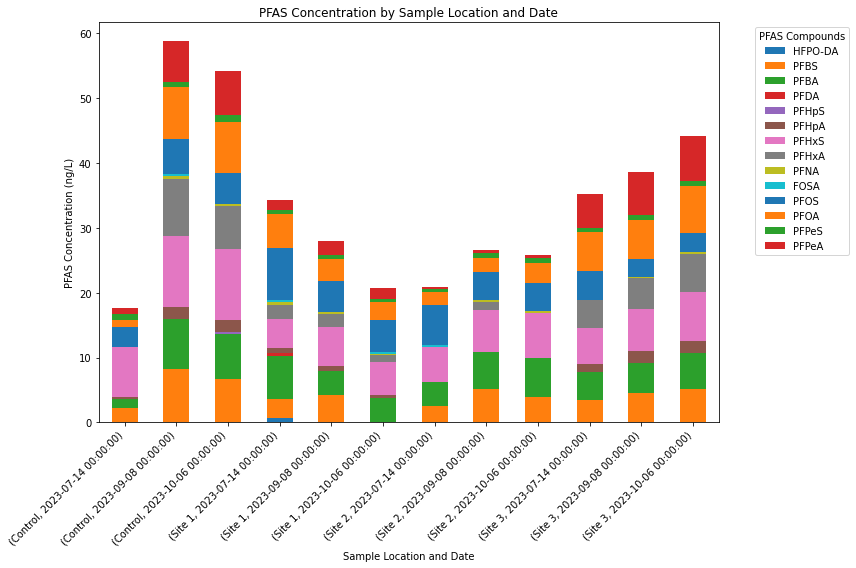

In [72]:
transposed_pivot_table = pivot_table.T
create_stacked_bar_chart(transposed_pivot_table)


In [74]:
data_df['Type'].unique()

array(['Outfall of Industry', 'Blank', 'Biosolids', 'Effluent',
       'Influent', 'Manhole', 'Soils', 'Porewater', 'Ambient',
       'Groundwater'], dtype=object)